# PROJET MACHINE LEARNING : Global Data on Sustainable Energy


*Auteurs : Natael Régnier, Tom Brusseaux, Damien Gomez, Thibault Lauilhe *

## 1. Introduction

Les données sont issues du site du concours KAGGLE; il s'agit du jeu de données "Global Data on Sustainable Energy" (2000-2020) disponible [ici](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy).

Le jeu de données comprend 3649 observations et 21 variables qui représentent diverses caractéristiques liées à la consommation énergétique et à la géographie de 176 pays du monde au cours des années 2000 à 2020. Les variables sont les suivantes:

- **Entity**: Nom du pays ou de la région pour lequel les données sont rapportées.
- **Year**: Année pour laquelle les données sont communiquées entre 2000 et 2020.
- **Access to electricity (% of population)**: Pourcentage de la population ayant accès à l’électricité.
- **Access to clean fuels for cooking (% of population)**: Pourcentage de la population qui utilise principalement des combustibles propres.
- **Renewable-electricity-generating-capacity-per-capita**: Capacité installée d’énergie renouvelable par personne.
- **Financial flows to developing countries (US Dollars)**: Aide et assistance des pays développés pour les projets d’énergie propre.
- **Renewable energy share in total final energy consumption (%)**: Pourcentage d’énergie renouvelable dans la consommation d’énergie finale.
- **Electricity from fossil fuels (TWh)**: Électricité produite à partir de combustibles fossiles (charbon, pétrole, gaz) en térawattheures.
- **Electricity from nuclear (TWh)**: Électricité produite à partir de l’énergie nucléaire en térawattheures.
- **Electricity from renewables (TWh)**: Électricité produite à partir de sources renouvelables (hydroélectricité, énergie solaire, énergie éolienne, etc.) en térawattheures.
- **Low-carbon electricity (% electricity)**: Pourcentage d’électricité provenant de sources à faible teneur en carbone (nucléaire et énergies renouvelables).
- **Primary energy consumption per capita (kWh/person)**: Consommation d’énergie par personne en kilowattheures.
- **Energy intensity level of primary energy (MJ/2011 PPP GDP)**: Consommation d’énergie par unité de PIB à parité de pouvoir d’achat.
- **Value-co2-emissions (metric tons per capita)**: Émissions de dioxyde de carbone par personne en tonnes métriques.
- **Renewables (% equivalent primary energy)**: Équivalent énergie primaire provenant de sources renouvelables.
- **GDP growth (annual %)**: Taux de croissance annuel du PIB en monnaie locale constante.
- **GDP per capita**: Produit intérieur brut (PIB) par personne.
- **Density (P/Km2)**: Densité de population en personnes par kilomètre carré.
- **Land Area (Km2)**: Surface terrestre totale en kilomètres carrés.
- **Latitude**: Latitude du centroïde du pays en degrés décimaux.
- **Longitude**: Longitude du centroïde du pays en degrés décimaux.

L’objectif est de prédire la variable `Value-co2-emissions` à partir des autres variables. 

On importe les librairies nécessaires pour ce projet : 

In [1]:
library(knitr)
library(reticulate)
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)

library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)

library(caret)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : 'gridExtra'


L'objet suivant est masqué depuis 'package:dplyr':

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : 'plotly'


L'objet suivant est masqué depuis 'package:ggplot2':

    last_plot


L'objet suivant est masqué depuis 'package:stats':

    filter


L'objet suivant est masqué depuis 'package:graphics':

    l

## 2. Prise en charge des données

In [2]:
path <- ""
data <- read.table(paste(path, "global-data-on-sustainable-energy.csv", sep = ""),
                    sep = ",", header = TRUE)

In [3]:
head(data)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


In [4]:
str(data)

'data.frame':	3649 obs. of  21 variables:
 $ Entity                                                          : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ Year                                                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 ...
 $ Access.to.electricity....of.population.                         : num  1.61 4.07 9.41 14.74 20.06 ...
 $ Access.to.clean.fuels.for.cooking                               : num  6.2 7.2 8.2 9.5 10.9 ...
 $ Renewable.electricity.generating.capacity.per.capita            : num  9.22 8.86 8.47 8.09 7.75 7.51 7.4 7.25 7.49 7.5 ...
 $ Financial.flows.to.developing.countries..US...                  : num  20000 130000 3950000 25970000 NA ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  45 45.6 37.8 36.7 44.2 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.16 0.09 0.13 0.31 0.33 0.34 0.2 0.2 0.19 0.16 ...
 $ Electricity.from.nuclear.


On convertit la variable Year en variable qualitative et on convertit Density.n.P.Km2. en variable numérique : 

In [5]:
data$Year <- as.factor(data$Year)
data$Entity = as.factor(data$Entity)

data$Density.n.P.Km2. <- as.numeric(gsub(",", ".", data$`Density.n.P.Km2.`))


On va calculer le taux de valeurs manquantes pour chaque variable : 

In [6]:
# Calculer le taux de valeurs manquantes pour chaque variable
missing_rates <- colMeans(is.na(data))

# Afficher les taux de valeurs manquantes
print(missing_rates)

                                                          Entity 
                                                    0.0000000000 
                                                            Year 
                                                    0.0000000000 
                         Access.to.electricity....of.population. 
                                                    0.0027404768 
                               Access.to.clean.fuels.for.cooking 
                                                    0.0463140586 
            Renewable.electricity.generating.capacity.per.capita 
                                                    0.2551383941 
                  Financial.flows.to.developing.countries..US... 
                                                    0.5724856125 
Renewable.energy.share.in.the.total.final.energy.consumption.... 
                                                    0.0531652508 
                             Electricity.from.fossil.fuels..TWh. 
          

On remarque que les variables Renewable-electricity-generating-capacity-per-capita, Financial flows to developing countries (US Dollars) 
et Renewables (% equivalent primary energy) ont un taux de données manquantes très important. Nous allons donc les retirer de notre jeu de données.

In [7]:
print(dim(data))

# Supprimer les variables avec un taux de données manquantes très important
                        #"Renewable-electricity-generating-capacity-per-capita",
                         #"Financial flows to developing countries (US Dollars)",
                         #"Renewables (% equivalent primary energy)")

# Supprimer les variables avec un taux de données manquantes très important
data <- data[, c("Entity", "Year", "Access.to.electricity....of.population.",
                 "Access.to.clean.fuels.for.cooking",
                 "Renewable.energy.share.in.the.total.final.energy.consumption....",
                 "Electricity.from.fossil.fuels..TWh.",
                 "Electricity.from.nuclear..TWh.",
                 "Electricity.from.renewables..TWh.",
                 "Low.carbon.electricity....electricity.",
                 "Primary.energy.consumption.per.capita..kWh.person.",
                 "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.",
                 "Value_co2_emissions_kt_by_country",
                 "gdp_growth",
                 "gdp_per_capita",
                 "Density.n.P.Km2.",
                 "Land.Area.Km2.",
                 "Latitude",
                 "Longitude")]

# Afficher les dimensions du jeu de données après suppression des variables
print(dim(data))


[1] 3649   21
[1] 3649   18


Maintenant, nous allons uniquement garder les individus complets pour la suite du projet.

In [8]:
# Créer un nouveau jeu de données avec seulement les individus complets
data1 = data
data <- data[complete.cases(data), ]

# Afficher les dimensions du nouveau jeu de données
print(dim(data))


[1] 2868   18


## 3. Analyse Descriptive Unidimensionnelle des Données

In [9]:
summary(data)

                 Entity          Year     
 Algeria            :  20   2014   : 147  
 Angola             :  20   2015   : 147  
 Antigua and Barbuda:  20   2016   : 146  
 Argentina          :  20   2017   : 146  
 Armenia            :  20   2018   : 146  
 Australia          :  20   2019   : 146  
 (Other)            :2748   (Other):1990  
 Access.to.electricity....of.population. Access.to.clean.fuels.for.cooking
 Min.   :  1.252                         Min.   :  0.00                   
 1st Qu.: 53.238                         1st Qu.: 22.07                   
 Median : 97.000                         Median : 81.55                   
 Mean   : 76.585                         Mean   : 62.17                   
 3rd Qu.:100.000                         3rd Qu.:100.00                   
 Max.   :100.000                         Max.   :100.00                   
                                                                          
 Renewable.energy.share.in.the.total.final.energy.consum

### 3.1 Transformation de Variables quantitatives

On représente la fréquence de chaque variable, afin de déterminer de possibles transformation de certaines variables quantitatives.

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."


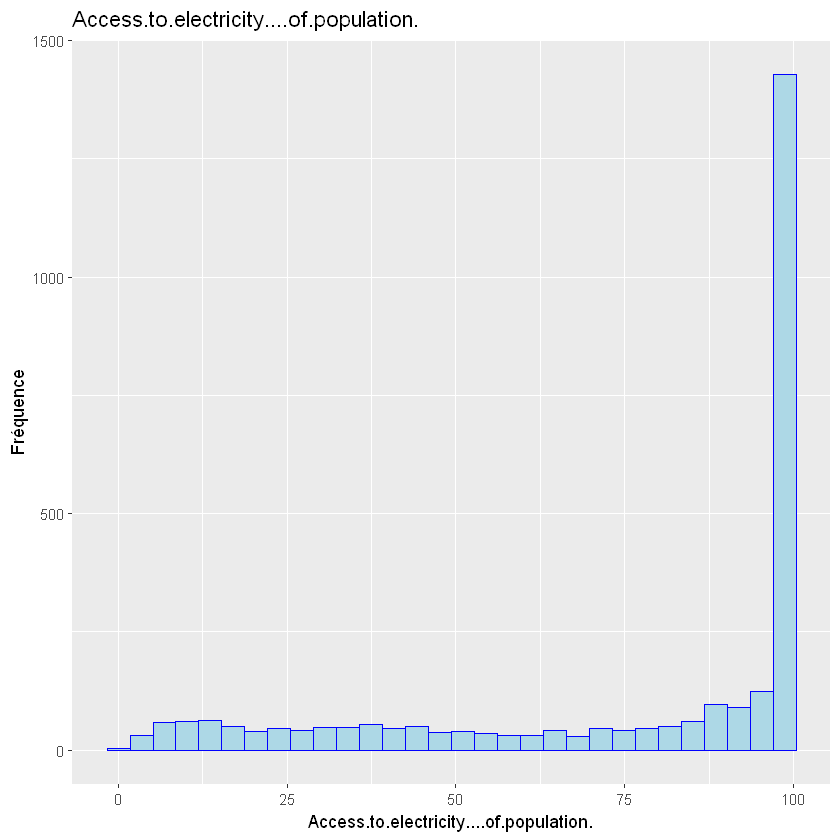

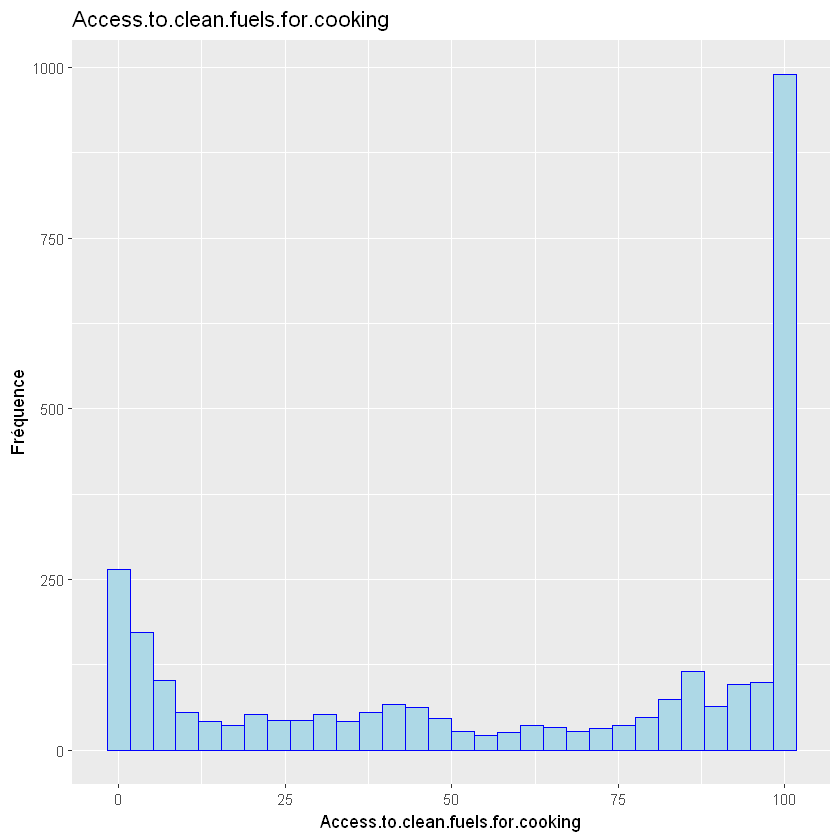

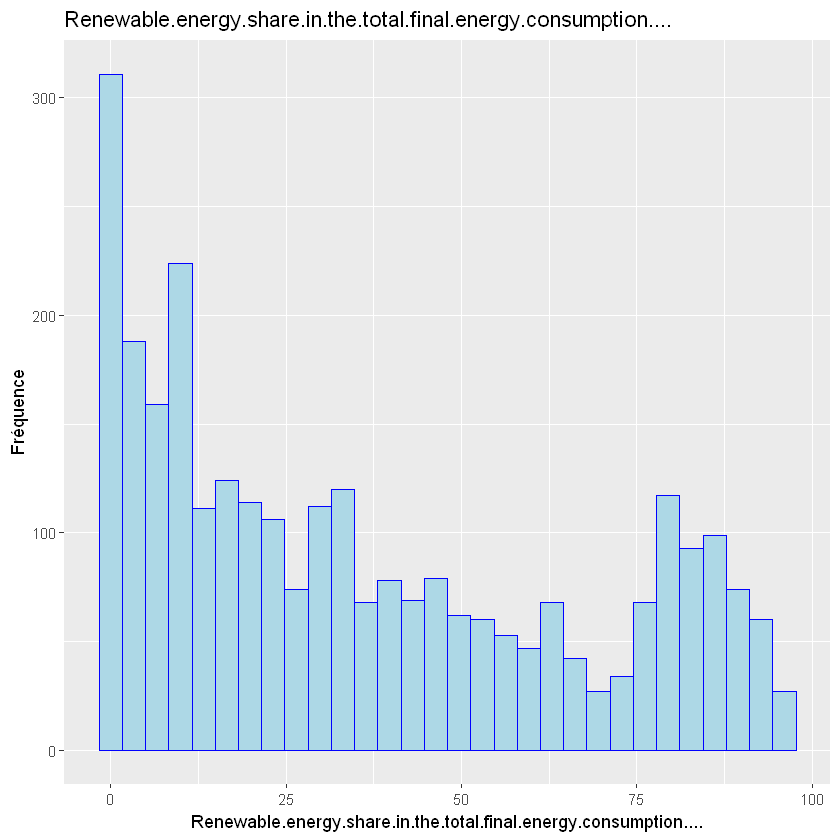

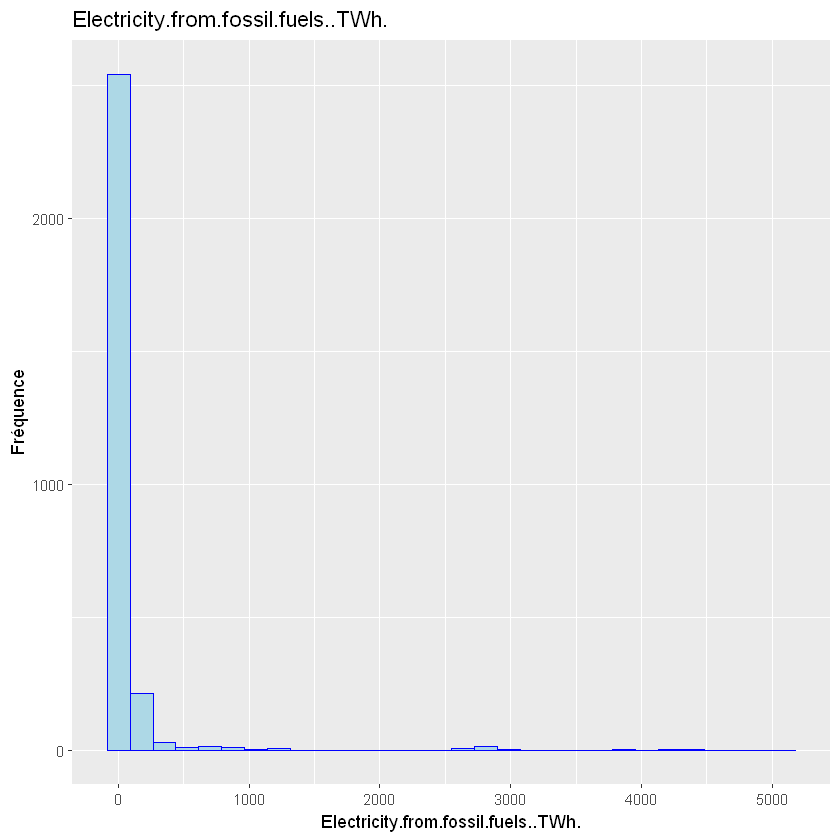

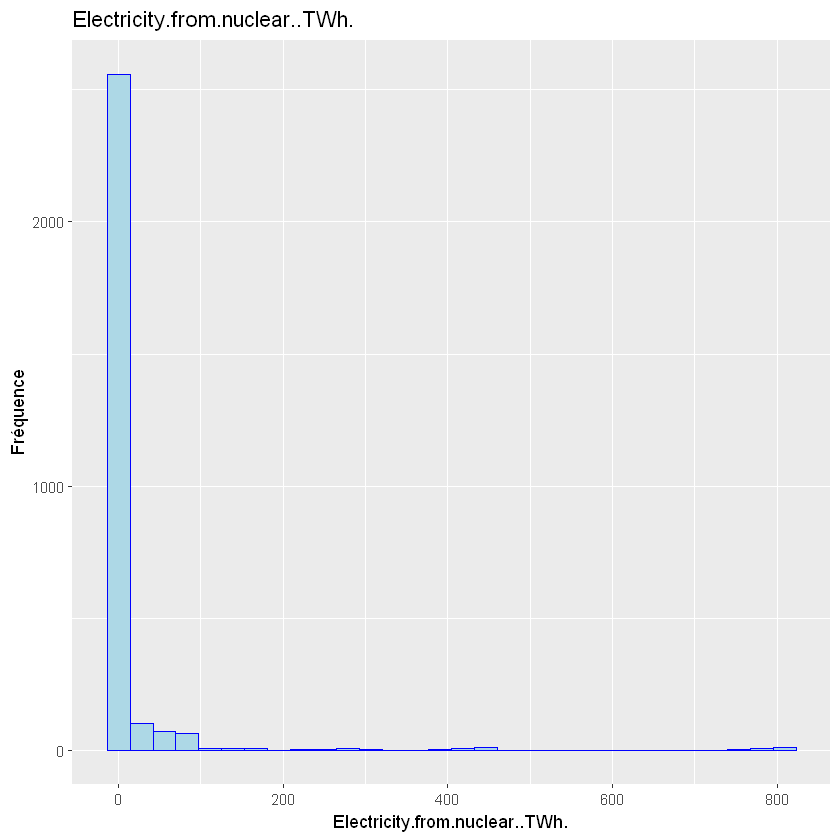

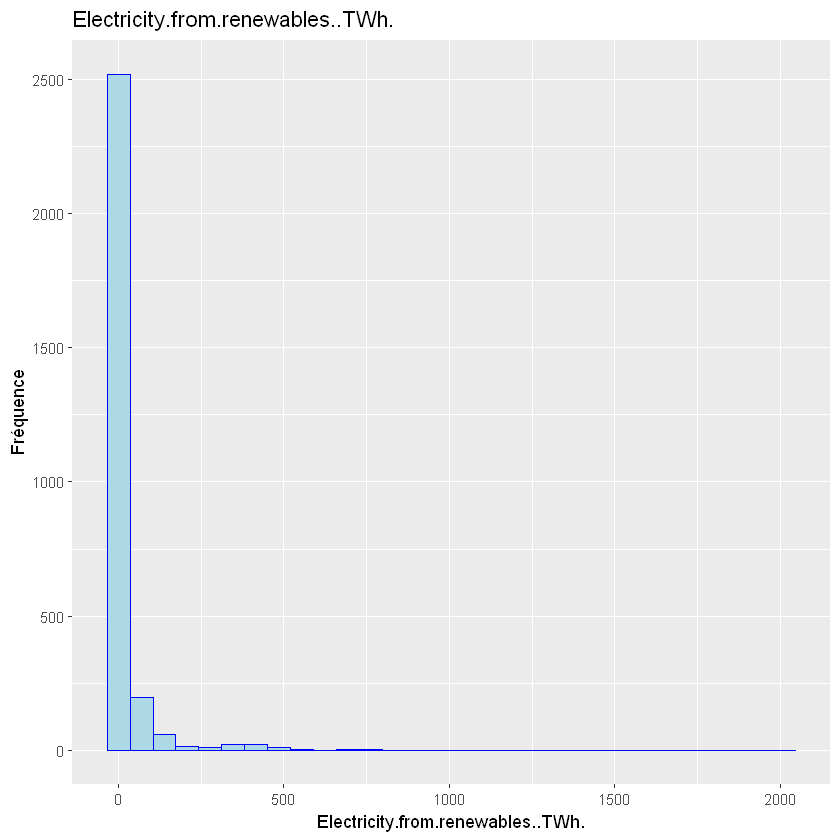

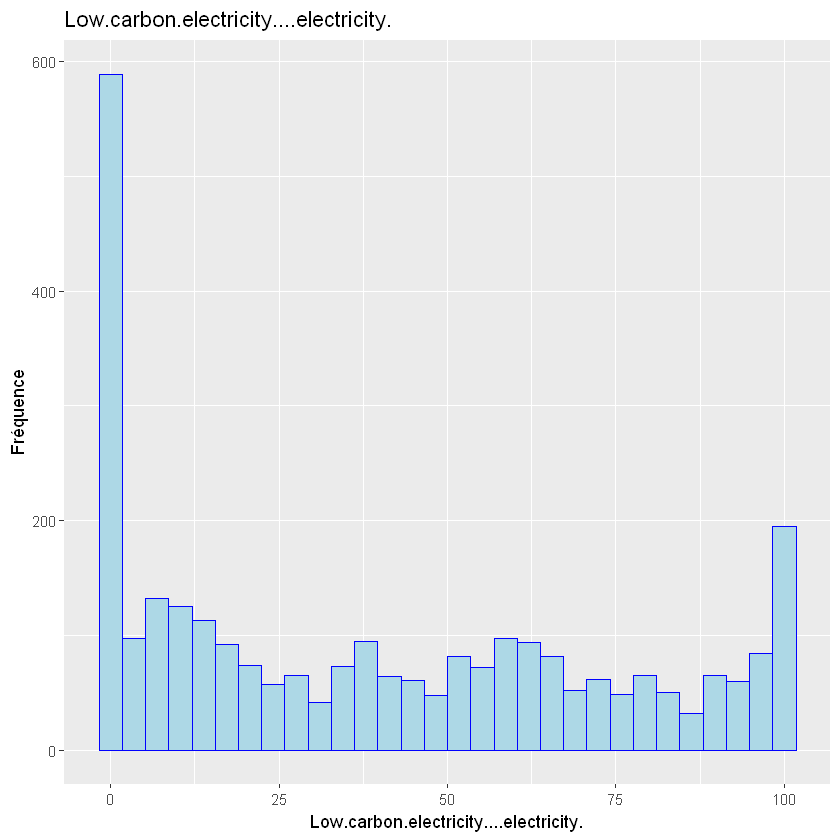

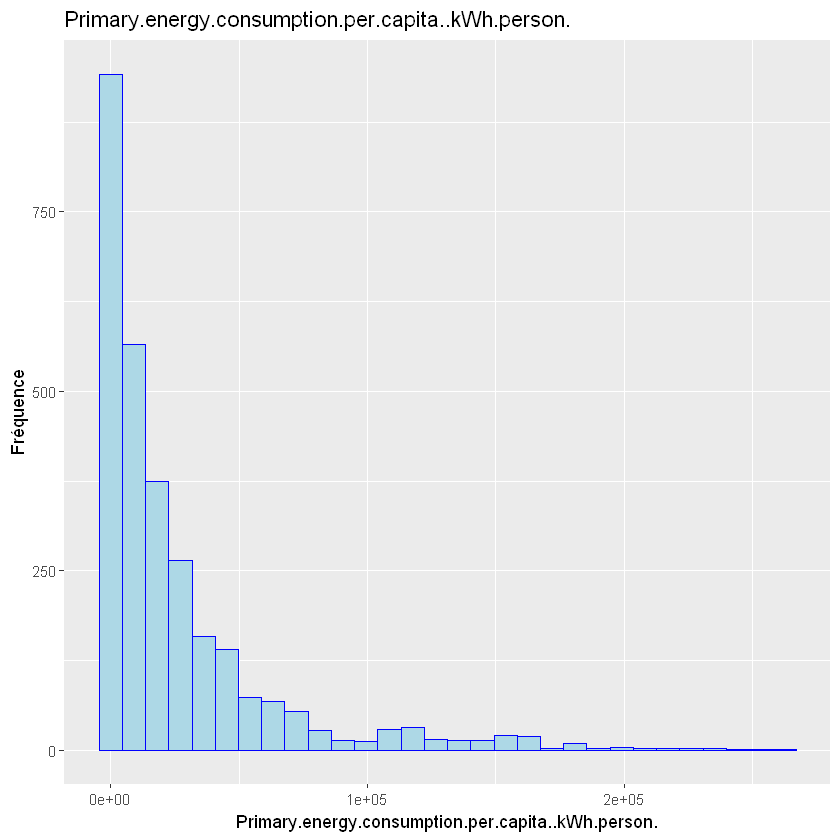

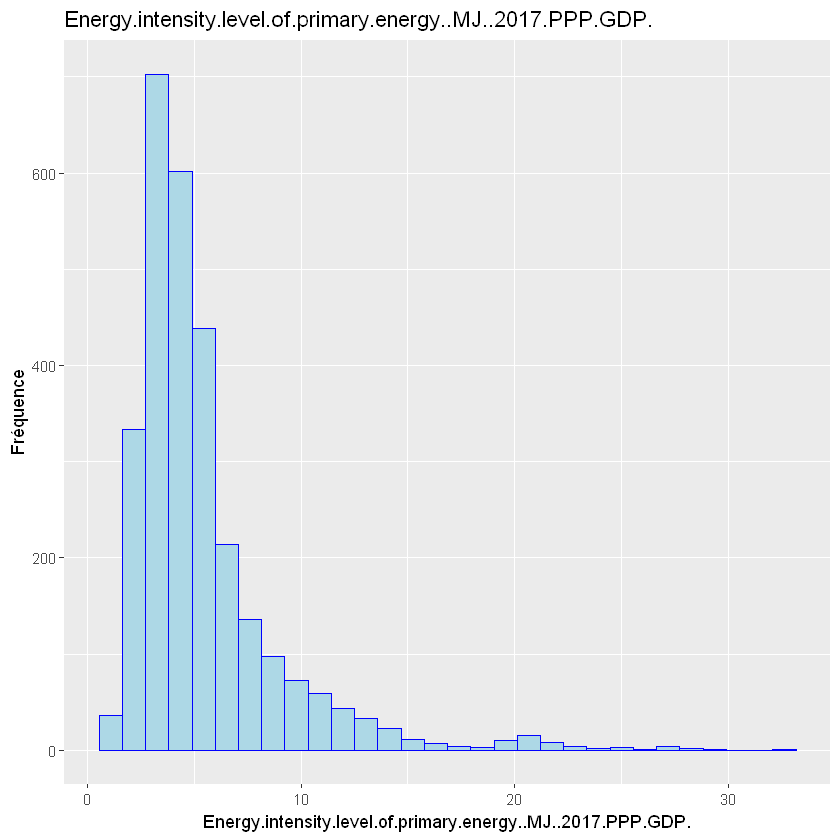

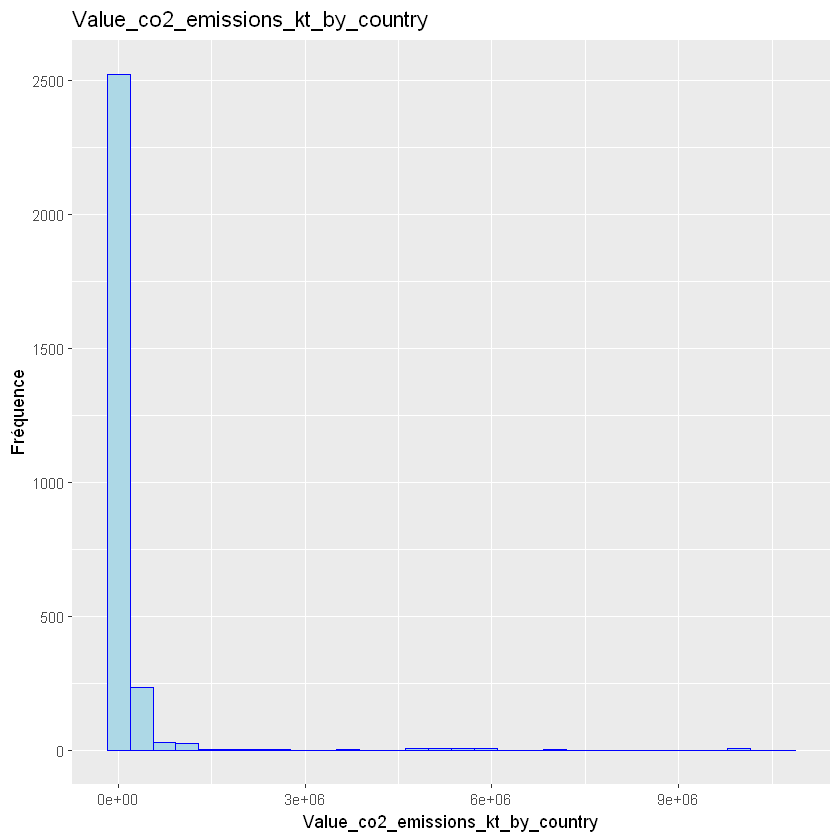

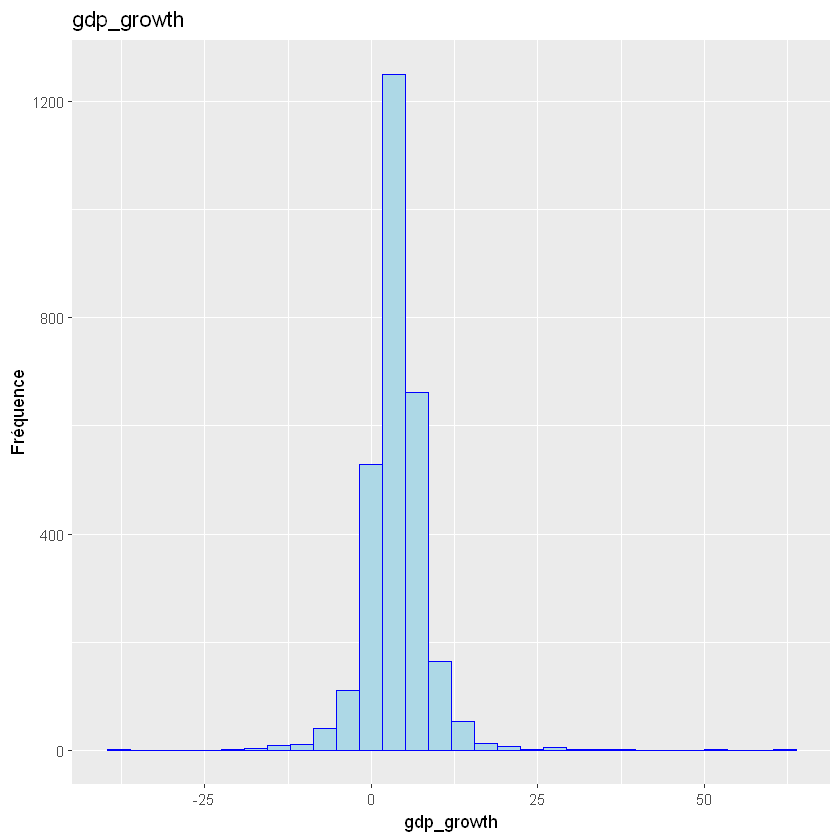

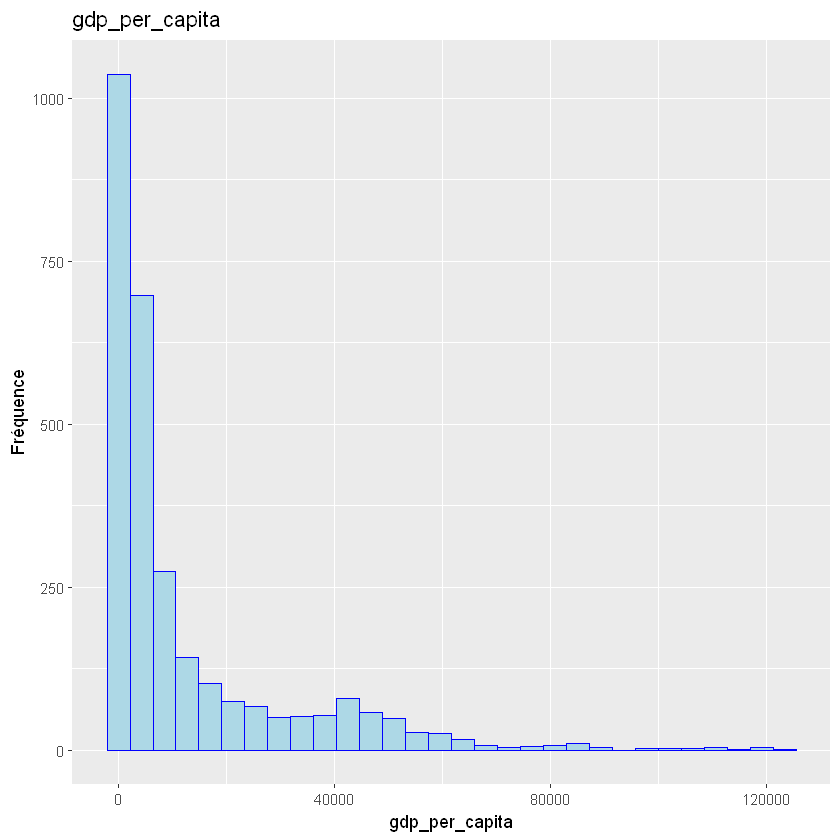

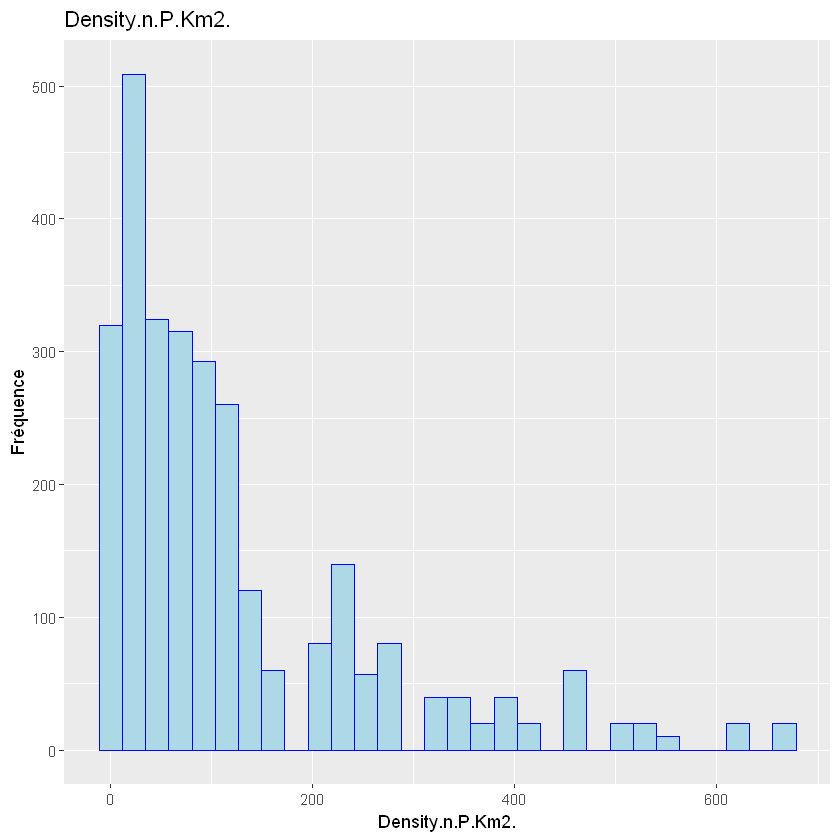

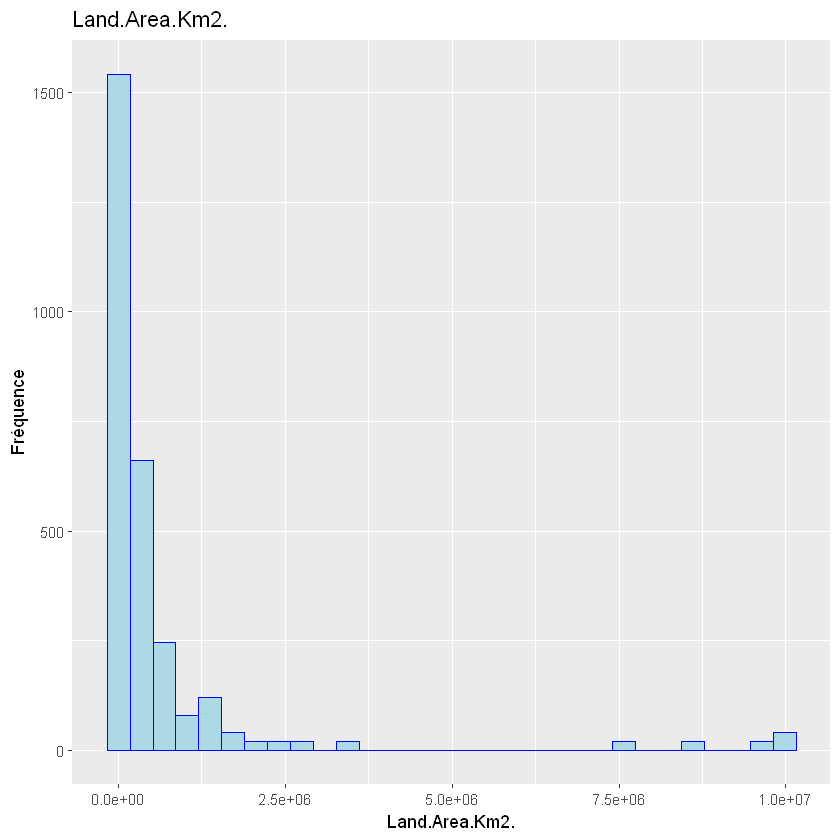

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]

[[7]]

[[8]]

[[9]]

[[10]]

[[11]]

[[12]]

[[13]]

[[14]]

[[15]]

[[16]]


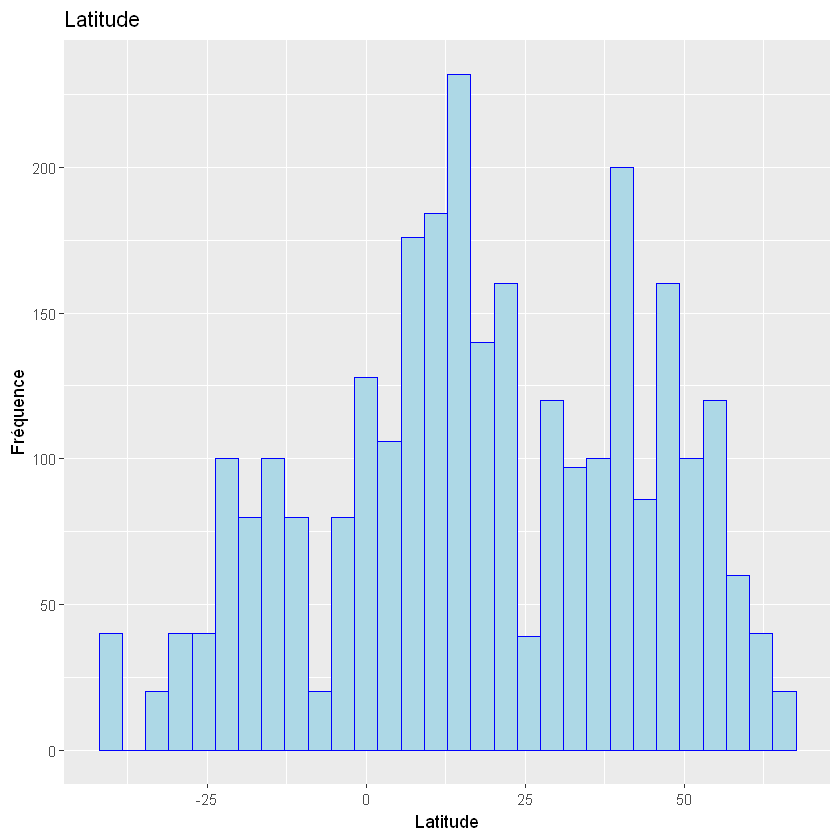

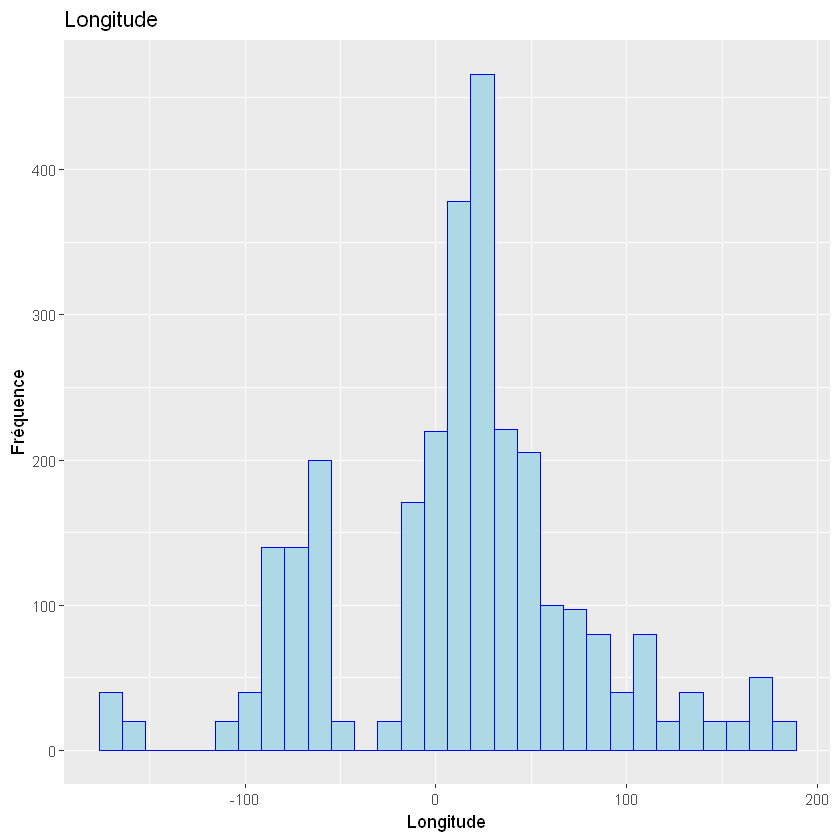

In [10]:
library(ggplot2)

# Sélectionner les variables quantitatives
variables_quantitatives <- sapply(data, is.numeric)

# Créer une liste de graphiques pour chaque variable quantitative
plots <- lapply(names(data)[variables_quantitatives], function(variable) {
  ggplot(data, aes_string(x = variable)) +
    geom_histogram(fill = "lightblue", color = "blue", bins = 30) +
    labs(title = variable, x = variable, y = "Fréquence")
})

# Afficher les graphiques
plots


Ainsi on fait les transformations suivantes :

In [11]:
data$Electricity.from.fossil.fuels..TWh. = log(data$Electricity.from.fossil.fuels..TWh. + 1)
data$Electricity.from.nuclear..TWh. = log(data$Electricity.from.nuclear..TWh. + 1)
data$Renewable.energy.share.in.the.total.final.energy.consumption.... = log(data$Renewable.energy.share.in.the.total.final.energy.consumption.... +1)
data$Low.carbon.electricity....electricity. = sqrt(data$Low.carbon.electricity....electricity. + 1)
data$Primary.energy.consumption.per.capita..kWh.person.	 = log(data$Primary.energy.consumption.per.capita..kWh.person. + 1)
data$Value_co2_emissions_kt_by_country = log(data$Value_co2_emissions_kt_by_country + 1)
data$Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. = log(data$Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. + 1)
data$gdp_per_capita = log(data$gdp_per_capita + 1)
data$Density.n.P.Km2. = log(data$Density.n.P.Km2. +  1)
data$Land.Area.Km2. = log(data$Land.Area.Km2. + 1)



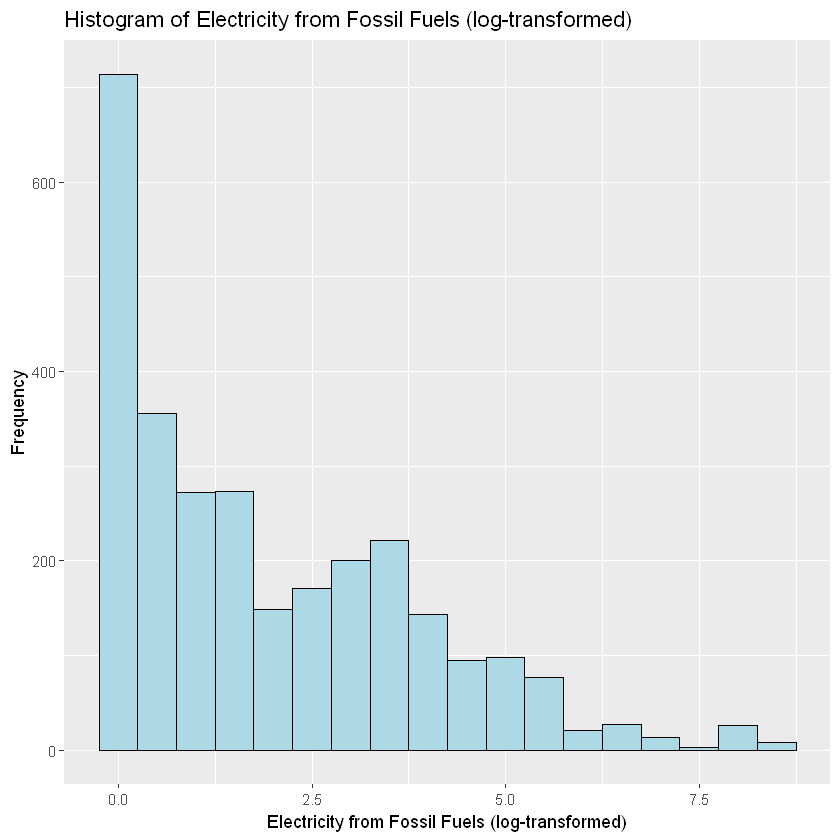

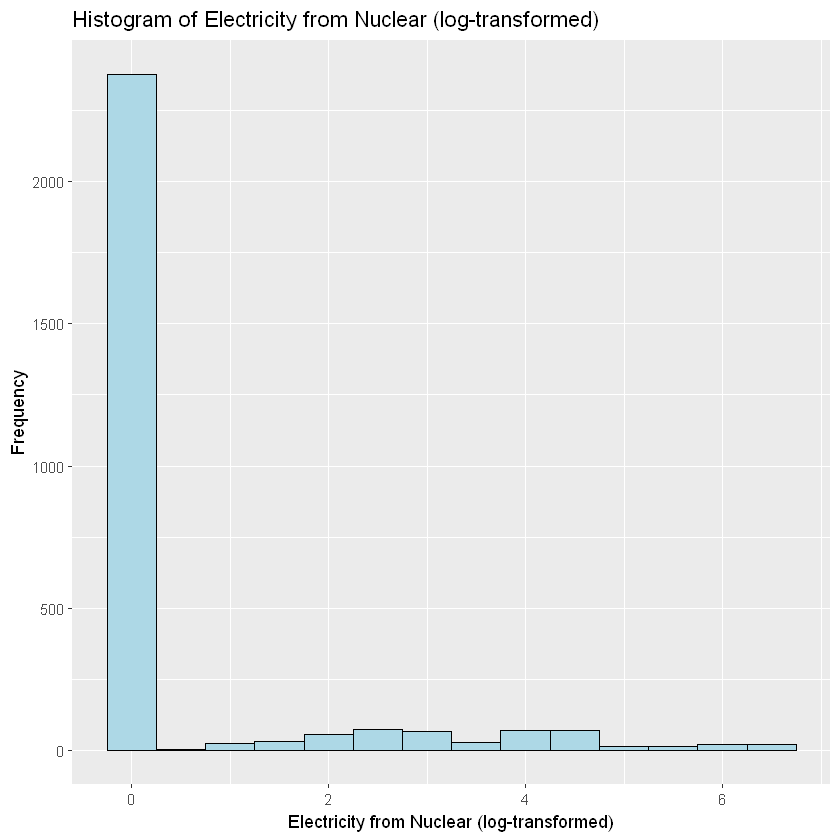

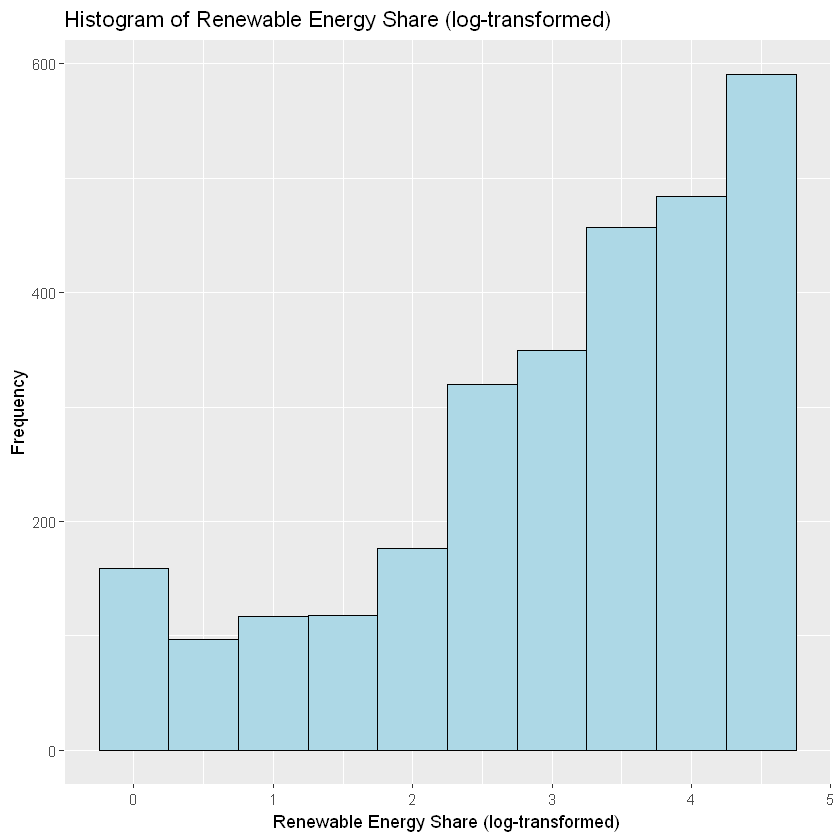

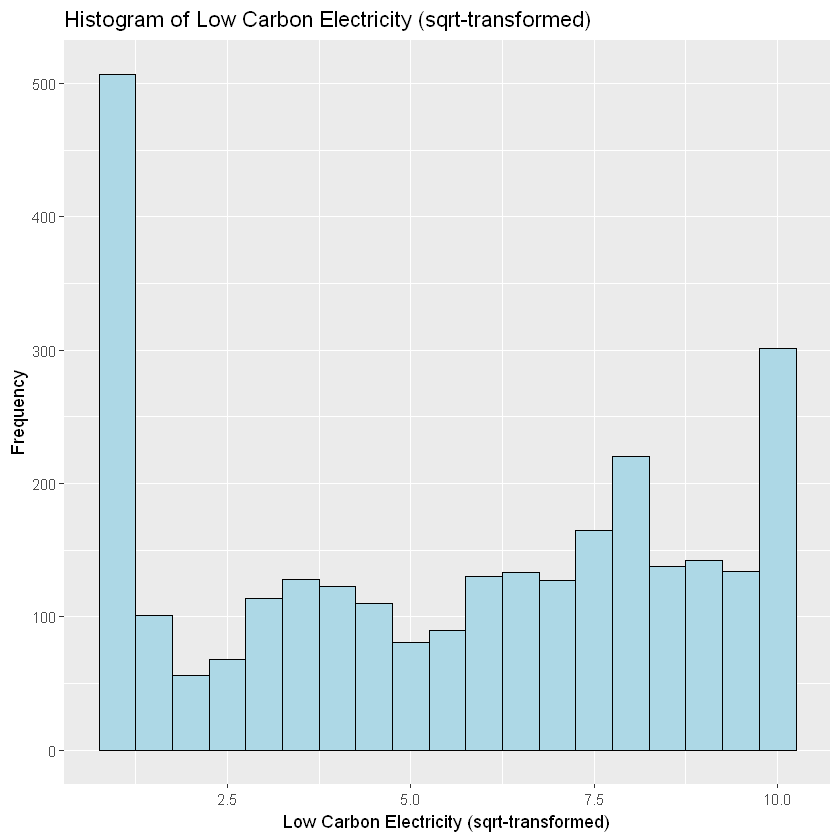

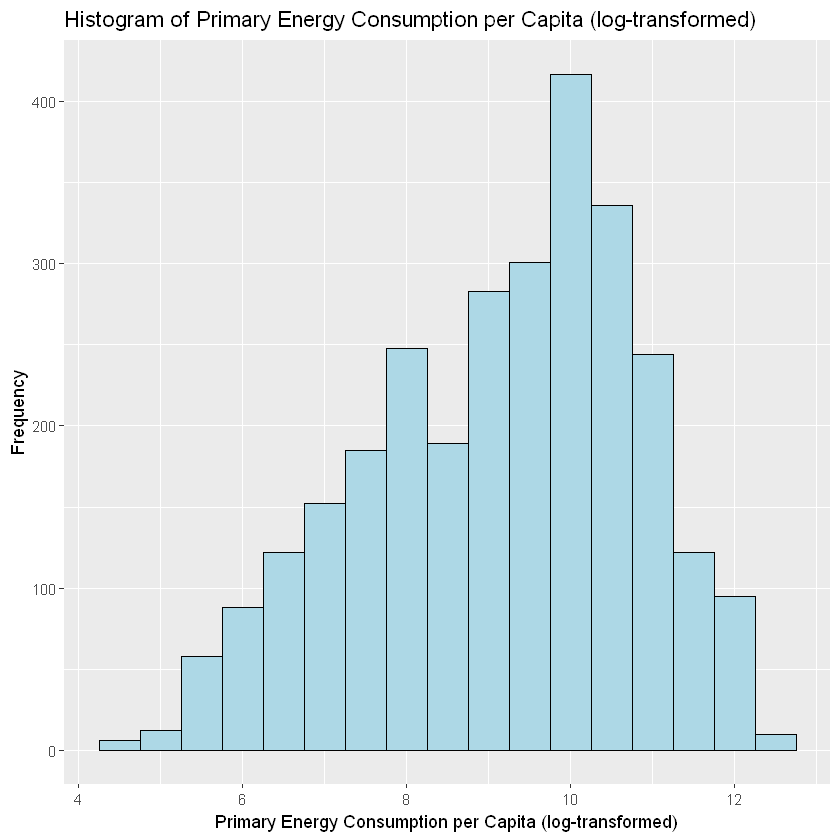

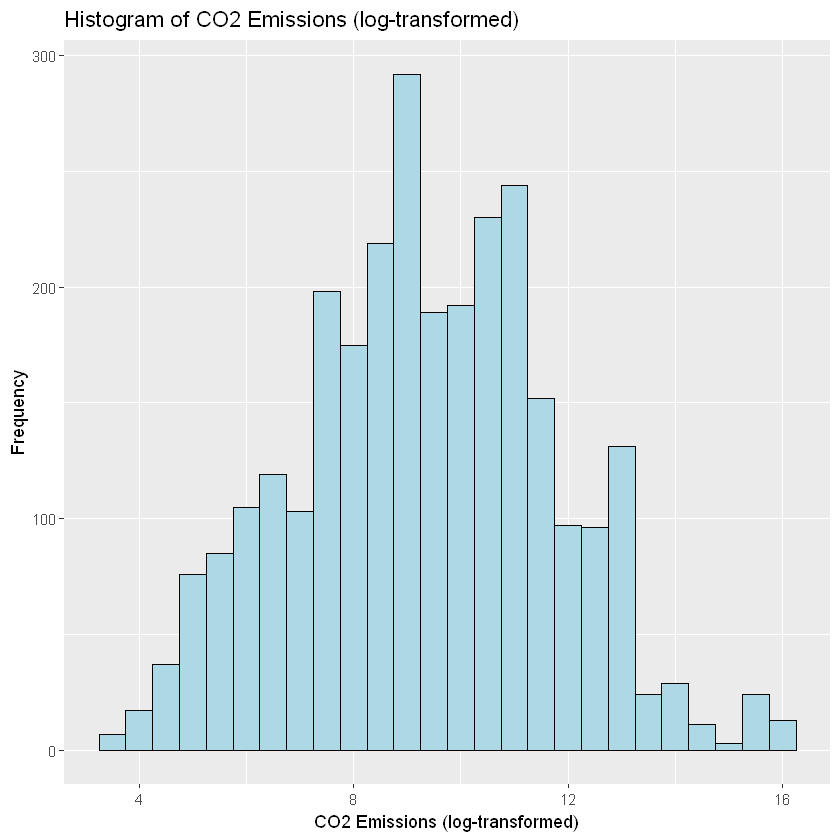

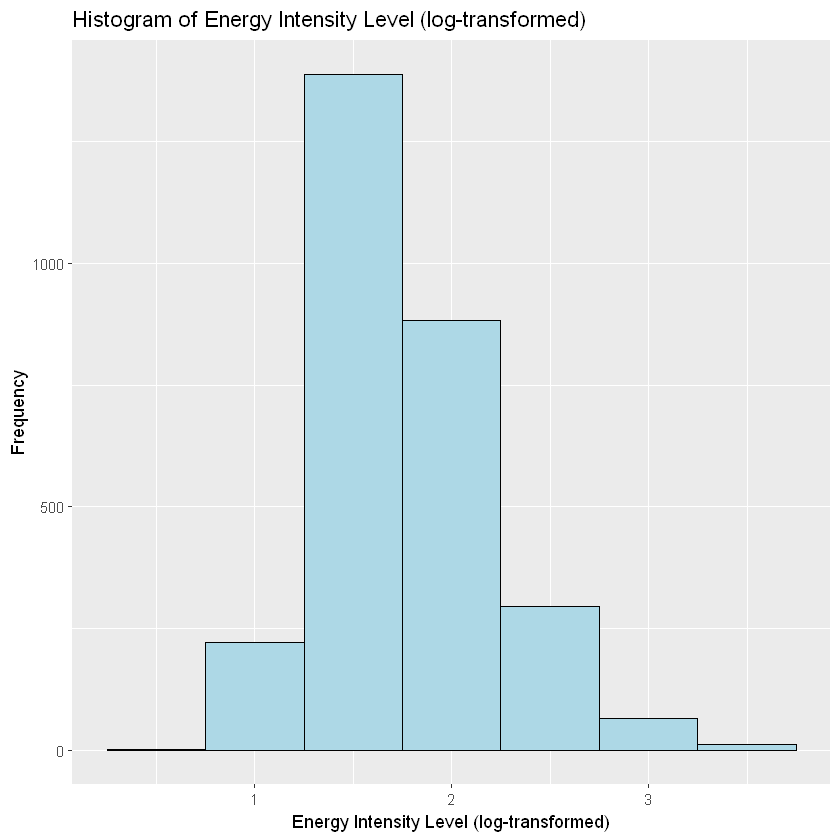

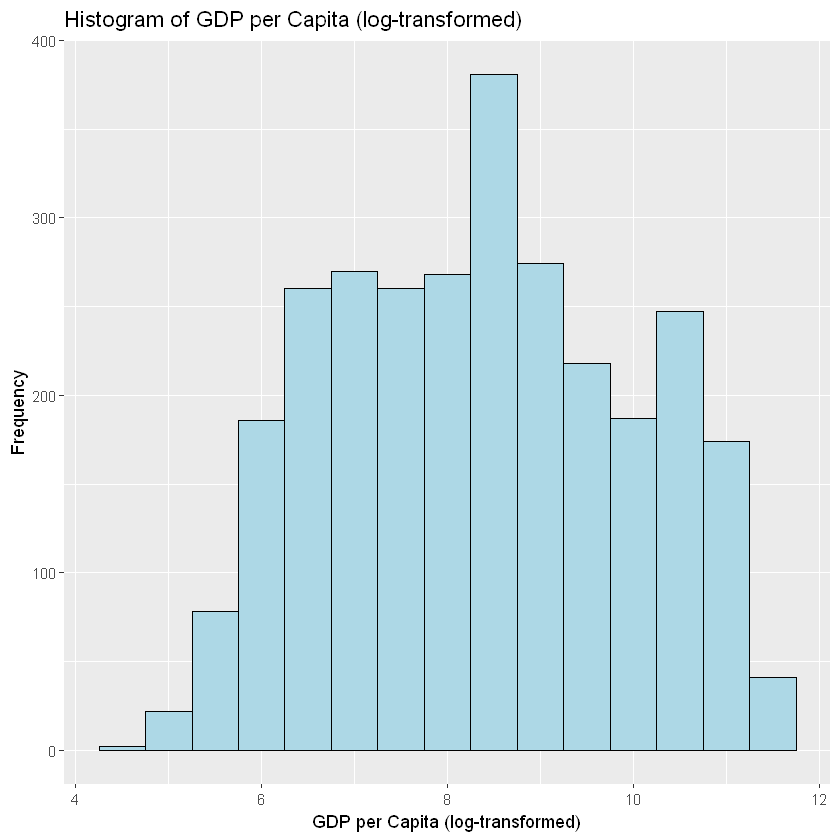

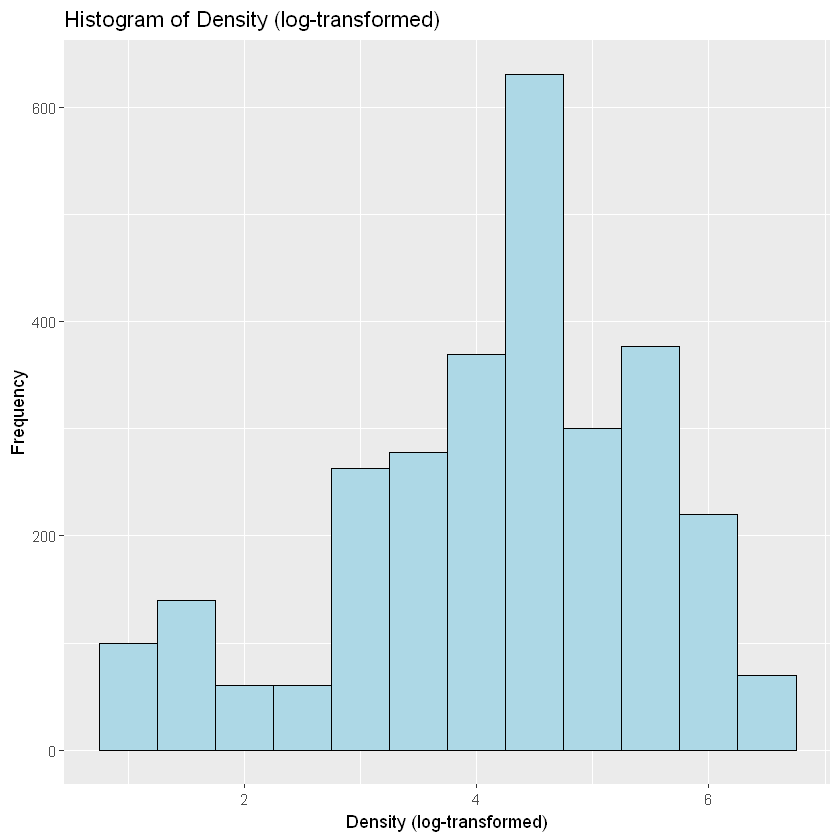

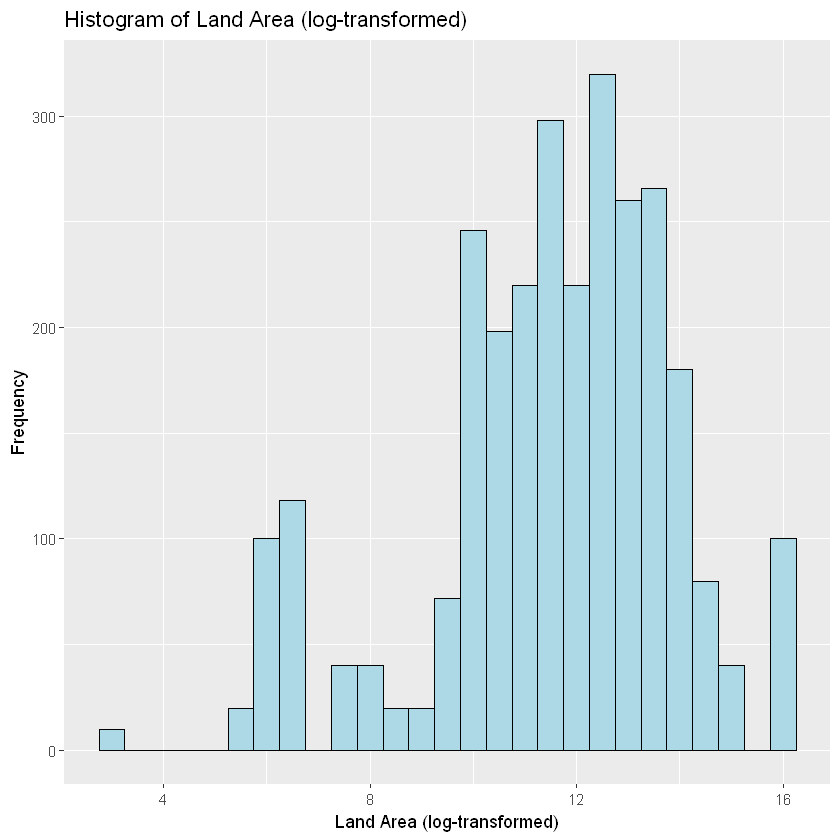

In [12]:
library(ggplot2)

# Histogramme pour Electricity from fossil fuels
ggplot(data, aes(x = Electricity.from.fossil.fuels..TWh.)) +
  geom_histogram(binwidth = 0.5, fill = "lightblue", color = "black") +
  ggtitle("Histogram of Electricity from Fossil Fuels (log-transformed)") +
  xlab("Electricity from Fossil Fuels (log-transformed)") +
  ylab("Frequency")

# Histogramme pour Electricity from nuclear
ggplot(data, aes(x = Electricity.from.nuclear..TWh.)) +
  geom_histogram(binwidth = 0.5, fill = "lightblue", color = "black") +
  ggtitle("Histogram of Electricity from Nuclear (log-transformed)") +
  xlab("Electricity from Nuclear (log-transformed)") +
  ylab("Frequency")

# Histogramme pour Renewable energy share in the total final energy consumption
ggplot(data, aes(x = Renewable.energy.share.in.the.total.final.energy.consumption....)) +
  geom_histogram(binwidth = 0.5, fill = "lightblue", color = "black") +
  ggtitle("Histogram of Renewable Energy Share (log-transformed)") +
  xlab("Renewable Energy Share (log-transformed)") +
  ylab("Frequency")

# Histogramme pour Low carbon electricity
ggplot(data, aes(x = Low.carbon.electricity....electricity.)) +
  geom_histogram(binwidth = 0.5, fill = "lightblue", color = "black") +
  ggtitle("Histogram of Low Carbon Electricity (sqrt-transformed)") +
  xlab("Low Carbon Electricity (sqrt-transformed)") +
  ylab("Frequency")

# Histogramme pour Primary energy consumption per capita
ggplot(data, aes(x = Primary.energy.consumption.per.capita..kWh.person.)) +
  geom_histogram(binwidth = 0.5, fill = "lightblue", color = "black") +
  ggtitle("Histogram of Primary Energy Consumption per Capita (log-transformed)") +
  xlab("Primary Energy Consumption per Capita (log-transformed)") +
  ylab("Frequency")

# Histogramme pour CO2 emissions
ggplot(data, aes(x = Value_co2_emissions_kt_by_country)) +
  geom_histogram(binwidth = 0.5, fill = "lightblue", color = "black") +
  ggtitle("Histogram of CO2 Emissions (log-transformed)") +
  xlab("CO2 Emissions (log-transformed)") +
  ylab("Frequency")

# Histogramme pour Energy intensity level
ggplot(data, aes(x = Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.)) +
  geom_histogram(binwidth = 0.5, fill = "lightblue", color = "black") +
  ggtitle("Histogram of Energy Intensity Level (log-transformed)") +
  xlab("Energy Intensity Level (log-transformed)") +
  ylab("Frequency")

# Histogramme pour GDP per capita
ggplot(data, aes(x = gdp_per_capita)) +
  geom_histogram(binwidth = 0.5, fill = "lightblue", color = "black") +
  ggtitle("Histogram of GDP per Capita (log-transformed)") +
  xlab("GDP per Capita (log-transformed)") +
  ylab("Frequency")

# Histogramme pour Density
ggplot(data, aes(x = Density.n.P.Km2.)) +
  geom_histogram(binwidth = 0.5, fill = "lightblue", color = "black") +
  ggtitle("Histogram of Density (log-transformed)") +
  xlab("Density (log-transformed)") +
  ylab("Frequency")

# Histogramme pour Land Area
ggplot(data, aes(x = Land.Area.Km2.)) +
  geom_histogram(binwidth = 0.5, fill = "lightblue", color = "black") +
  ggtitle("Histogram of Land Area (log-transformed)") +
  xlab("Land Area (log-transformed)") +
  ylab("Frequency")


### 3.2 Hétérogénéité des émissions de CO2 entre les pays

On calcule la moyenne des émissions de CO2 pour chaque pays, ainsi on obtient : 

                      Entity Mean_CO2_Emissions
1                Afghanistan           8.254991
2                    Algeria          11.662351
3                     Angola           9.957371
4        Antigua and Barbuda           6.189686
5                  Argentina          11.976441
6                    Armenia           8.453610
7                  Australia          12.835209
8                    Austria          11.124855
9                 Azerbaijan          10.288293
10                   Bahrain          10.090246
11                Bangladesh          10.746749
12                  Barbados           7.314472
13                   Belarus          10.948739
14                   Belgium          11.538817
15                    Belize           6.358441
16                     Benin           8.280502
17                    Bhutan           6.124357
18    Bosnia and Herzegovina           9.846169
19                  Botswana           8.475373
20                    Brazil          12

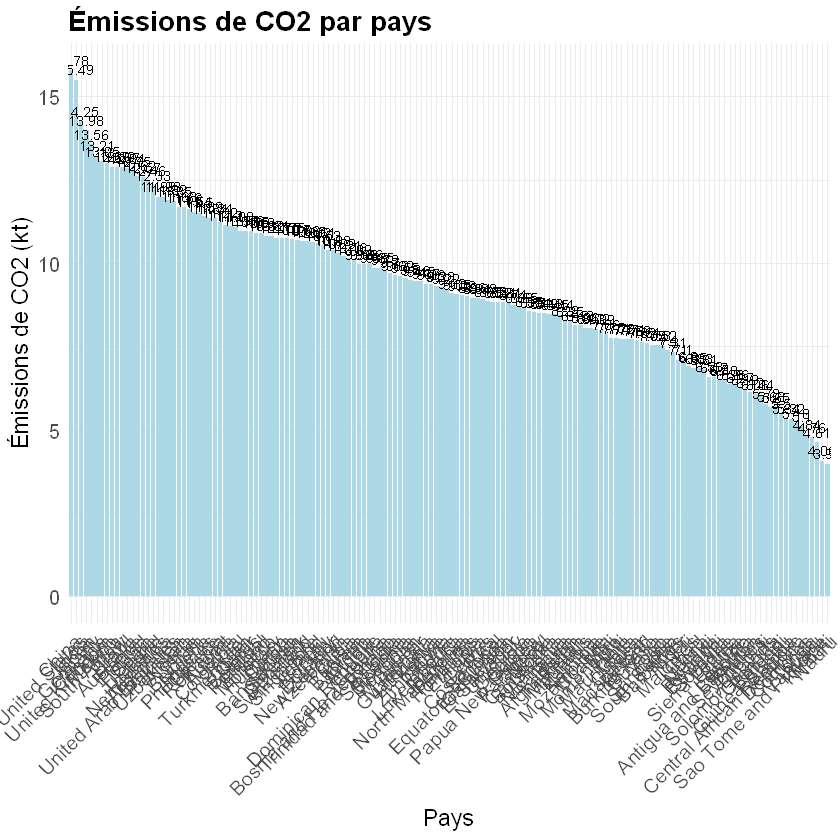

In [17]:
# Calculer la moyenne des émissions de CO2 pour chaque pays
co2_means <- aggregate(Value_co2_emissions_kt_by_country ~ Entity, data = data, FUN = mean)

# Renommer la colonne pour plus de clarté
colnames(co2_means)[2] <- "Mean_CO2_Emissions"

# Afficher les moyennes des émissions de CO2 pour chaque pays
print(co2_means)

# Trier les pays par ordre décroissant des émissions de CO2
top_5_emitters <- co2_means[order(co2_means$Mean_CO2_Emissions, decreasing = TRUE), ]

# Sélectionner les cinq premiers pays
top_5_emitters <- head(top_5_emitters, 5)

library(ggplot2)

# Créer un graphique à barres pour visualiser les émissions de CO2 par pays
ggplot(co2_means, aes(x = reorder(Entity, -Mean_CO2_Emissions), y = Mean_CO2_Emissions)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  labs(title = "Émissions de CO2 par pays",
   	x = "Pays",
   	y = "Émissions de CO2 (kt)") +
  theme_minimal() +  # Utiliser un thème minimal pour une apparence propre
  theme(axis.text.x = element_text(angle = 45, hjust = 1),  # Incliner les étiquettes de l'axe x pour une meilleure lisibilité
    	plot.title = element_text(size = 16, face = "bold"),  # Ajuster la taille et le style du titre du graphique
    	axis.title = element_text(size = 14),  # Ajuster la taille du texte des axes
    	axis.text = element_text(size = 12)) +  # Ajuster la taille du texte des étiquettes des axes
  geom_text(aes(label = round(Mean_CO2_Emissions, 2)), vjust = -0.5, size = 3)  # Ajouter les valeurs au-dessus des barres

# Tri des données par émissions de CO2 décroissantes
top_5_emitters <- co2_means[order(-co2_means$Mean_CO2_Emissions), ][1:5, ]

# Affichage des cinq premiers pays les plus émetteurs de CO2
print(top_5_emitters$Entity)



On remarque ainsi une grande hétérogéinité des émissions de CO2 entre chaque pays ; on constate notamment que les plus gros émetteurs de CO2 sont la Chine, les Etats-Unis, l'Inde, le Japon et l'Allemagne.

## 4. Analyse descriptive multidimensionnelle 

### 4.1 Nuages de points

On affiche GDP per capita en fonction de Value CO2 Emissions.

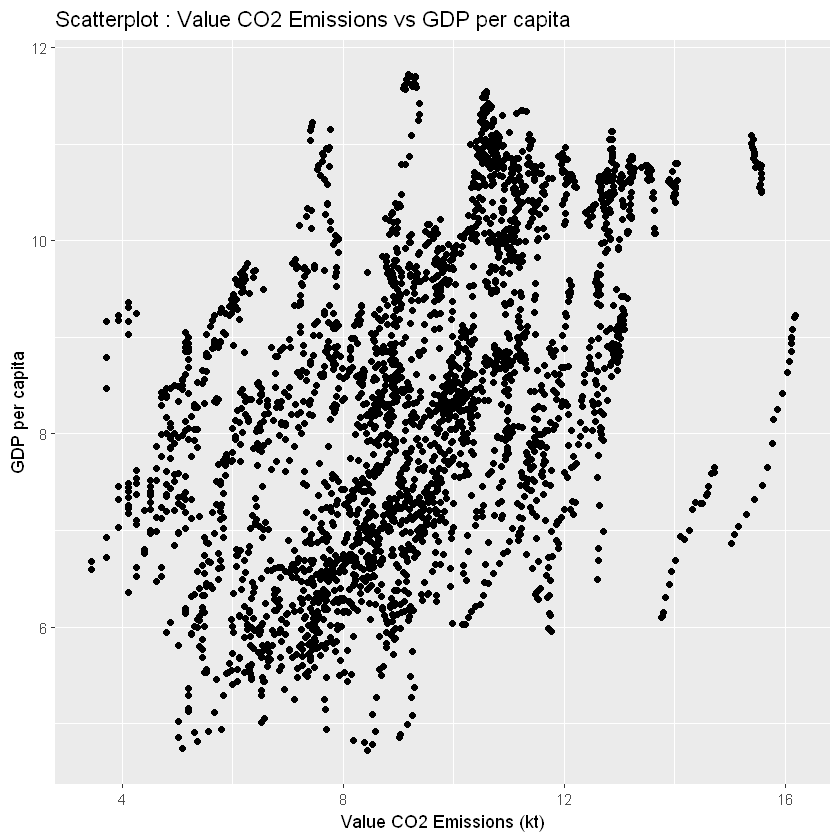

In [18]:
# Charger la bibliothèque ggplot2 pour la visualisation
library(ggplot2)

# Nuage de points entre deux variables quantitatives (par exemple, Value_co2_emissions_kt_by_country et gdp_per_capita)
ggplot(data, aes(x = Value_co2_emissions_kt_by_country, y = gdp_per_capita)) +
  geom_point() +
  labs(x = "Value CO2 Emissions (kt)", y = "GDP per capita") +
  ggtitle("Scatterplot : Value CO2 Emissions vs GDP per capita")

Pas de dépendance a priori entre Value CO2 et le PIB du pays.

### 4.2 Corrélations entre chaque variable

Etablissions la matrice de corrélation afin de déterminer corrélations entre chaque variable :

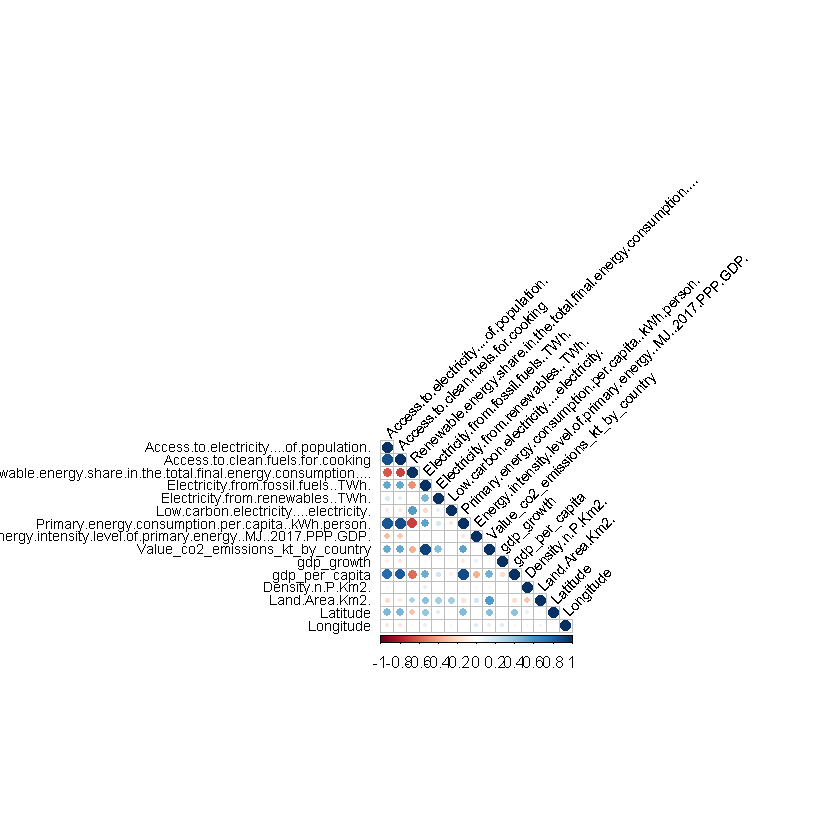

In [15]:
# Sélectionner les variables quantitatives
variables_quantitatives <- data[, c("Access.to.electricity....of.population.", "Access.to.clean.fuels.for.cooking",
                                    "Renewable.energy.share.in.the.total.final.energy.consumption....",
                                    "Electricity.from.fossil.fuels..TWh.", "Electricity.from.renewables..TWh.",
                                    "Low.carbon.electricity....electricity.",
                                    "Primary.energy.consumption.per.capita..kWh.person.",
                                    "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.",
                                    "Value_co2_emissions_kt_by_country", "gdp_growth", "gdp_per_capita",
                                    "Density.n.P.Km2.", "Land.Area.Km2.", "Latitude", "Longitude")]
library(corrplot)

# Calculer la matrice de corrélation
correlation_matrix <- cor(variables_quantitatives)

# Afficher le corrplot
# Afficher le corrplot avec une taille de texte réduite
corrplot(correlation_matrix, method = "circle", type = "lower", tl.col = "black", tl.srt = 45, tl.cex = 0.7)



On remarque que Value CO2 est très corrélée à Electricity from fossil fuel.

## 5. Analyse en compostantes principales des variables quantitatives

In [16]:
# Charger la bibliothèque ggplot2 pour la visualisation
library(ggplot2)

# Sélectionner les variables quantitatives
variables_quantitatives <- data[, c("Access.to.electricity....of.population.", "Access.to.clean.fuels.for.cooking",
                                    "Renewable.energy.share.in.the.total.final.energy.consumption....",
                                    "Electricity.from.fossil.fuels..TWh.", "Electricity.from.renewables..TWh.",
                                    "Low.carbon.electricity....electricity.",
                                    "Primary.energy.consumption.per.capita..kWh.person.",
                                    "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.",
                                    "Value_co2_emissions_kt_by_country", "gdp_growth", "gdp_per_capita",
                                    "Density.n.P.Km2.", "Land.Area.Km2.", "Latitude", "Longitude")]

# Créer toutes les combinaisons de paires de variables
combinations <- combn(names(variables_quantitatives), 2)

# Boucle pour créer les scatterplots pour chaque paire de variables
for (i in 1:ncol(combinations)) {
  var1 <- combinations[1, i]
  var2 <- combinations[2, i]
  
  # Créer le scatterplot pour la paire de variables actuelle
  plot_title <- paste("Scatterplot:", var1, "vs", var2)
  ggplot(data, aes_string(x = var1, y = var2)) +
    geom_point() +
    labs(x = var1, y = var2) +
    ggtitle(plot_title)
}


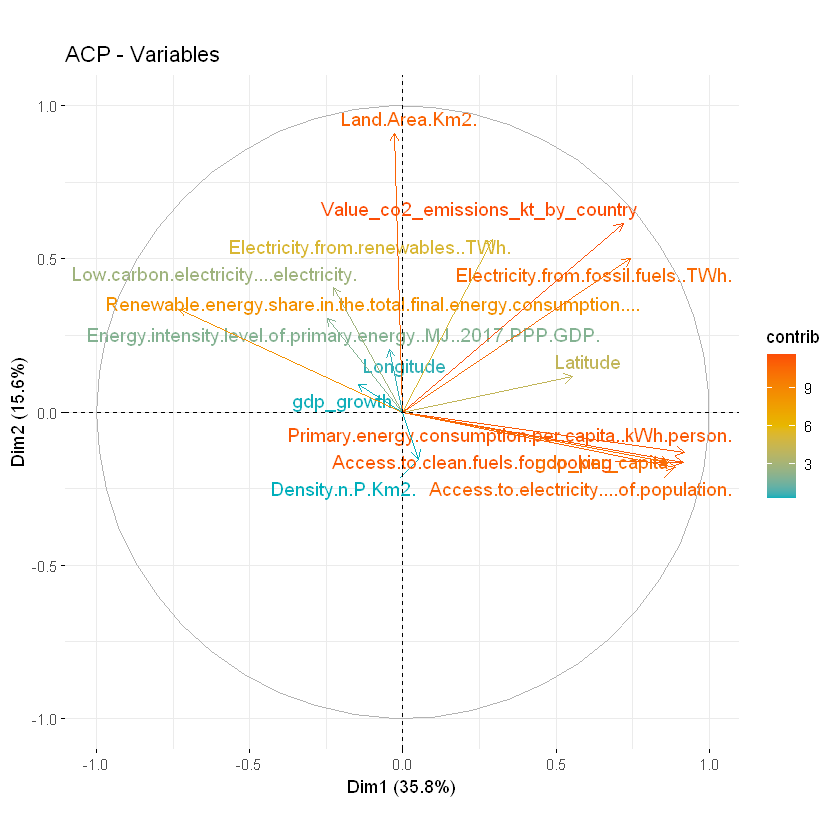

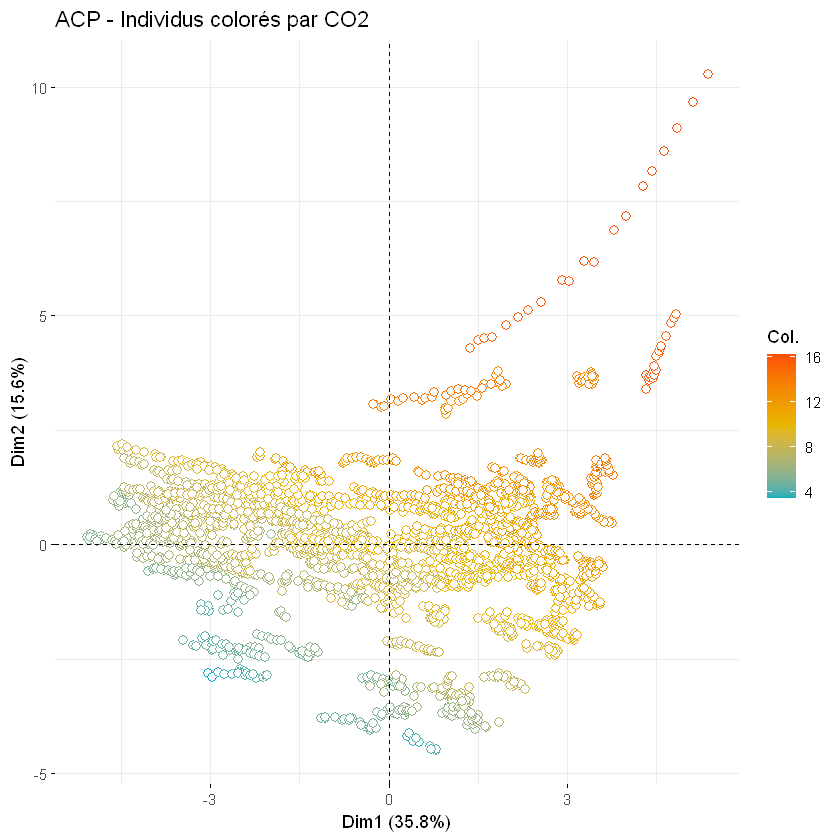

In [17]:
# Charger la librairie
library(factoextra)

# Sélectionner les variables quantitatives
variables_quantitatives <- data[, c("Access.to.electricity....of.population.", "Access.to.clean.fuels.for.cooking",
                                    "Renewable.energy.share.in.the.total.final.energy.consumption....",
                                    "Electricity.from.fossil.fuels..TWh.", "Electricity.from.renewables..TWh.",
                                    "Low.carbon.electricity....electricity.",
                                    "Primary.energy.consumption.per.capita..kWh.person.",
                                    "Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.",
                                    "Value_co2_emissions_kt_by_country", "gdp_growth", "gdp_per_capita",
                                    "Density.n.P.Km2.", "Land.Area.Km2.", "Latitude", "Longitude")]

# Effectuer une ACP
acp <- prcomp(variables_quantitatives, scale = TRUE)

# Visualiser les résultats de l'ACP


fviz_pca_var(acp, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, # Pour éviter le chevauchement des noms des variables
             title = "ACP - Variables")

# Ajouter les valeurs de CO2 à l'ACP
ind <- get_pca_ind(acp)
ind$data$CO2 <- data$Value_co2_emissions_kt_by_country

# Visualiser les résultats de l'ACP - Individus colorés par CO2
fviz_pca_ind(acp, geom = "point",
             col.ind = ind$data$CO2, # Colorer les individus par la valeur de CO2
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), # Couleurs du gradient
             repel = TRUE, # Pour éviter le chevauchement des noms des individus
             title = "ACP - Individus colorés par CO2",
             label = "none", # Ne pas afficher les labels des individus
             pointshape = 21, # Forme des points
             pointsize = 2.5) # Taille des points


Nous avons habillé le graphe des individus avec la valeur de "Value_CO2", ainsi nous remarquons que la somme des 2 composantes principales représente la valeur de "Value_CO2".

## 6. Dépendance entre la variable Year et la variable à prédire

Analysons la dépendance entre la variable Year et la variable "CO2_value".

In [18]:
str(data)

'data.frame':	2868 obs. of  18 variables:
 $ Entity                                                          : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 4 5 6 7 8 9 10 11 12 13 ...
 $ Access.to.electricity....of.population.                         : num  14.7 20.1 25.4 30.7 36.1 ...
 $ Access.to.clean.fuels.for.cooking                               : num  9.5 10.9 12.2 13.8 15.3 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  3.63 3.81 3.55 3.49 3.39 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.27 0.285 0.293 0.182 0.182 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.63 0.56 0.59 0.64 0.75 0.54 0.78 0.75 0.6 0.74 ...
 $ Low.carbon.electricity....electricity.          

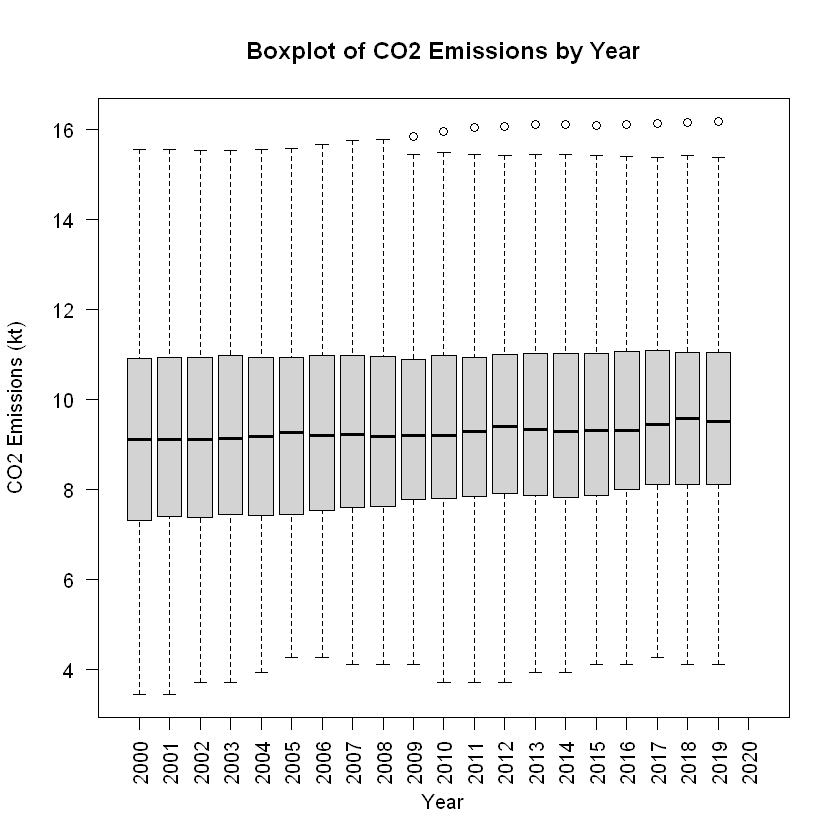

In [19]:
boxplot(Value_co2_emissions_kt_by_country ~ Year, data = data,
        xlab = "Year", ylab = "CO2 Emissions (kt)",
        main = "Boxplot of CO2 Emissions by Year",
        las = 2) # las = 2 pour les étiquettes de l'axe x verticales


On remarque que l'année n'a pas d'influence notable sur la valeur de "Value_CO2".

## 7. Construction des Datasets

Dans un premier temps, on génère les indices des lignes aléatoirement qui vont permettre la construction de chaque dataset. Nous allons prendre 20% des données pour le jeu de données de test et 80% pour le jeu de données d'entraînement.

In [20]:
head(data)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,Low.carbon.electricity....electricity.,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,Afghanistan,2003,14.73851,9.50,3.628599,0.2700271,0,0.63,8.247501,5.442280,0.8754687,7.107425,8.832278,5.255847,4.110874,13.38815,33.93911,67.70995
5,Afghanistan,2004,20.06497,10.90,3.811982,0.2851789,0,0.56,7.995083,5.324137,0.7884574,6.938284,1.414118,5.358387,4.110874,13.38815,33.93911,67.70995
6,Afghanistan,2005,25.39089,12.20,3.551914,0.2926696,0,0.59,8.027506,5.533663,0.8796267,7.346655,11.229715,5.493190,4.110874,13.38815,33.93911,67.70995
7,Afghanistan,2006,30.71869,13.85,3.493169,0.1823216,0,0.64,8.785811,5.721691,0.9162907,7.473637,5.357403,5.578724,4.110874,13.38815,33.93911,67.70995
8,Afghanistan,2007,36.05101,15.30,3.393837,0.1823216,0,0.75,8.941329,5.872906,0.9282193,7.479300,13.826320,5.888028,4.110874,13.38815,33.93911,67.70995
9,Afghanistan,2008,42.40000,16.70,3.098740,0.1739533,0,0.54,8.658672,6.411545,1.0784096,8.177797,3.924984,5.901714,4.110874,13.38815,33.93911,67.70995


In [21]:
##GENERE LES INDICES DES LIGNES ALEATOIREMENT POUR CHAQUE DATASET

set.seed(132) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(data) # nombre de lignes dans les données
nvar <- ncol(data) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 


In [22]:
##CONSTRUIT LES DATASET À PARTIR DES INDICES PRECEDENTS

# construction de l'échantillon d'apprentissage
datappr <- data[appri,-19] 
# construction de l'échantillon test
datestr <- data[testi,-19]  #-19 pour prendre toutes les colonnes (toutes les variables) (prend tous sauf la colonne 19)
# vérification
str(datappr)
str(datestr)
#summary(datappr) 


#data1=datappr[,-1]
#head(data1)


'data.frame':	2294 obs. of  18 variables:
 $ Entity                                                          : Factor w/ 176 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                                                            : Factor w/ 21 levels "2000","2001",..: 5 6 7 8 11 12 14 15 16 17 ...
 $ Access.to.electricity....of.population.                         : num  20.1 25.4 30.7 36.1 42.7 ...
 $ Access.to.clean.fuels.for.cooking                               : num  10.9 12.2 13.8 15.3 20 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  3.81 3.55 3.49 3.39 2.78 ...
 $ Electricity.from.fossil.fuels..TWh.                             : num  0.285 0.293 0.182 0.182 0.174 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.56 0.59 0.64 0.75 0.75 0.6 0.89 1 1.03 1.06 ...
 $ Low.carbon.electricity....electricity.           

In [23]:
datappr1 <- datappr[, !(names(datappr) %in% c("Entity", "Electricity.from.fossil.fuels..TWh."))]


datestr1 <- datestr[, !(names(datappr) %in% c("Entity", "Electricity.from.fossil.fuels..TWh."))]




In [24]:
##FONCTION POUR TRACER LE GRAPHE DES RESIDUS
gplot.res <- function(x, y, titre = "titre"){
    ggplot(data.frame(x=x, y=y),aes(x,y))+
    geom_point(col = "blue")+xlim(0, 250)+ylim(-150, 150)+
    ylab("Résidus")+ xlab("Valeurs prédites")+
    ggtitle(titre)+
    geom_hline(yintercept = 0,col="green")
}


## 8. Prévision par modèle linéaire Gaussien

### 8.1 Sans sélection de variable

Pour cela, on va utiliser un modèle ANCOVA en prenant comme variable cible Value_co2_emissions_kt_by_country. Avec ce modèle on obtient le graphe des résidus suivant : 

In [25]:
#datappr1 <- datappr[, !(names(datappr) %in% c("Entity", "Electricity.from.fossil.fuels..TWh.","Year"))]


#datestr1 <- datestr[, !(names(datappr) %in% c("Entity", "Electricity.from.fossil.fuels..TWh.","Year"))]




In [26]:
library(ggplot2)


# Créer une formule pour inclure toutes les variables explicatives sauf CO2
formula <- as.formula(paste("Value_co2_emissions_kt_by_country ~ ."))

# Effectuer l'ANCOVA
ancova_model <- lm(Value_co2_emissions_kt_by_country ~ ., data = datappr1)


# Afficher un résumé du modèle
#summary(ancova_model)





coef(ancova_model)

(Intercept) 
                                                   -6.4462726528 
                                                        Year2001 
                                                   -0.0323306329 
                                                        Year2002 
                                                   -0.0639050899 
                                                        Year2003 
                                                   -0.0850560422 
                                                        Year2004 
                                                   -0.0553320172 
                                                        Year2005 
                                                   -0.0724274432 
                                                        Year2006 
                                                   -0.1043412912 
                                                        Year2007 
                                                   -0.0766793122 
                                                        Year2008 
                                                   -0.1051380277 
                                                        Year2009 
                                                   -0.0504661682 
                                                        Year2010 
                                                   -0.0642639675 
                                                        Year2011 
                                                    0.0144661491 
                                                        Year2012 
                                                   -0.0510836120 
                                                        Year2013 
                                                   -0.0319008305 
                                                        Year2014 
                                                    0.0122655604 
                                                        Year2015 
                                                    0.0154592679 
                                                        Year2016 
                                                    0.0132257493 
                                                        Year2017 
                                                    0.0255288231 
                                                        Year2018 
                                                    0.0191589486 
                                                        Year2019 
                                                   -0.0400093681 
                         Access.to.electricity....of.population. 
                                                    0.0118065667 
                               Access.to.clean.fuels.for.cooking 
                                                   -0.0037162307 
Renewable.energy.share.in.the.total.final.energy.consumption.... 
                                                   -0.2856119432 
                                  Electricity.from.nuclear..TWh. 
                                                    0.1488447329 
                               Electricity.from.renewables..TWh. 
                                                    0.0008282874 
                          Low.carbon.electricity....electricity. 
                                                   -0.0603771689 
              Primary.energy.consumption.per.capita..kWh.person. 
                                                    0.5232918428 
     Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. 
                                                   -0.3326561516 
                                                      gdp_growth 
                                                    0.0056230681 
                                                  gdp_per_capita 
                                                    0.0901196657 
                                                Density.n.P.Km2. 
                           

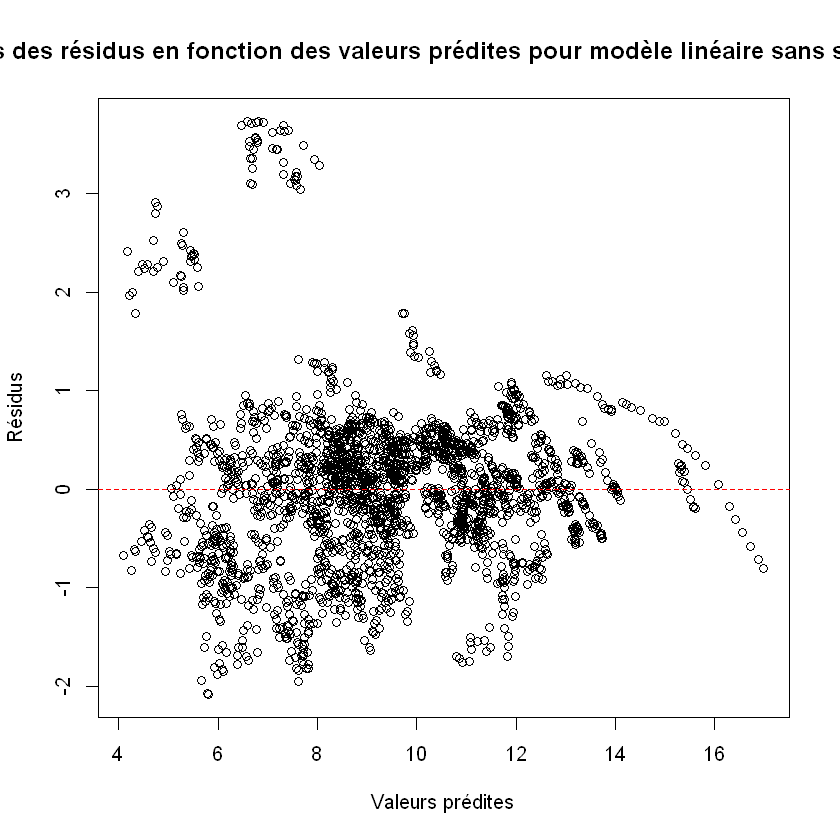

In [27]:
residuals <- resid(ancova_model)
fitted.values <- fitted(ancova_model)

# Créer un data frame pour le nuage de points
residuals_df <- data.frame(Residuals = residuals, Fitted_Values = fitted.values)

# Créer le nuage de points avec ggplot2
plot(fitted.values, residuals,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour modèle linéaire sans sélection de variable")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés




Les résidus semblent centrés mais de variance non constante. Ainsi, le modèle linéaire ne va pas être optimal car il nécessite le fait que la variance des résidus soit constante. 

### 8.2 Avec sélection de variable : critère BIC

In [28]:
bic_model <- step(ancova_model, direction = "both", k = log(nrow(datappr)))

# Afficher le modèle sélectionné
dim(bic_model)

Start:  AIC=-632.84
Value_co2_emissions_kt_by_country ~ Year + Access.to.electricity....of.population. + 
    Access.to.clean.fuels.for.cooking + Renewable.energy.share.in.the.total.final.energy.consumption.... + 
    Electricity.from.nuclear..TWh. + Electricity.from.renewables..TWh. + 
    Low.carbon.electricity....electricity. + Primary.energy.consumption.per.capita..kWh.person. + 
    Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. + 
    gdp_growth + gdp_per_capita + Density.n.P.Km2. + Land.Area.Km2. + 
    Latitude + Longitude

                                                                   Df Sum of Sq
- Year                                                             19       3.8
- gdp_growth                                                        1       1.3
- gdp_per_capita                                                    1       4.1
<none>                                                                         
- Access.to.clean.fuels.for.cooking              

NULL

In [29]:
# Nombre de coefficients du modèle initial
coeff_initial <- length(coef(ancova_model))

# Nombre de coefficients du modèle sélectionné avec BIC
coeff_bic <- length(coef(bic_model))

# Nombre de coefficients retirés
coeff_retires <- coeff_initial - coeff_bic

# Afficher le nombre de coefficients retirés
coeff_retires


[1] 20

Avec une sélection de variable avec critère BIC, on peut retirer 30 variables.

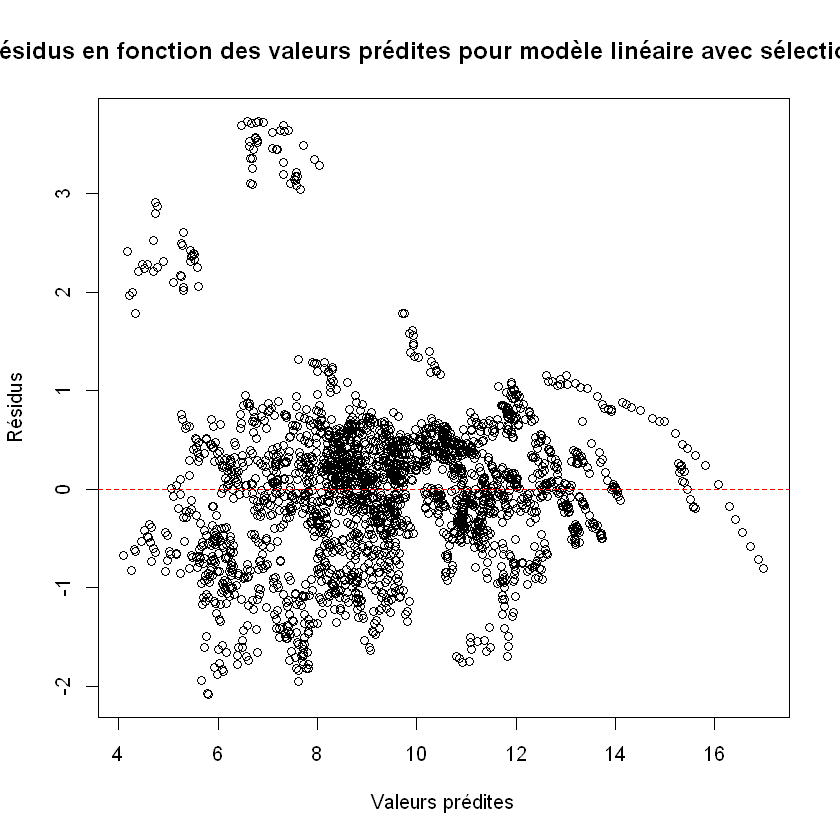

In [30]:
residuals_bic <- resid(bic_model)
fitted.values_bic <- fitted(bic_model)

# Créer un data frame pour le nuage de points
residuals_df <- data.frame(Residuals = residuals, Fitted_Values = fitted.values)

# Créer le nuage de points avec ggplot2
plot(fitted.values, residuals,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour modèle linéaire avec sélection de variable (critère BIC)")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés


Les résidus semblent centrés mais de variance non constante. Ainsi, le modèle linéaire ne va pas être optimal car il nécessite le fait que la variance des résidus soit constante. 

### 8.3 Avec sélection de variable : régularisation L1 (LASSO)

In [31]:
head(datappr1)

,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,Low.carbon.electricity....electricity.,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,2004,20.06497,10.90,3.811982,0,0.56,7.995083,5.324137,0.7884574,6.938284,1.4141180,5.358387,4.110874,13.38815,33.93911,67.70995
6,2005,25.39089,12.20,3.551914,0,0.59,8.027506,5.533663,0.8796267,7.346655,11.2297148,5.493190,4.110874,13.38815,33.93911,67.70995
7,2006,30.71869,13.85,3.493169,0,0.64,8.785811,5.721691,0.9162907,7.473637,5.3574033,5.578724,4.110874,13.38815,33.93911,67.70995
8,2007,36.05101,15.30,3.393837,0,0.75,8.941329,5.872906,0.9282193,7.479300,13.8263195,5.888028,4.110874,13.38815,33.93911,67.70995
11,2010,42.70000,20.00,2.781920,0,0.75,8.988172,7.076563,1.2412686,8.869398,14.3624415,6.299513,4.110874,13.38815,33.93911,67.70995
12,2011,43.22202,21.80,2.610805,0,0.60,8.827406,7.270392,1.4422020,9.097284,0.4263548,6.383828,4.110874,13.38815,33.93911,67.70995


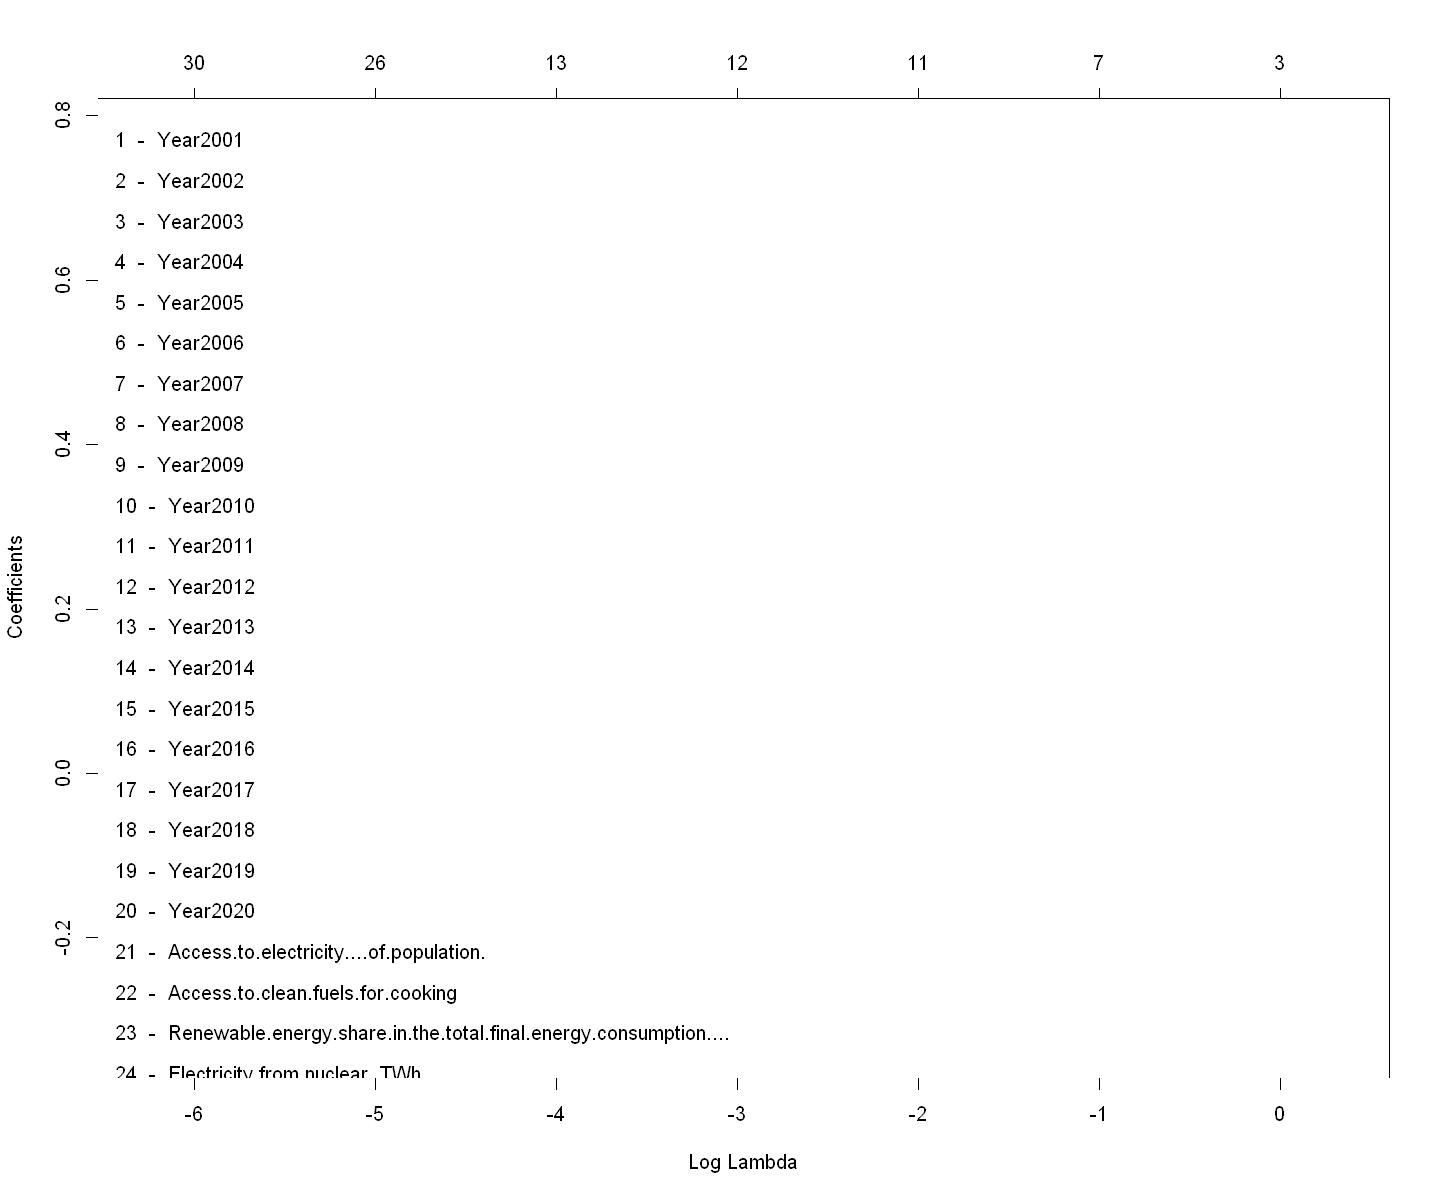

In [32]:


library(glmnet)
# avec des variables quantitatives seulement
#reg.lasso.quanti <- glmnet(y = datappr1$Value_co2_emissions_kt_by_country,
                      #     x = as.matrix(datappr1[, -c(2)]))
# avec toutes les variables, créer d'abord la matrice d'expériences 
# avec 'model.matrix' (penser à retirer l'intercept du modèle)
x.mat <- model.matrix(Value_co2_emissions_kt_by_country ~ . , data = datappr1)[,-1]
reg.lasso <- glmnet(y = datappr1$Value_co2_emissions_kt_by_country, x = x.mat)
options(repr.plot.width = 12, repr.plot.height = 10)
plot(reg.lasso, xvar = "lambda", label = TRUE)
legend("topright", 
       legend = paste(1:ncol(x.mat), " - ", colnames(x.mat)))


In [33]:
y <- datappr1$Value_co2_emissions_kt_by_country
x <- model.matrix(Value_co2_emissions_kt_by_country ~ ., data = datappr1)[,-1]


In [34]:
reg.lasso <- glmnet(x, y, alpha = 1)

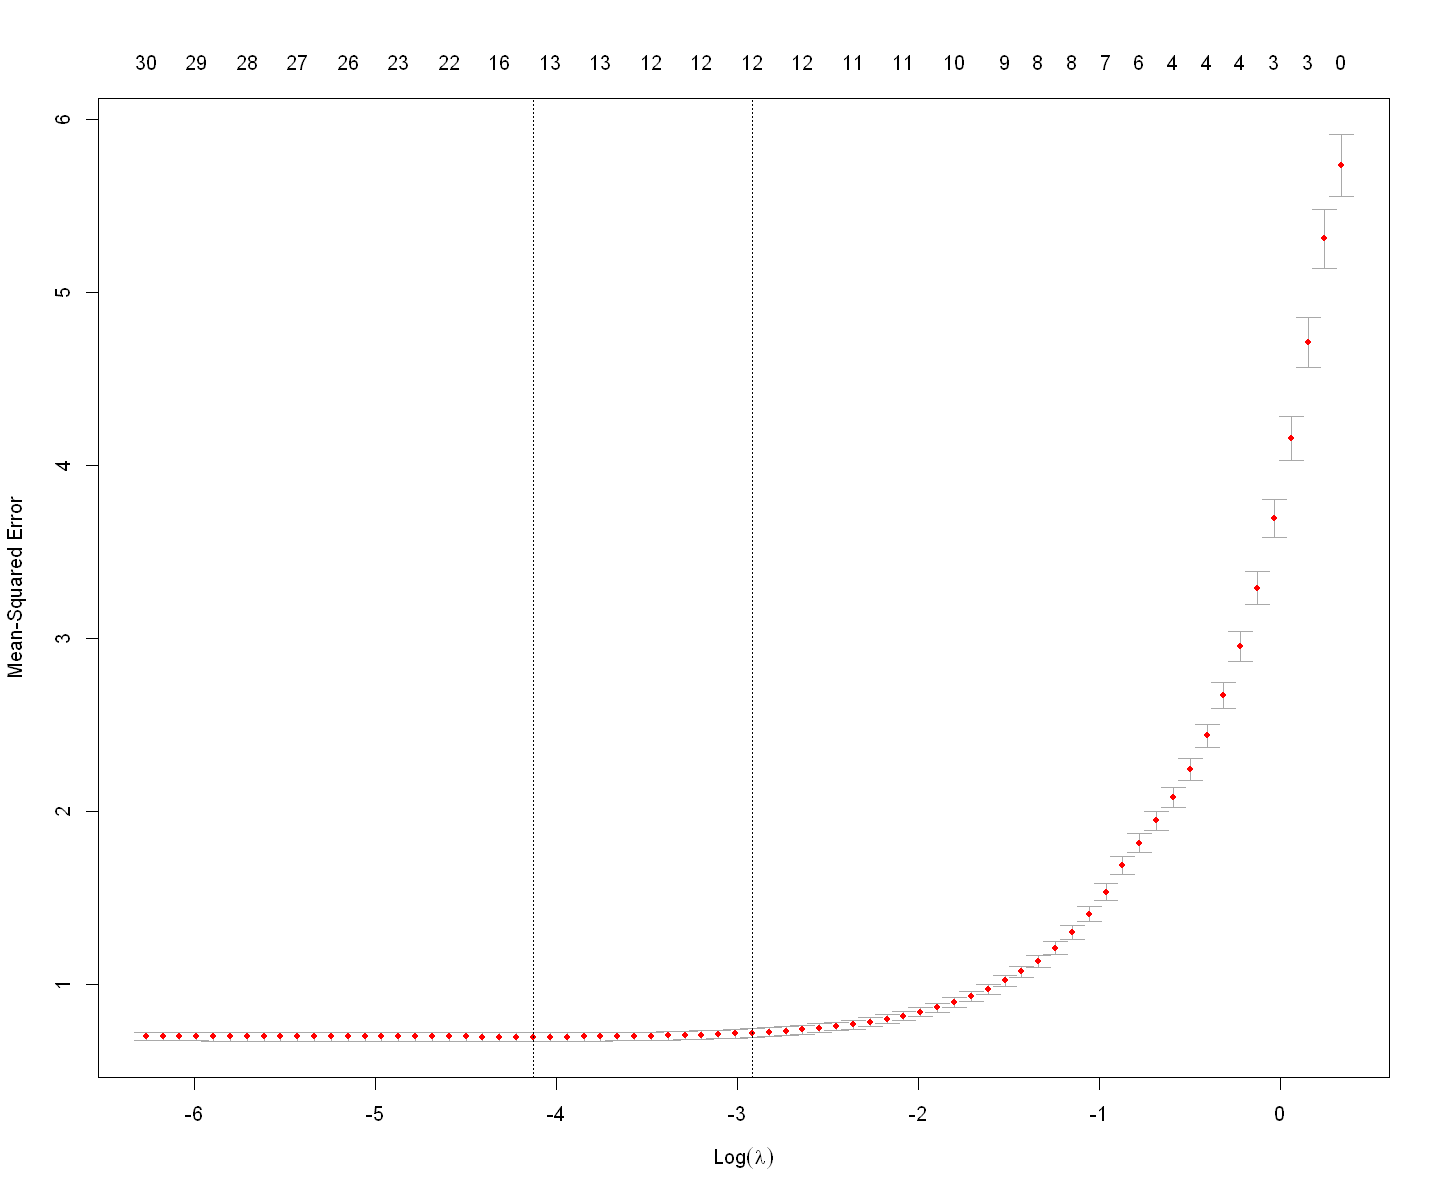

In [35]:

reg.lasso.cv <- cv.glmnet(x, y, alpha = 1)
plot(reg.lasso.cv)


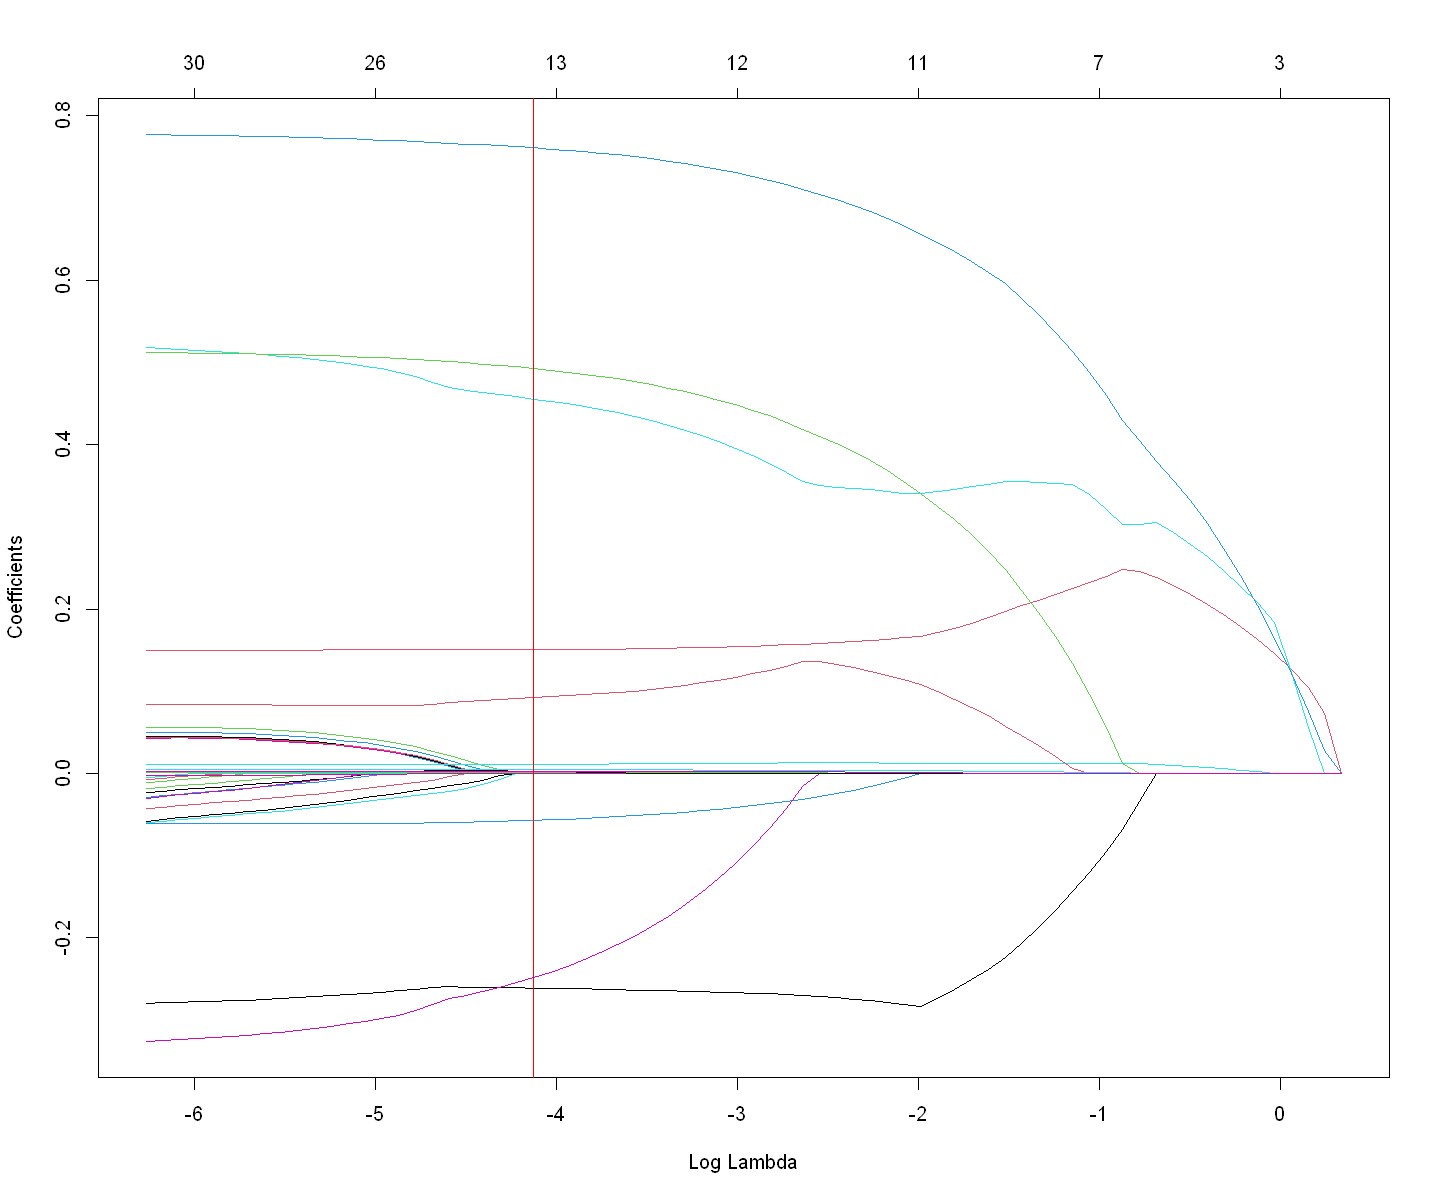

In [36]:
plot(reg.lasso.cv$glmnet.fit, xvar = "lambda")
abline(v = log(reg.lasso.cv$lambda.min), col = "red")


In [37]:
#coefficients_optimal <- coef(reg.lasso.cv, s = "lambda.min")
#print(coefficients_optimal)




# valeur estimée
paste("CV estimate of lambda :", round(reg.lasso.cv$lambda.min, 3))
# modèle correspondant
coef(reg.lasso.cv, s = "lambda.min")


[1] "CV estimate of lambda : 0.016"

35 x 1 sparse Matrix of class "dgCMatrix"
                                                                            s1
(Intercept)                                                      -5.9851266470
Year2001                                                          .           
Year2002                                                          .           
Year2003                                                          .           
Year2004                                                          .           
Year2005                                                          .           
Year2006                                                          .           
Year2007                                                          .           
Year2008                                                          .           
Year2009                                                          .           
Year2010                                                          .           
Year2011  

Avec la pénalisation L1, on voit que les variables les plus importantes dans le modèle sont celles associées aux coefficients 35, 24, 30, 82 et 170. Les autres sont moins importantes.

Traçons les résidus en fonction des valeurs prédites avec LASSO (lambda.min) : 

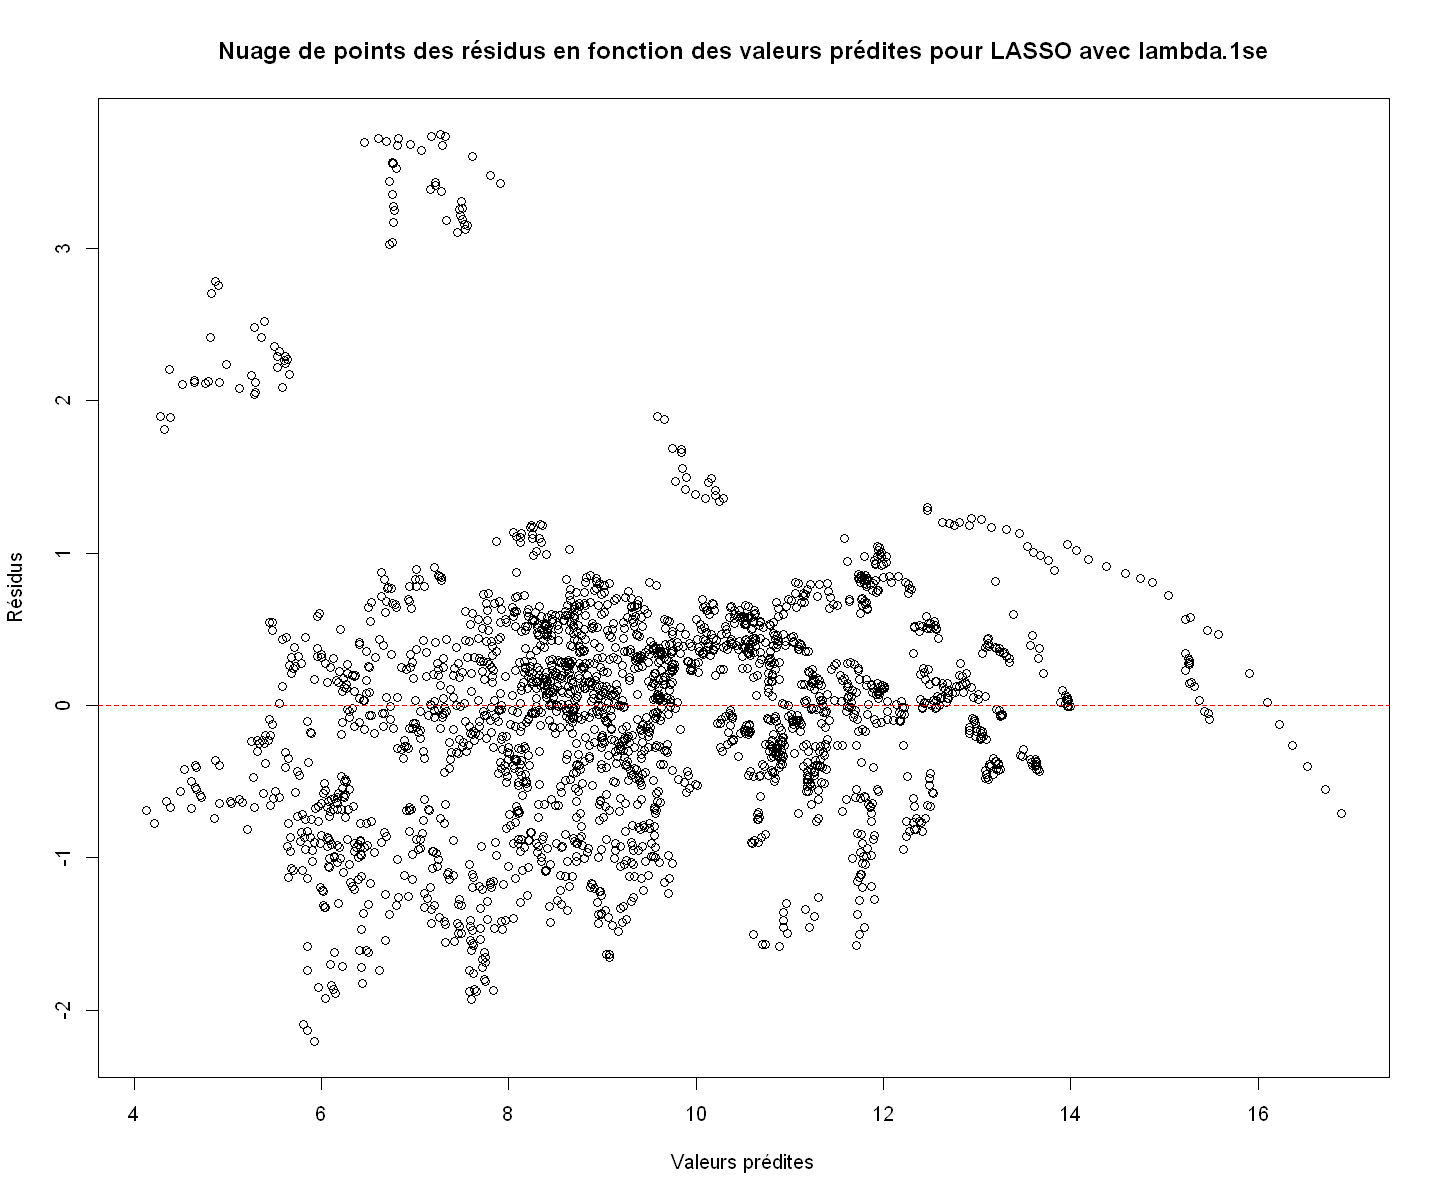

In [38]:
# Prédiction des valeurs ajustées pour le modèle LASSO avec lambda.1se
fitted.values_lasso_min <- predict(reg.lasso.cv, newx = x.mat, s = "lambda.min")

# Calcul des résidus
residuals_lasso_min <- datappr1$Value_co2_emissions_kt_by_country - fitted.values_lasso_min

# Tracer le graphique des résidus en fonction des valeurs prédites
plot(fitted.values_lasso_min, residuals_lasso_min,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour LASSO avec lambda.1se")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés


Les résidus semblent centrés mais de variance non constante. Ainsi, le modèle linéaire ne va pas être optimal car il nécessite le fait que la variance des résidus soit constante. 

### 8.4 Comparaison des différentes méthodes

Afin de comparer ces différentes méthodes, nous allons tracer les résidus en fonction des valeurs à prédire :

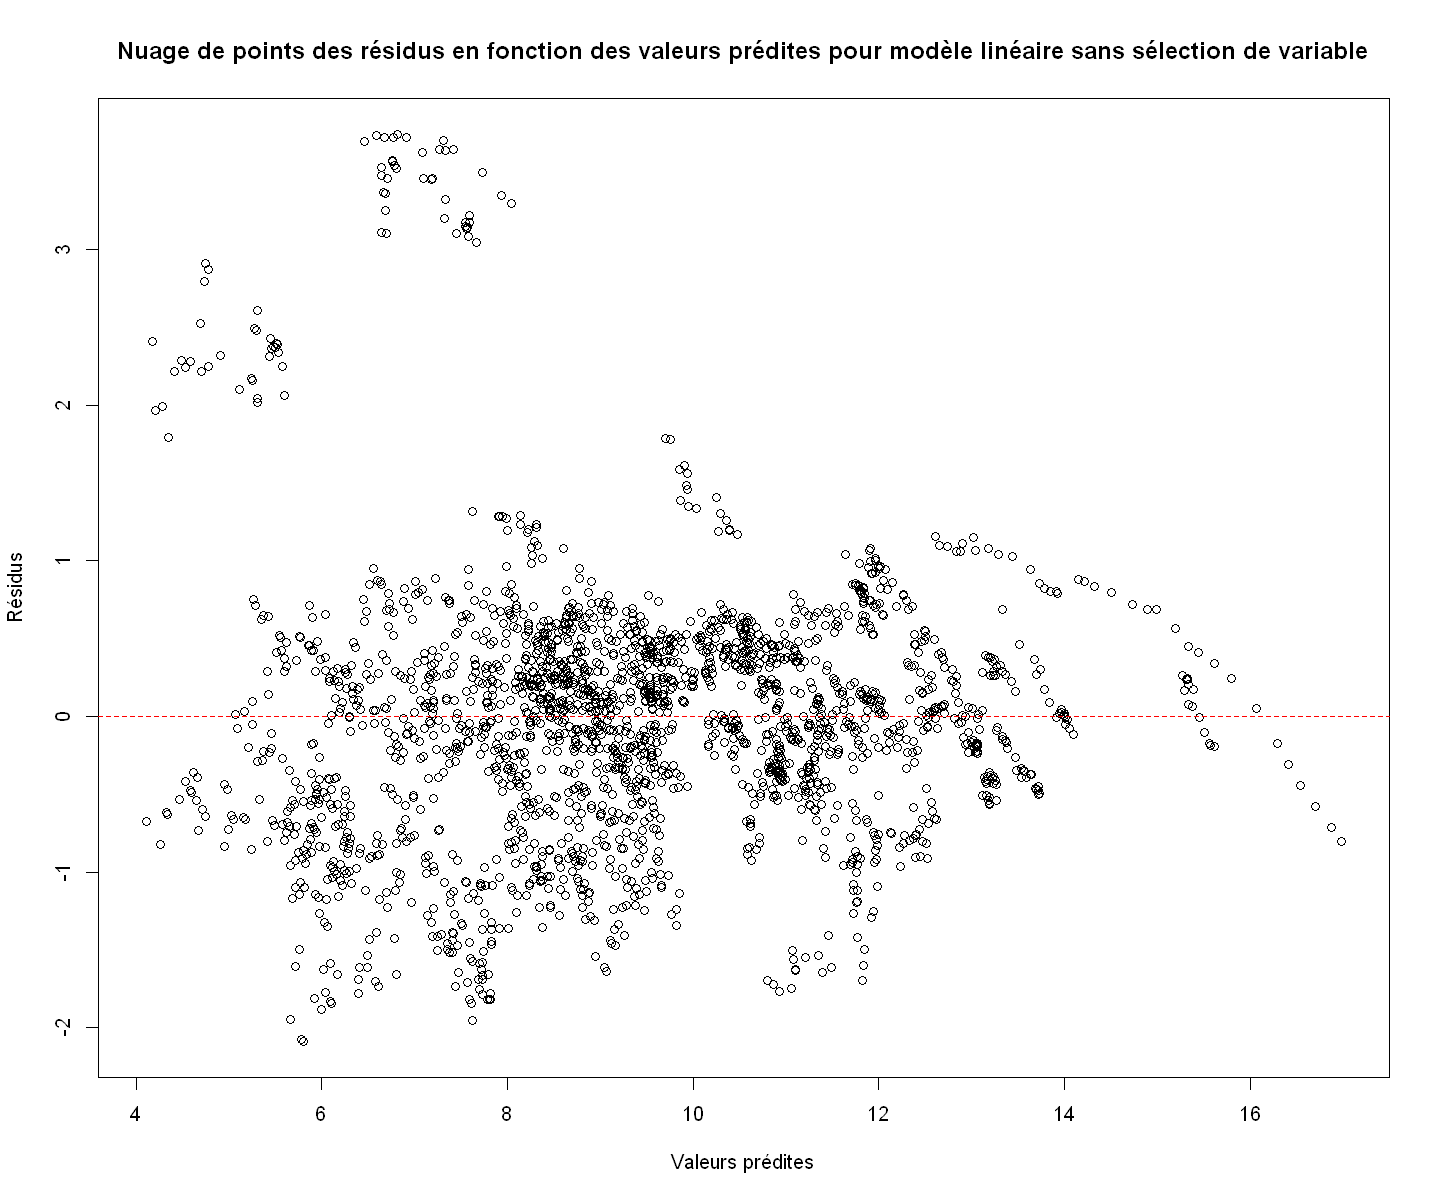

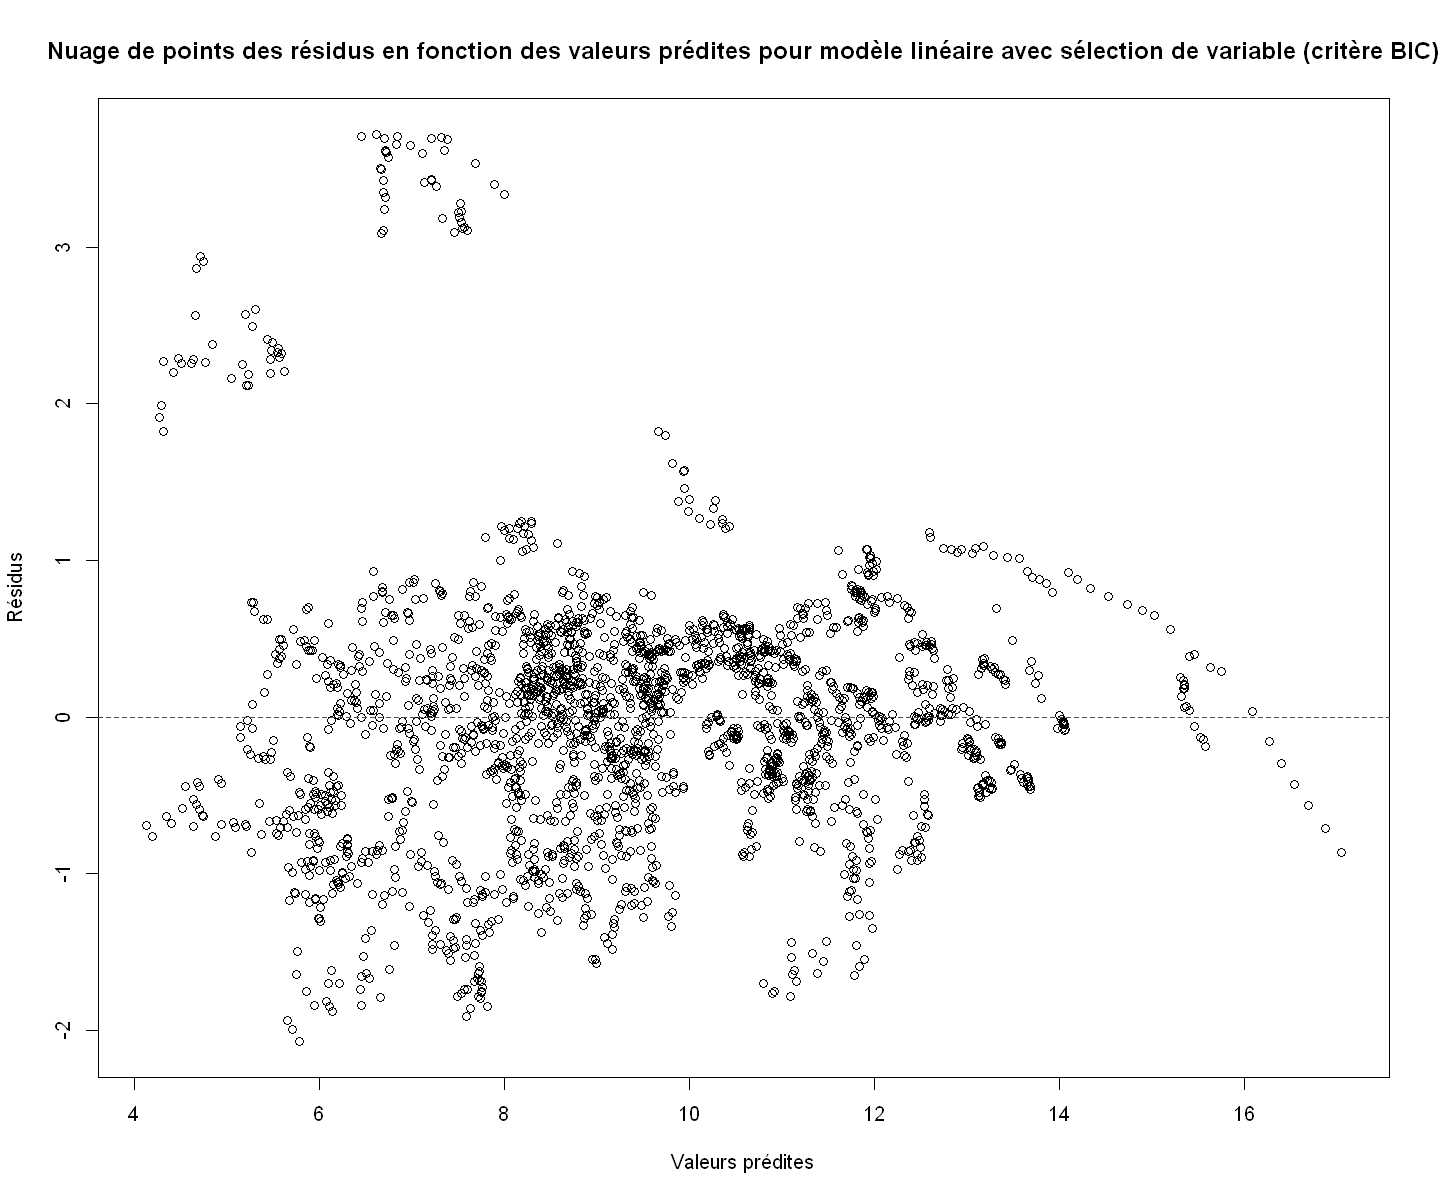

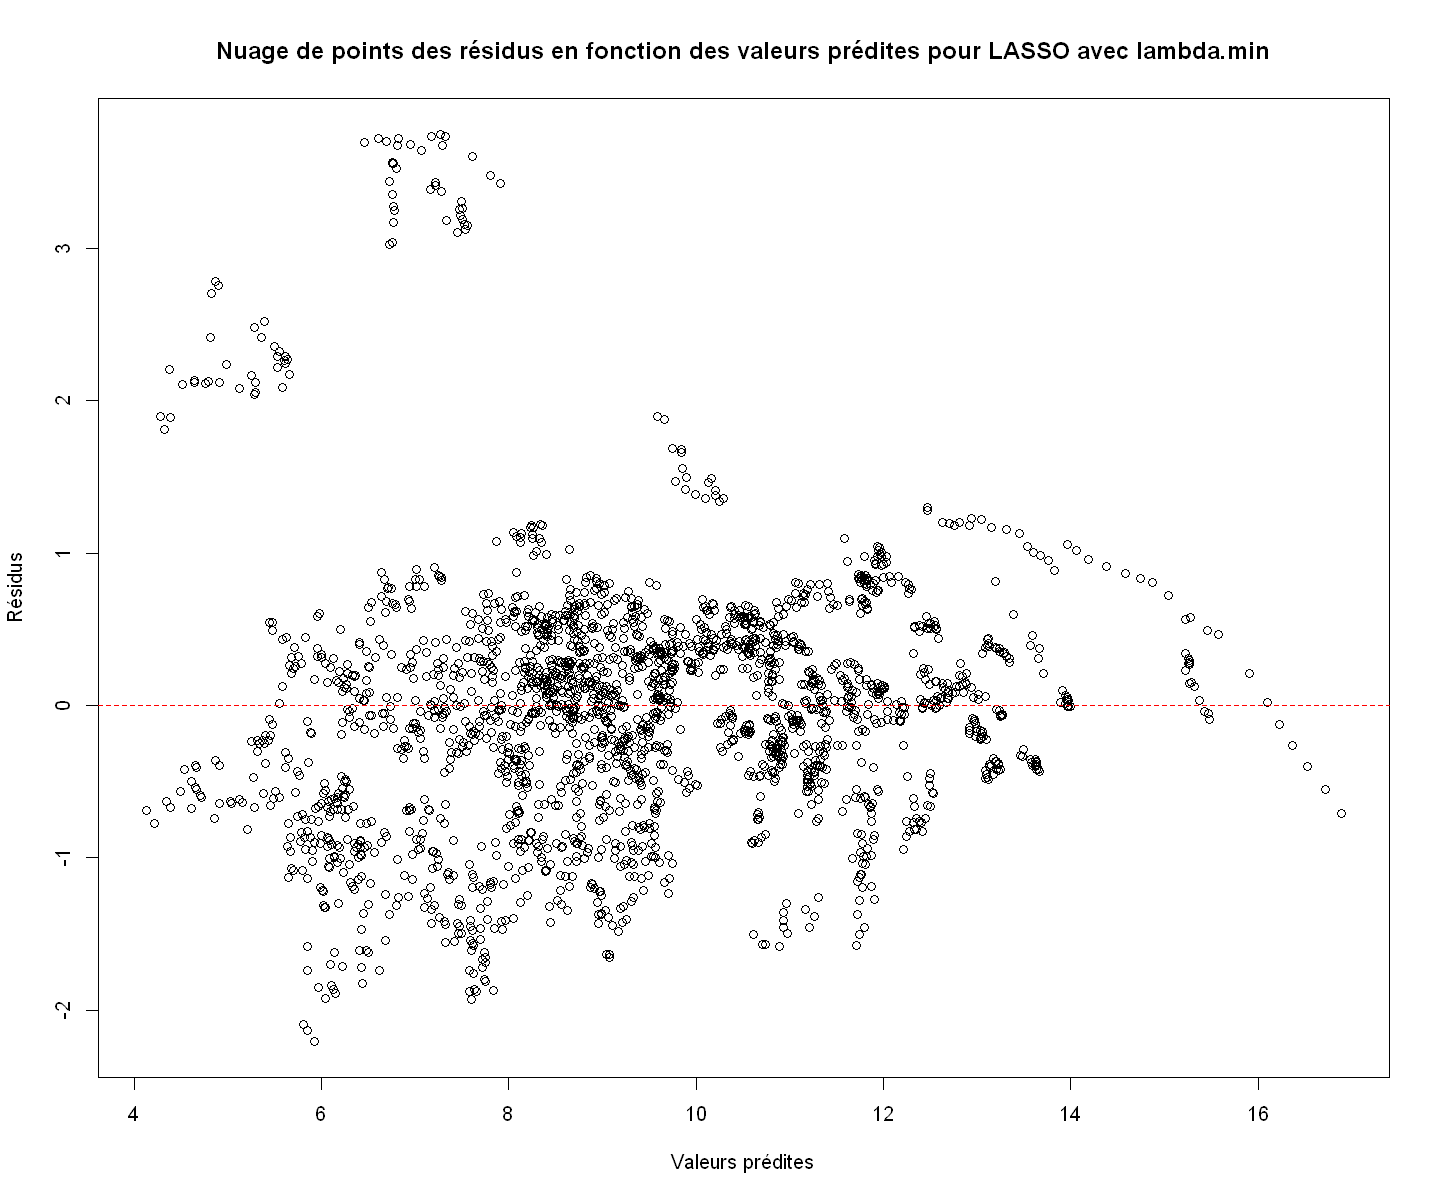

In [39]:
plot(fitted.values, residuals,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour modèle linéaire sans sélection de variable")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés


plot(fitted.values_bic, residuals_bic,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour modèle linéaire avec sélection de variable (critère BIC)")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés

plot(fitted.values_lasso_min, residuals_lasso_min,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour LASSO avec lambda.min")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés


Finalement, on remarque que les méthodes sont sensiblement les mêmes puisque le graphe des résidus en fonction des valeurs prédites est globalement le même pour chaque méthode.

Calculons le critère MSE (mean squared errors) pour chaque modèle : 

In [40]:
res_ancova <- resid(ancova_model)

# Calculer la moyenne des carrés des résidus
mse_ancova <- mean(res_ancova^2)

# Afficher la moyenne des carrés des résidus pour le modèle initial
paste("Modèle linéaire sans sélection de variables (ANCOVA) :", mse_ancova)

res_bic <- resid(bic_model)

# Calculer la moyenne des carrés des résidus
mse_bic <- mean(res_bic^2)
mse_lasso = mean(residuals_lasso_min^2)
# Afficher la moyenne des carrés des résidus pour le modèle sélectionné avec BIC
paste("Modèle linéaire avec sélection de variables BIC:", mse_bic)

paste("LASSO avec lambda.min:",mse_lasso)


[1] "Modèle linéaire sans sélection de variables (ANCOVA) : 0.676680548883994"

[1] "Modèle linéaire avec sélection de variables BIC: 0.678776170733119"

[1] "LASSO avec lambda.min: 0.683940882357792"

Nous remarquons que la sélection de variable augmente le MSE (sur le datatrain) ce qui est normal car on veut éviter le surapprentissage.

Maintenant, estimons l'erreur du modèle linéaire simple par validation croisée :

In [41]:
V=10 ; nV=floor(nrow(datappr1)/V)
S=sample(1:nrow(datappr1),replace=FALSE)
error.CV = c()
for(v in 1:V)
{ # Rq : les deux dernières obs sont tjs dans l'échantillon d'apprentissage...
    datappr.learn=datappr1[-c(S[(nV*(v-1)):(nV*v)]),] 
    datappr.valid=datappr1[c(S[(nV*(v-1)):(nV*v)]),]
    error.CV=c(error.CV,mean((datappr.valid$Value_co2_emissions_kt_by_country-predict(aov(Value_co2_emissions_kt_by_country ~ ., data=datappr.learn),newdata=datappr.valid))^2))
}
mean(error.CV)



[1] 0.6981672

Pour le modèle linéaire avec sélection de variable (critère BIC) : 

In [42]:
V <- 10
nV <- floor(nrow(datappr1) / V)
S <- sample(1:nrow(datappr1), replace = FALSE)
error.CV <- c()

for (v in 1:V) {
  datappr.learn <- datappr1[-c(S[(nV * (v - 1)):(nV * v)]), ]
  datappr.valid <- datappr1[c(S[(nV * (v - 1)):(nV * v)]), ]
  
  # Effectuer une sélection de variables en utilisant le critère BIC sur l'échantillon d'apprentissage
  bic_model <- step(lm(Value_co2_emissions_kt_by_country ~ ., data = datappr.learn), direction = "both", k = log(nrow(datappr.learn)))
  
  # Prédire les valeurs pour l'échantillon de validation avec le modèle sélectionné avec BIC
  pred_valid <- predict(bic_model, newdata = datappr.valid)
  
  # Calculer l'erreur quadratique moyenne pour cet échantillon de validation
  error.CV <- c(error.CV, mean((datappr.valid$Value_co2_emissions_kt_by_country - pred_valid)^2))
}

# Calculer la moyenne des erreurs quadratiques moyennes sur tous les échantillons de validation
mean_error.CV <- mean(error.CV)

# Afficher la moyenne des erreurs quadratiques moyennes pour la validation croisée avec BIC
mean_error.CV


Start:  AIC=-464.9
Value_co2_emissions_kt_by_country ~ Year + Access.to.electricity....of.population. + 
    Access.to.clean.fuels.for.cooking + Renewable.energy.share.in.the.total.final.energy.consumption.... + 
    Electricity.from.nuclear..TWh. + Electricity.from.renewables..TWh. + 
    Low.carbon.electricity....electricity. + Primary.energy.consumption.per.capita..kWh.person. + 
    Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. + 
    gdp_growth + gdp_per_capita + Density.n.P.Km2. + Land.Area.Km2. + 
    Latitude + Longitude

                                                                   Df Sum of Sq
- Year                                                             19       5.6
- gdp_growth                                                        1       1.4
- gdp_per_capita                                                    1       3.5
<none>                                                                         
- Access.to.clean.fuels.for.cooking               

[1] 0.6972865

Pour le modèle avec sélection de variable (Lasso) :

In [43]:
print(reg.lasso.cv)


Call:  cv.glmnet(x = x, y = y, alpha = 1) 

Measure: Mean-Squared Error 

     Lambda Index Measure      SE Nonzero
min 0.01611    49  0.6961 0.02430      13
1se 0.05401    36  0.7189 0.02452      12


On remarque que le BIC est meilleur que le modèle linéaire sans sélection sur l'erreur de généralisation car on a pénalisé la complexité du modèle avec BIC.

### 8.4 Prévision de l'échantillon test

Nous allons prédire l'échantillon test avec les modèles précèdents. Nous allons utilisés deux erreurs, l'erreur quadratique de régression et la matrice de confusion pour le dépassement de seuil.

In [44]:
moyenne_co2 <- mean(datappr$Value_co2_emissions_kt_by_country)
moyenne_co2

[1] 9.330182

Pour le modèle linéaire sans sélection de variable : 

In [45]:
pred.glm_sans_selection <- predict(ancova_model, newdata = datestr1)
# Erreur quadratique moyenne de prévision (MSE)
mse_lin = sum((pred.glm_sans_selection - datestr1[, "Value_co2_emissions_kt_by_country"])^2) / nrow(datestr1)
mse_lin

[1] 0.8759495

In [46]:
table(pred.glm_sans_selection>moyenne_co2,datestr1[,"Value_co2_emissions_kt_by_country"]>moyenne_co2)

       
        FALSE TRUE
  FALSE   259   33
  TRUE     24  258

Pour le modèle linéaire avec sélection de variable (critère BIC) : 

In [47]:
pred.glm_avec_selection <- predict(bic_model, newdata = datestr1)
# Erreur quadratique moyenne de prévision (MSE)
mse_bic = sum((pred.glm_avec_selection - datestr1[, "Value_co2_emissions_kt_by_country"])^2) / nrow(datestr1)
mse_bic

[1] 0.8610604

In [48]:
table(pred.glm_avec_selection>moyenne_co2,datestr1[,"Value_co2_emissions_kt_by_country"]>moyenne_co2)

       
        FALSE TRUE
  FALSE   259   32
  TRUE     24  259

Pour le modèle linéaire avec LASSO (lambda.min) : 

In [49]:
x.mat <- model.matrix(Value_co2_emissions_kt_by_country ~ . - 1, data = datestr1)[,-1]
pred.glm_lasso_min <- predict(reg.lasso.cv, newx = x.mat, s = "lambda.min")
mse_lasso = sum((pred.glm_lasso_min - datestr1[, "Value_co2_emissions_kt_by_country"])^2) / nrow(datestr1)
mse_lasso

[1] 0.8637379

In [50]:
table(pred.glm_lasso_min>moyenne_co2,datestr1[,"Value_co2_emissions_kt_by_country"]>moyenne_co2)

       
        FALSE TRUE
  FALSE   260   32
  TRUE     23  259

D'après les MSE et les matrices de confusion, on constate que le modèle linéaire avec LASSO est le plus performant, ensuite on a le modèle linéaire avec BIC et le modèle linéaire sans sélection.

On peut regarder maintenant la courbe ROC : 

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Warning message in roc.default(actual_binary, pred.glm_lasso_min):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases



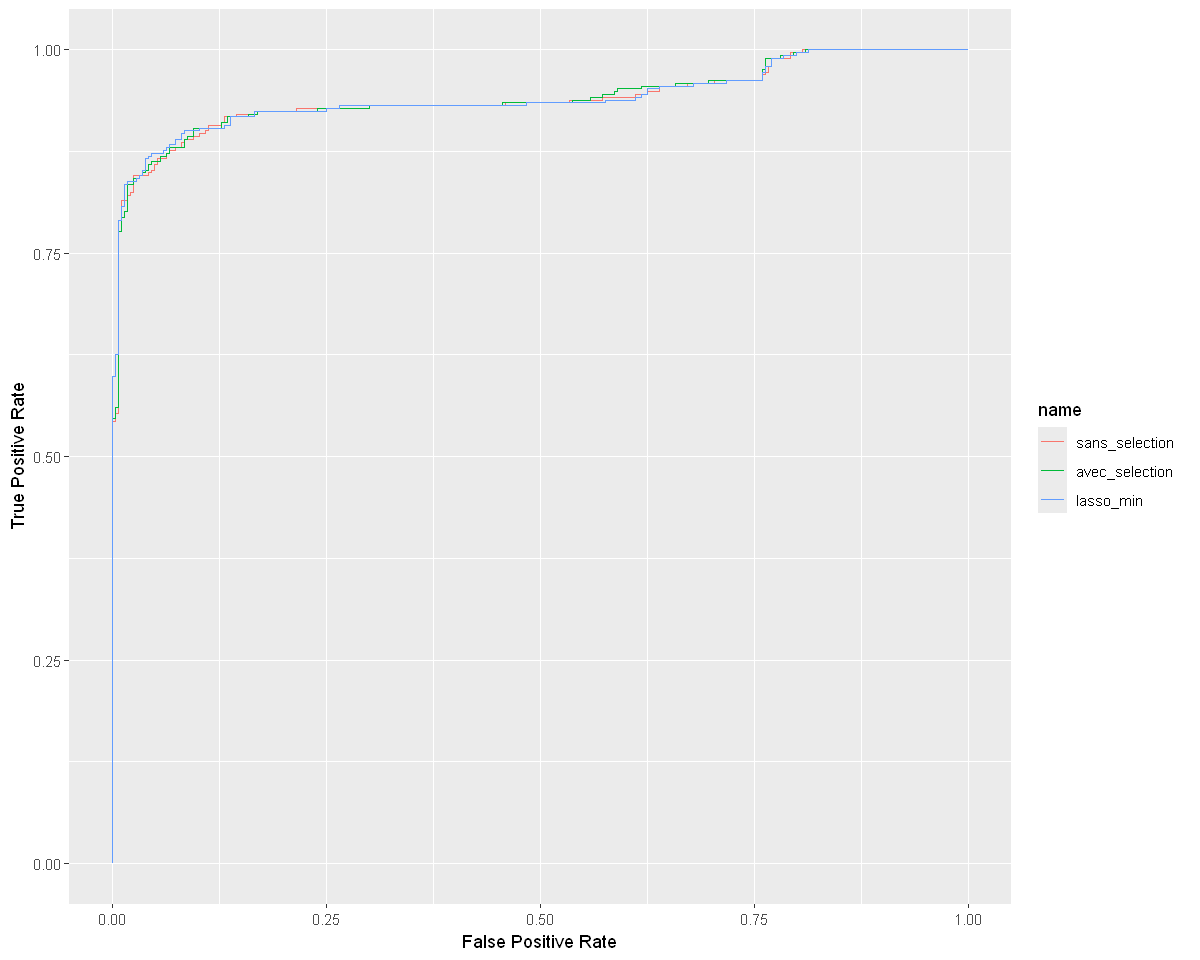

In [51]:
library(pROC)

# Supposons que pred.glm_sans_selection, pred.glm_avec_selection, pred.glm_lasso_min et pred.glm_lasso_1se
# sont les sorties de vos modèles de régression logistique.
# datestr1["Value_co2_emissions_kt_by_country"] est la variable que vous prédisez.

# Définir les prédictions binaires en fonction de la valeur moyenne du CO2
pred_binary_sans <- as.numeric(pred.glm_sans_selection > moyenne_co2)
pred_binary_avec <- as.numeric(pred.glm_avec_selection > moyenne_co2)
pred_binary_lasso_min <- as.numeric(pred.glm_lasso_min > moyenne_co2)

actual_binary <- as.numeric(datestr1[,"Value_co2_emissions_kt_by_country"] > moyenne_co2)

# Créer la courbe ROC pour chaque modèle en utilisant les prédictions binaires
rocobj <- list()
rocobj$sans_selection <- roc(actual_binary, pred.glm_sans_selection)
rocobj$avec_selection <- roc(actual_binary, pred.glm_avec_selection)
rocobj$lasso_min <- roc(actual_binary, pred.glm_lasso_min)


# Tracer la courbe ROC
options(repr.plot.width = 10, repr.plot.height = 8)
ggroc(rocobj, legacy.axes = TRUE) +
  xlab("False Positive Rate") +
  ylab("True Positive Rate")



On remarque que la méthode LASSO est legèrement meilleure que le modèle linéaire sans sélection et avec sélection BIC.

## 9. Prévision par SVM

La Machine à Vecteurs de Support (SVM) est un modèle d'apprentissage supervisé utilisé pour la classification et la régression. Elle cherche à trouver un hyperplan dans un espace de données de grande dimension qui sépare les exemples de différentes classes de manière optimale. La SVM maximise les marges entre les exemples de différentes classes et utilise les vecteurs de support comme points clés pour la classification. Elle peut être étendue pour traiter des données non linéaires en utilisant des noyaux comme nous allons le faire par la suite.

In [52]:
library(e1071)

On détermine quel noyau utiliser entre "linear", "radial" et "polynomial".

In [53]:
# Define a vector of kernels to test
kernels <- c("linear", "radial", "polynomial")

# Initialize variables to store results
best_kernel <- NULL
best_accuracy <- 0

# Loop through each kernel
for (kernel in kernels) {
  # Train SVM model with current kernel
  svm_model <- svm(Value_co2_emissions_kt_by_country ~ ., data = datappr1, kernel = kernel)
 
  # Perform cross-validation
  accuracy <- crossprod(predict(svm_model, datappr1), datappr1$Value_co2_emissions_kt_by_country)
 
  # Check if current kernel is better than previous ones
  if (accuracy > best_accuracy) {
	best_accuracy <- accuracy
	best_kernel <- kernel
  }
}

# Print best kernel and its accuracy
cat("Best kernel:", best_kernel, "\n")
cat("Accuracy:", best_accuracy, "\n")

# Train SVM model with the best kernel
best_svm_model <- svm(Value_co2_emissions_kt_by_country ~ ., data = datappr1, kernel = best_kernel)
summary(best_svm_model)


Best kernel: radial 
Accuracy: 212008.1 



Call:
svm(formula = Value_co2_emissions_kt_by_country ~ ., data = datappr1, 
    kernel = best_kernel)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  0.02857143 
    epsilon:  0.1 


Number of Support Vectors:  725






Ainsi, nous allons utiliser le noyau "radial".

Déterminons maintenant les hyperparamètres à savoir "cost" et "gamma" :

Gamma : Contrôle l'influence d'un seul point d'entraînement. Un faible gamma signifie que chaque point d'entraînement a une large portée, ce qui peut conduire à un modèle plus lisse. Un gamma élevé peut faire en sorte que le modèle s'adapte plus aux points individuels, ce qui peut entraîner un surapprentissage.

Cost (ou C) : Détermine la tolérance aux erreurs de classification. Un faible coût (C) autorise davantage de points mal classifiés, ce qui peut produire un modèle plus général. Un coût élevé (C) cherche à minimiser les erreurs de classification, ce qui peut entraîner un surapprentissage.

In [54]:
#svm.reg.tune = tune.svm(Value_co2_emissions_kt_by_country ~ ., data = datappr1, cost = seq(30, 50, by = 0.5),
#gamma = seq(0.01, 0.05, by = 0.02))
#plot(svm.reg.tune)


In [55]:
#svm.reg.tune$best.parameters
svm.reg=svm(Value_co2_emissions_kt_by_country~.,data=datappr1,cost = 42.5, 
    gamma = 0.03)

In [56]:
svm.reg = svm(Value_co2_emissions_kt_by_country ~ ., data = datappr1, cost = 42.5,
	gamma = 0.03)
summary(svm.reg)



Call:
svm(formula = Value_co2_emissions_kt_by_country ~ ., data = datappr1, 
    cost = 42.5, gamma = 0.03)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  42.5 
      gamma:  0.03 
    epsilon:  0.1 


Number of Support Vectors:  574






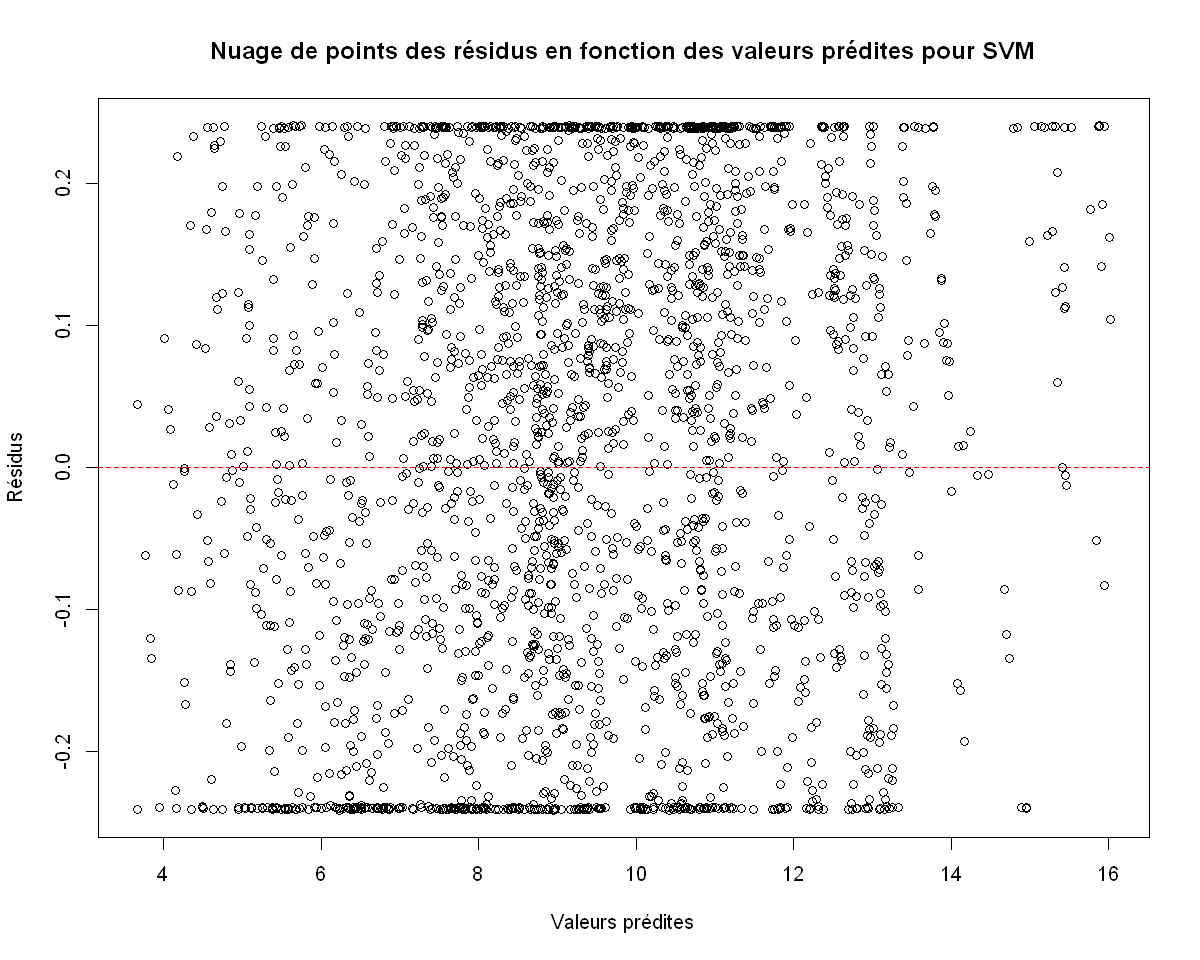

In [57]:
# Prédire les valeurs ajustées pour le modèle SVM
fitted.values_svm <- predict(svm.reg, newdata = datappr1)

# Calculer les résidus
residuals_svm <- datappr1$Value_co2_emissions_kt_by_country - fitted.values_svm

# Tracer le graphique des résidus en fonction des valeurs prédites
plot(fitted.values_svm, residuals_svm,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour SVM")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés


Les résidus sont centrés et de variance constante.

On regarde maintenant le MSE (mean squared error)

In [58]:
pred.svmr=predict(svm.reg,newdata=datestr1)
# Erreur quadratique moyenne de prévision
mse_svm = sum((pred.svmr-datestr1[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr1)
mse_svm

[1] 0.0637175

In [59]:
moyenne_co2 <- mean(datappr1$Value_co2_emissions_kt_by_country)
moyenne_co2

[1] 9.330182

Matrice de confusion :

In [60]:
table(pred.svmr>moyenne_co2,datestr1[,"Value_co2_emissions_kt_by_country"]>moyenne_co2)

       
        FALSE TRUE
  FALSE   278    3
  TRUE      5  288

En observant le MSE et la matrice de confusion, on remarque que la SVM a une très bonne précision.

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



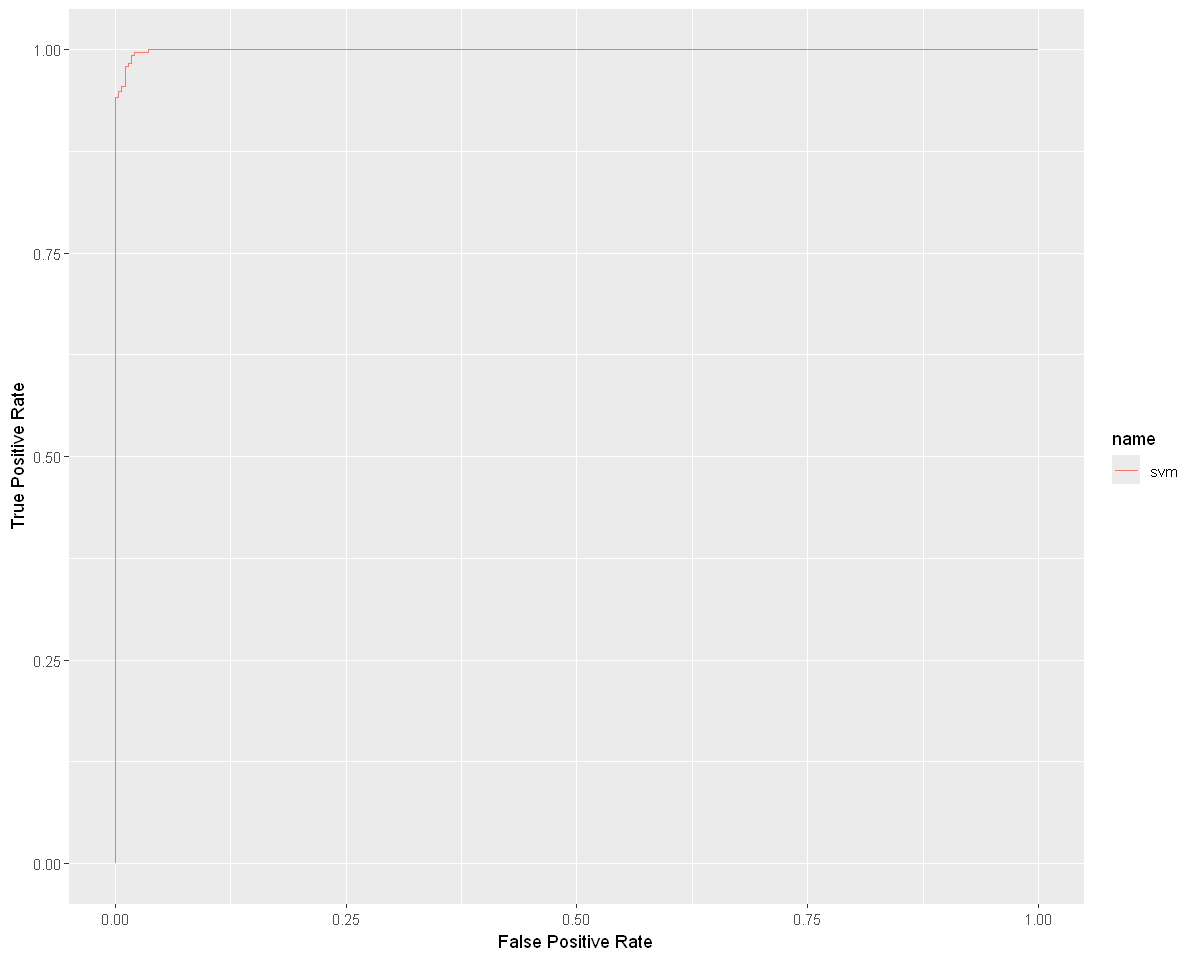

In [61]:
library(pROC)

# Supposons que pred.boostr soit la sortie de votre modèle de prédiction
# datestr["Value_co2_emissions_kt_by_country"] est la variable que vous prédisez

# Définir les prédictions binaires en fonction de la valeur moyenne du CO2
pred_binary <- pred.svmr > moyenne_co2
actual_binary <- datestr[,"Value_co2_emissions_kt_by_country"] > moyenne_co2

# Créer la courbe ROC pour chaque modèle en utilisant les prédictions binaires
rocobj <- list()
rocobj$svm <- roc(actual_binary, pred.svmr)


# Tracer la courbe ROC
options(repr.plot.width = 10, repr.plot.height = 8)
ggroc(rocobj, legacy.axes = TRUE) +
  xlab("False Positive Rate") +
  ylab("True Positive Rate")


On fait la même analyse que précedemment.

## 10. Arbre Binaire

Nous allons maintenant faire de l'arbre binaire.

In [62]:
library(rpart)

On retire la variable Entity et Electricity.from.fossil.fuels..TWh

In [63]:
tree.reg=rpart(Value_co2_emissions_kt_by_country~.,data=datappr1,control=rpart.control(cp=0.001))

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


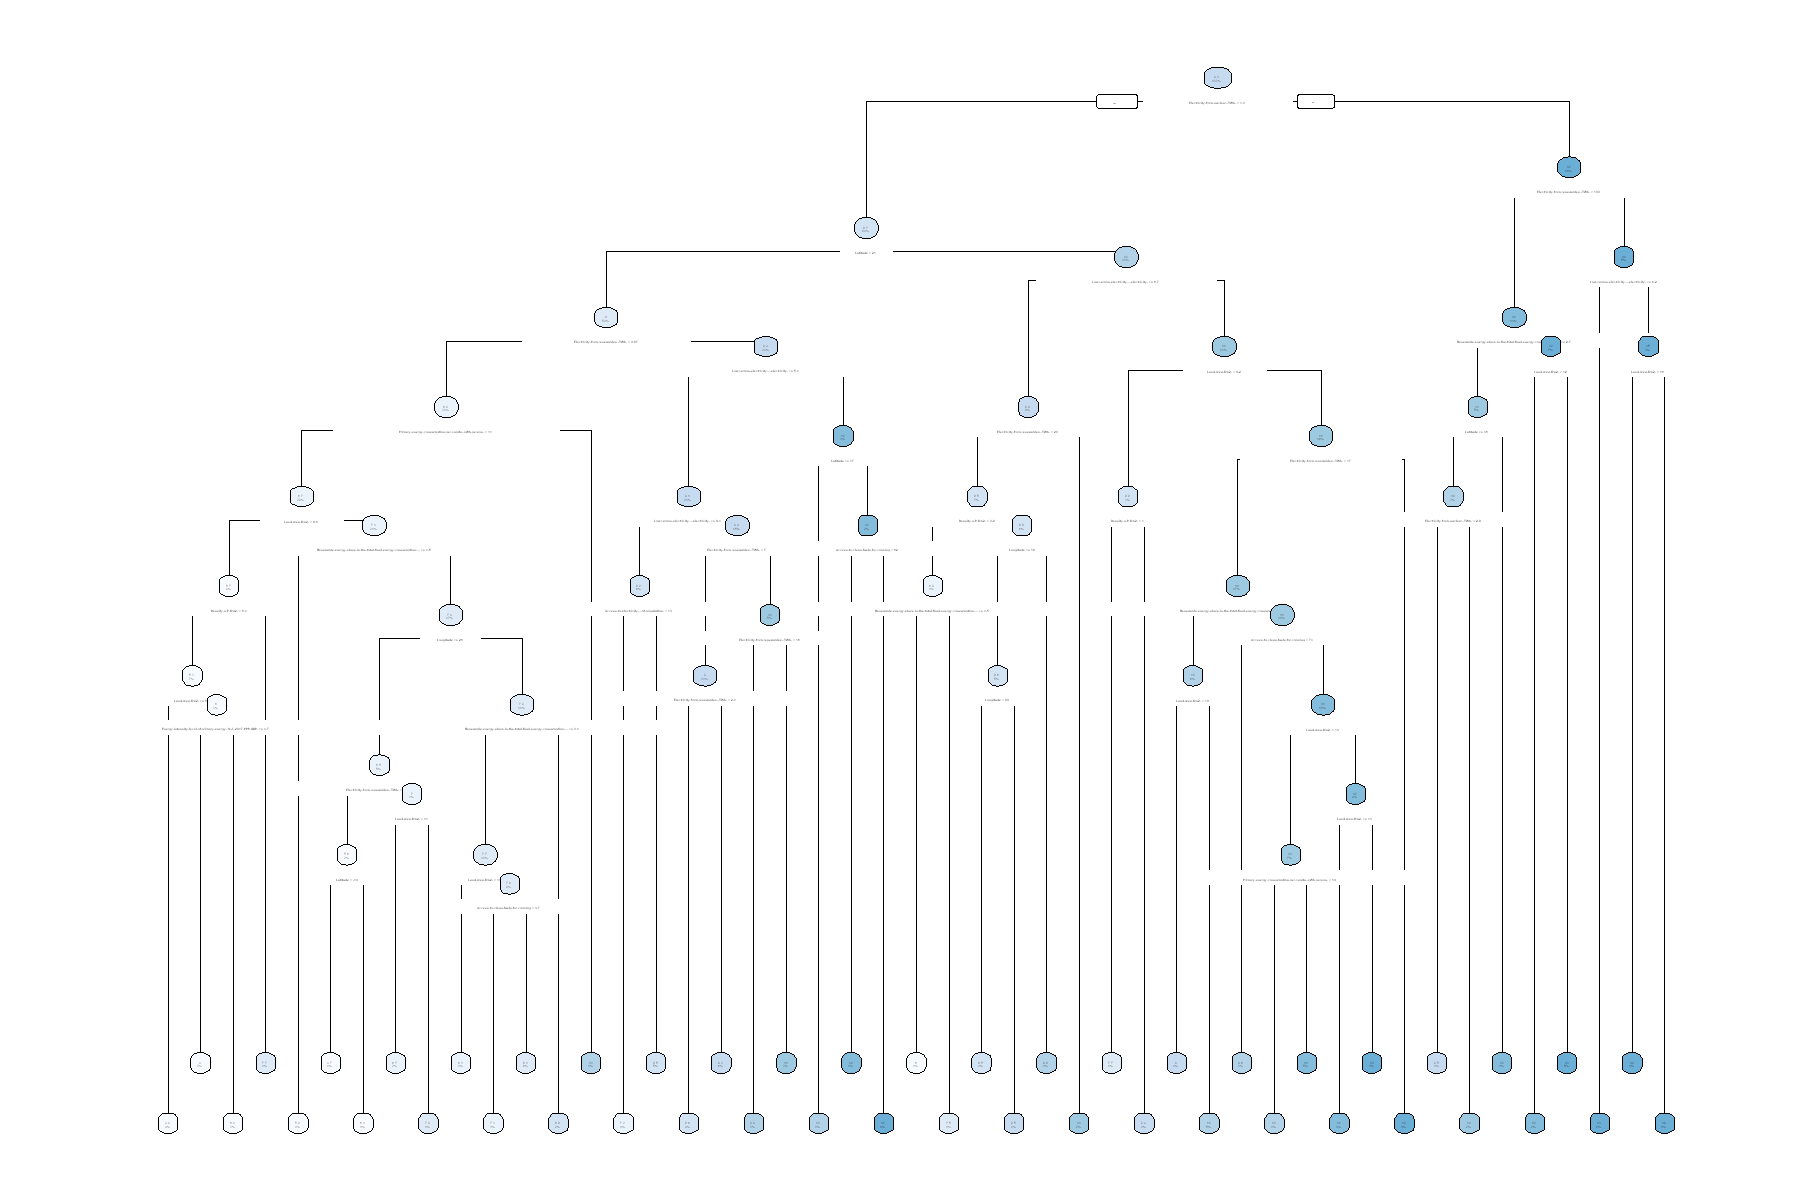

In [64]:
library(rpart.plot)
options(repr.plot.width = 15, repr.plot.height = 10)
rpart.plot(tree.reg)

L'arbre est illisible et présente trop de feuilles pour une bonne prévision (sur-apprentissage), il est nécessaire d'en réduire le nombre par élagage. Les commandes suivantes calculent les prévisions obtenues par validation croisée 10-fold pour chaque arbre élagué suivant les valeurs successives du coefficient de complexité.

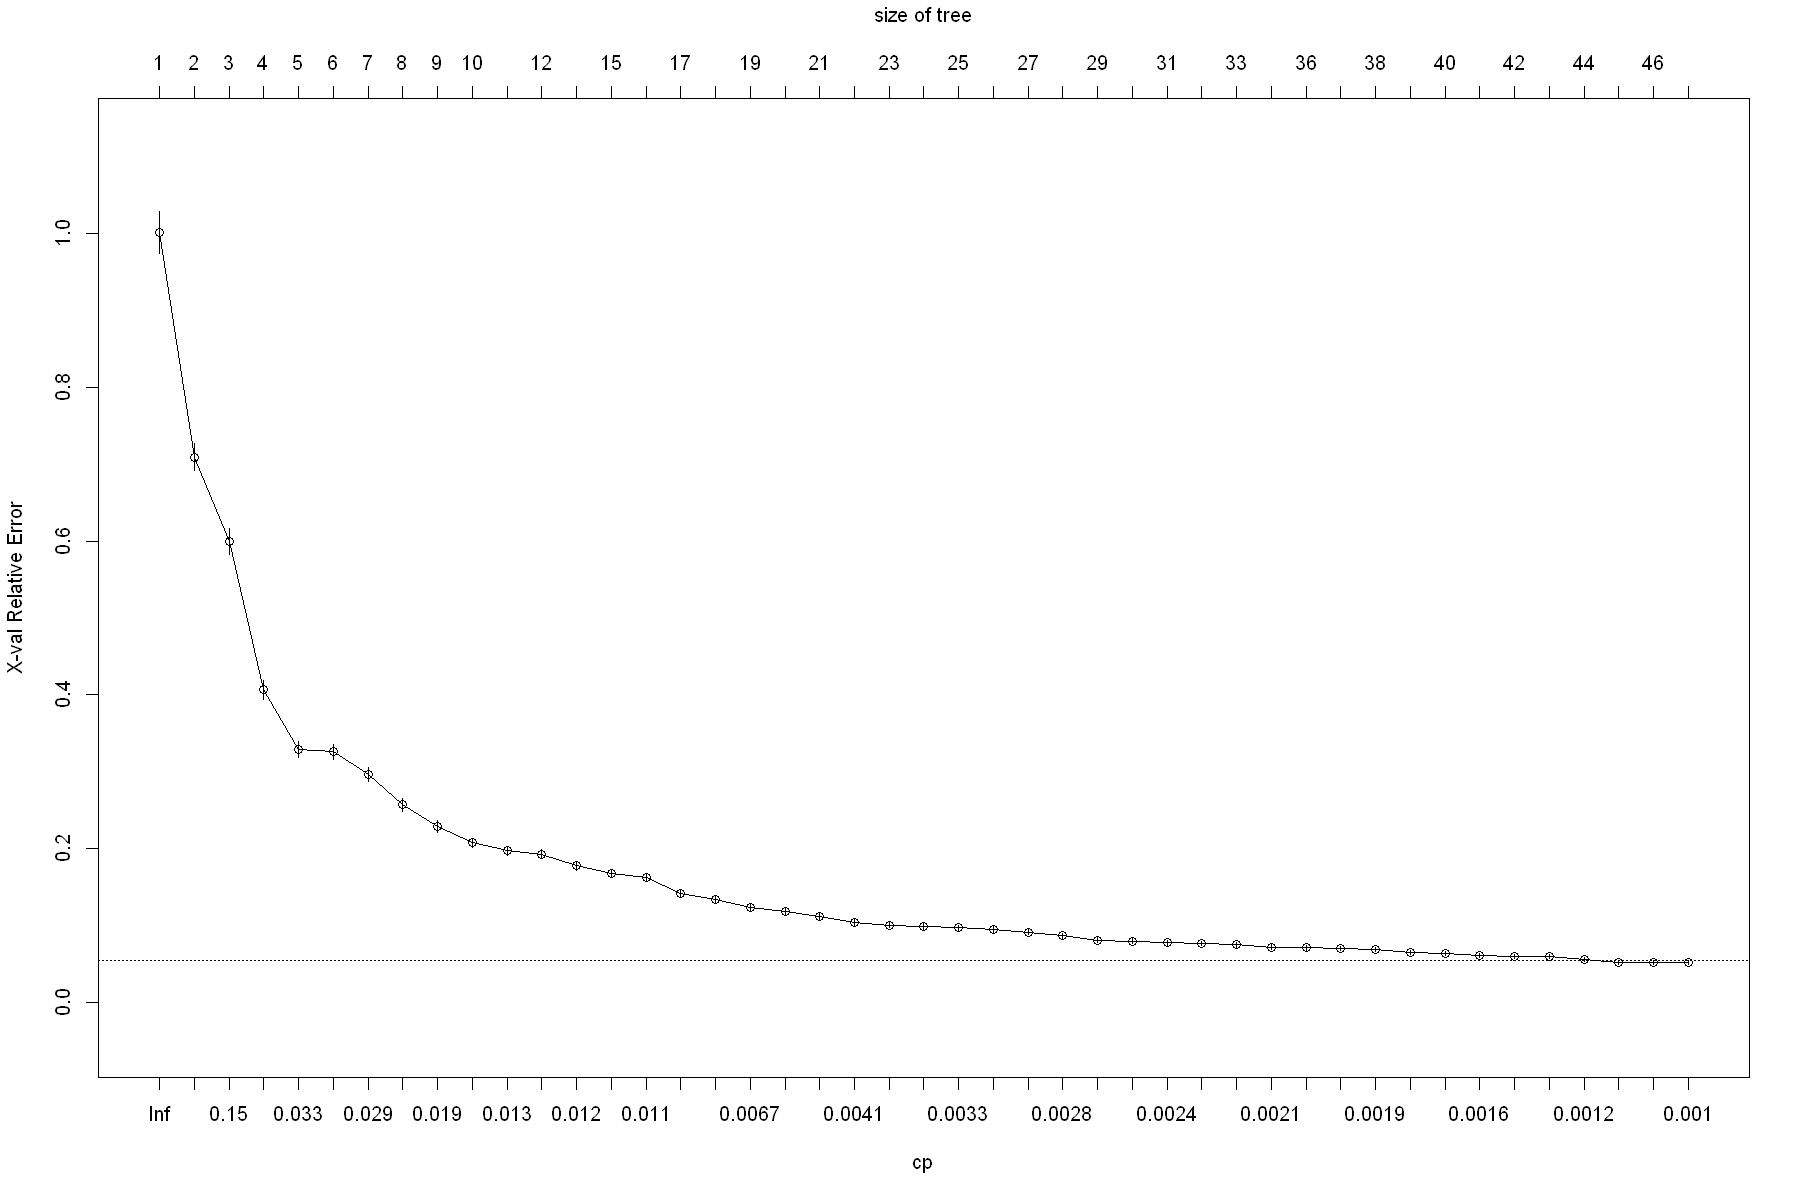

In [65]:

xmat<-xpred.rpart(tree.reg,xval=10) 
# one row for each observation and one column for each complexity value

# Cross-validation error par valeur de CP
CVerr<-apply((xmat-datappr1[,"Value_co2_emissions_kt_by_country"])^2,2,sum)

plotcp(tree.reg)

On prend la valeur de cp qui correspond à la plus petite erreur : 

[1] 0.001005442

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"


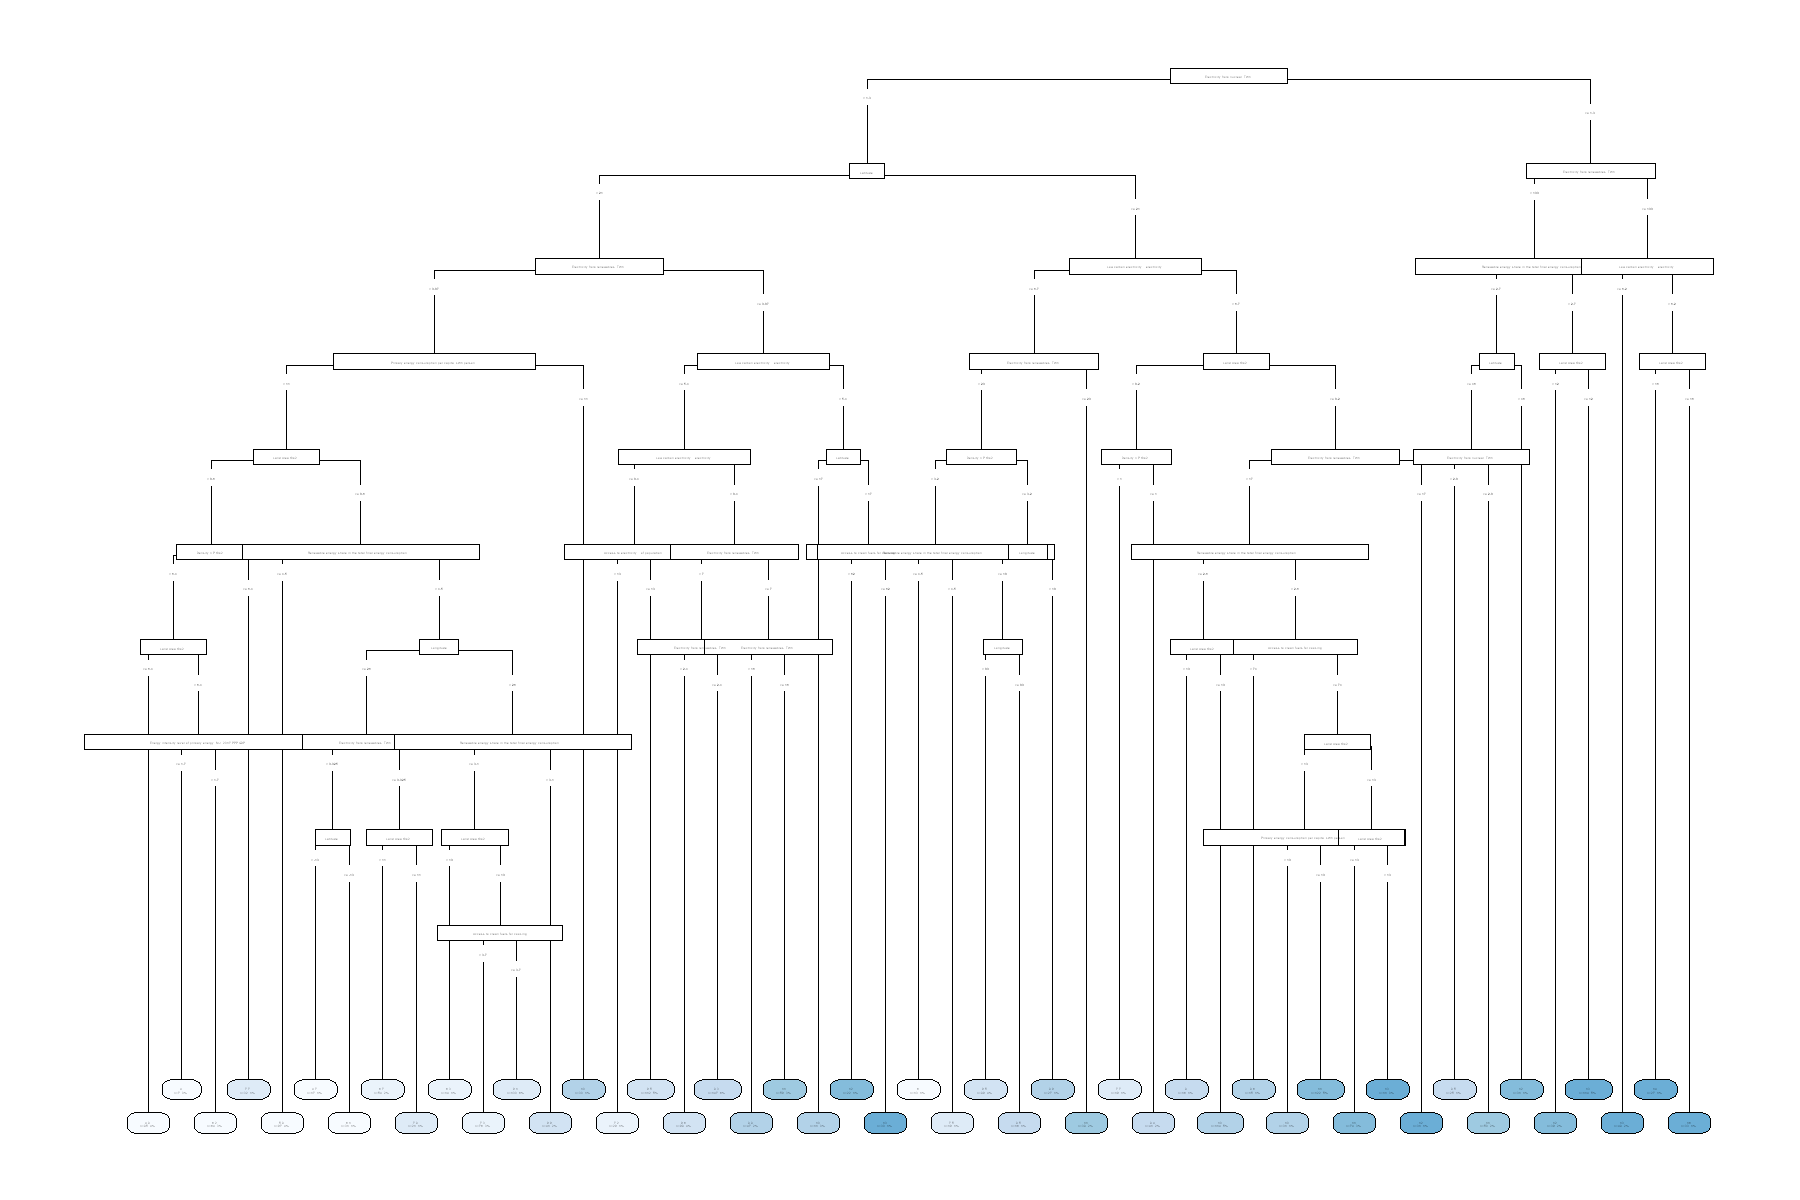

In [66]:
as.numeric(attributes(which.min(CVerr))$names)
tree.reg=rpart(Value_co2_emissions_kt_by_country~.,data=datappr1,control=rpart.control(cp=as.numeric(attributes(which.min(CVerr))$names)))
rpart.plot(tree.reg,type=5,extra=101)

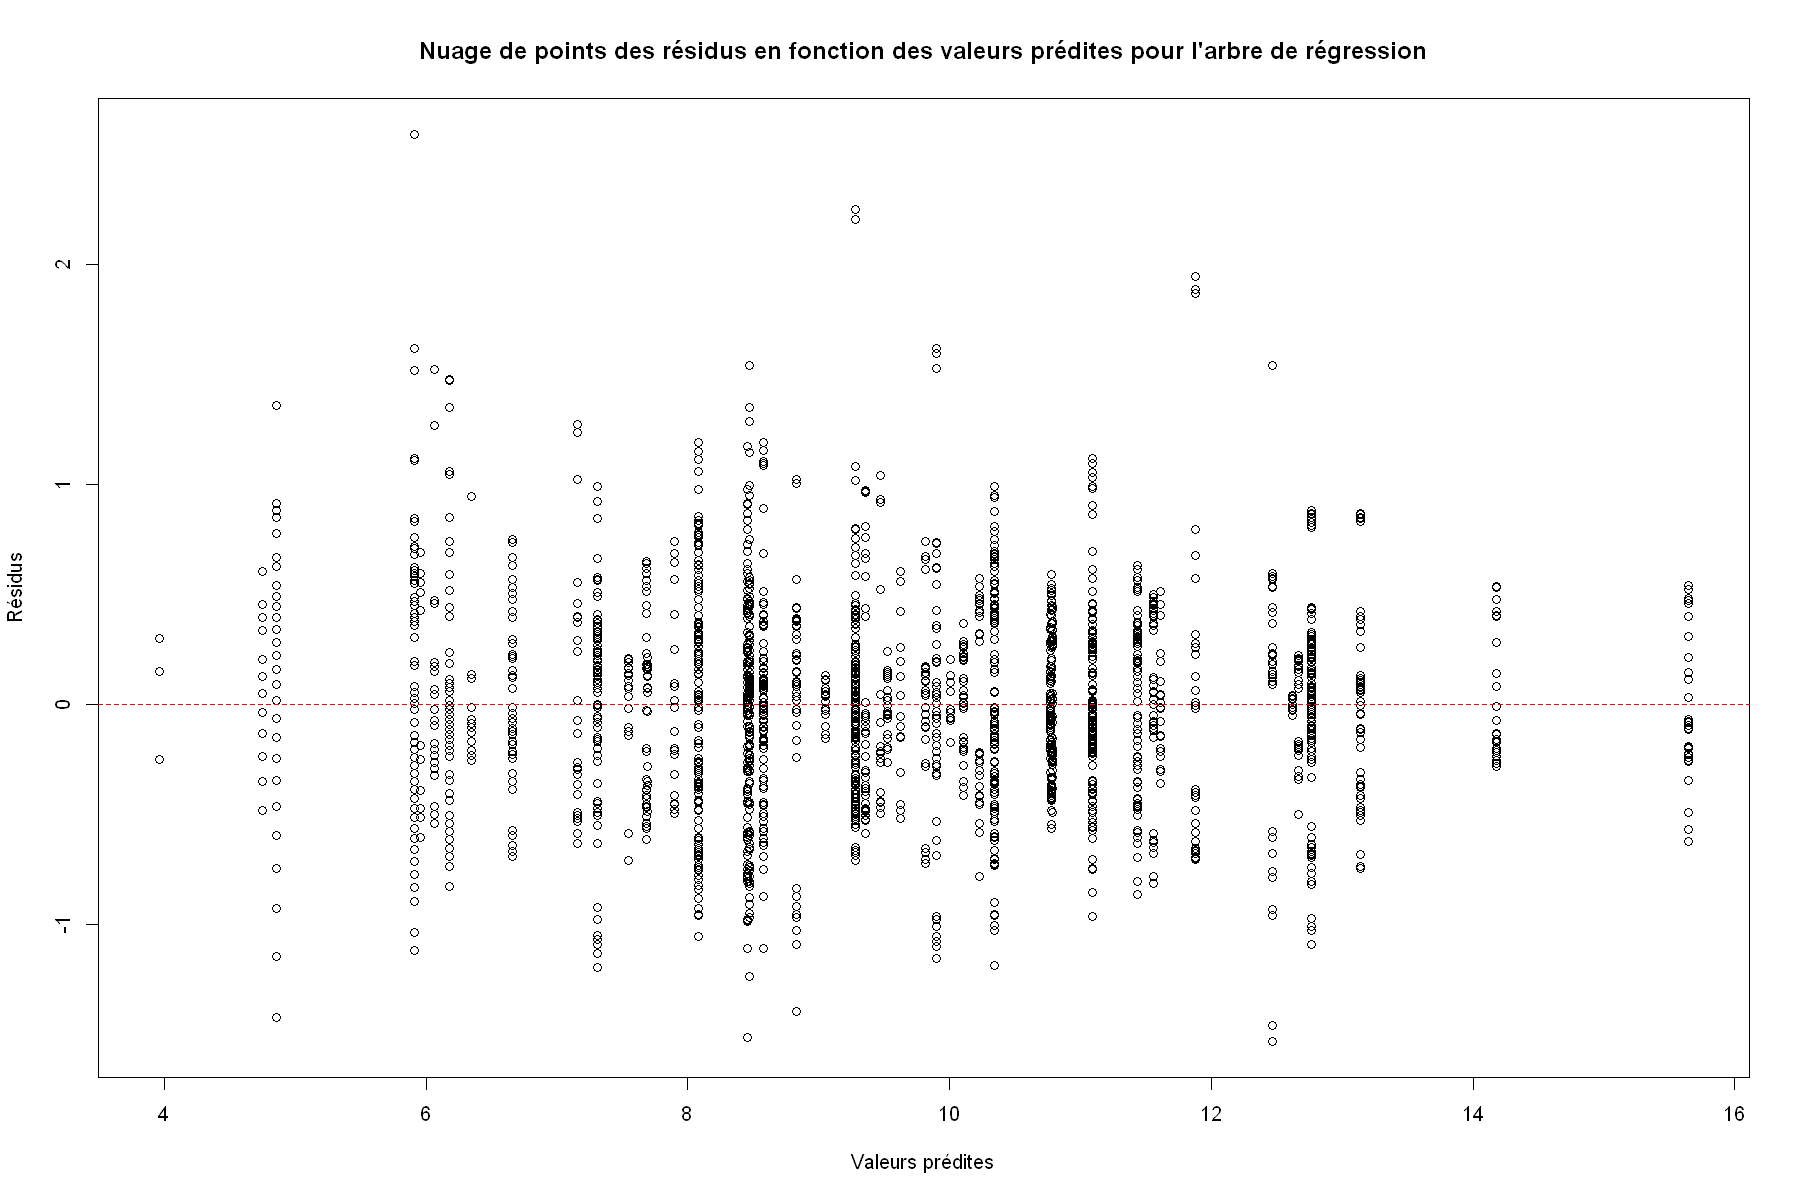

In [67]:
# Prédire les valeurs ajustées pour le nouvel arbre
fitted_values <- predict(tree.reg, type = "vector")

# Calculer les résidus
residuals <- datappr1$Value_co2_emissions_kt_by_country - fitted_values

# Tracer le graphique des résidus en fonction des valeurs prédites
plot(fitted_values, residuals,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour l'arbre de régression")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés


Les résidus sont centrés et de variance constante. De plus, on observe des barres parce que l'arbre binaire nous donne qu'un niomlbre finui de resultart

On regarde le MSE (mean-squared error) : 

In [68]:
# Calcul des prévisions
pred.treer=predict(tree.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision en régression
mse_tree = sum((pred.treer-datestr1[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr)
mse_tree

[1] 0.2495961

On regarde la matrice de confusion :

In [69]:
library(caret)

confusionMatrix(as.factor(pred.treer>moyenne_co2),as.factor(datestr1[,"Value_co2_emissions_kt_by_country"]>moyenne_co2))$table

          Reference
Prediction FALSE TRUE
     FALSE   269   10
     TRUE     14  281

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



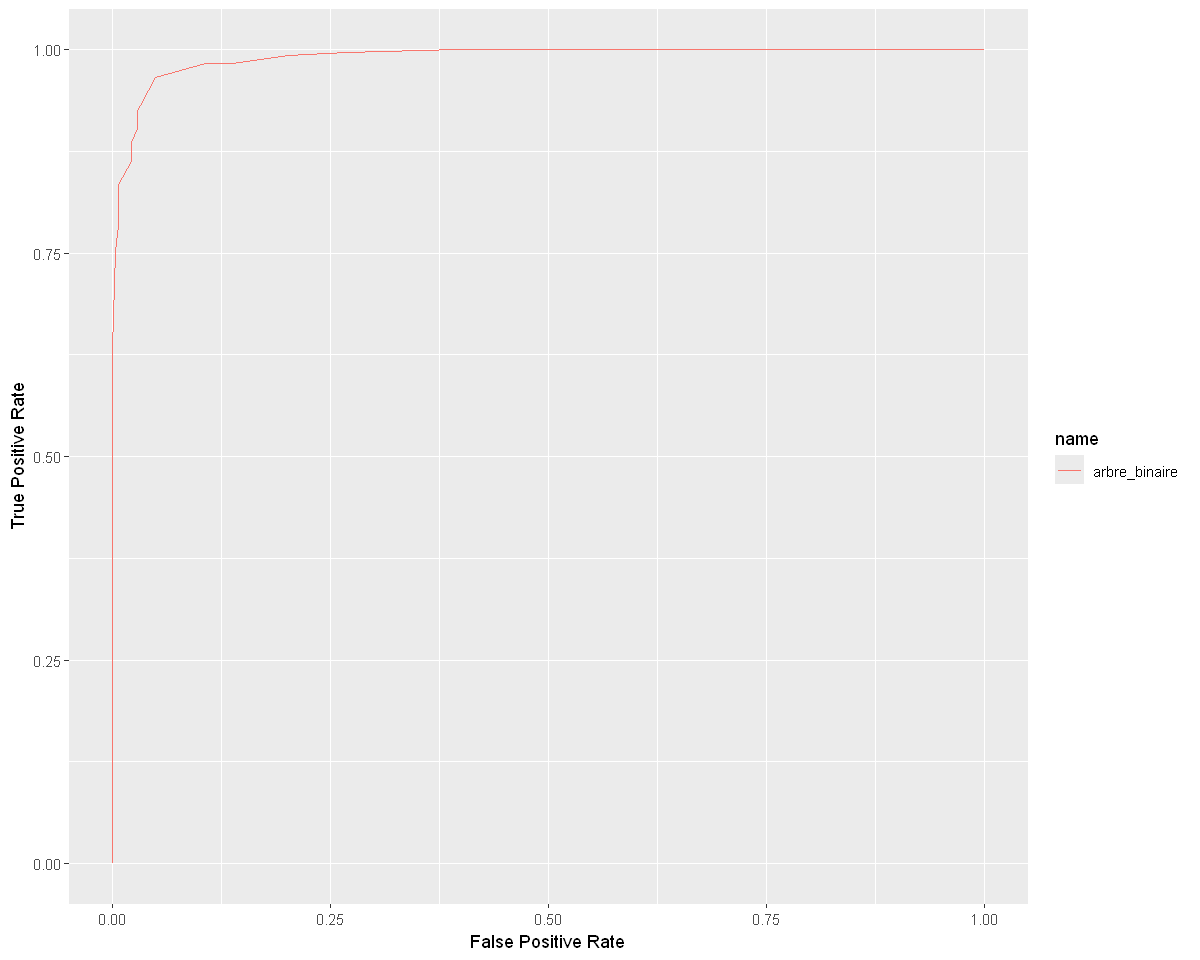

In [70]:
library(pROC)

# Supposons que pred.boostr soit la sortie de votre modèle de prédiction
# datestr["Value_co2_emissions_kt_by_country"] est la variable que vous prédisez

# Définir les prédictions binaires en fonction de la valeur moyenne du CO2
pred_binary <- pred.treer > moyenne_co2
actual_binary <- datestr[,"Value_co2_emissions_kt_by_country"] > moyenne_co2

# Créer la courbe ROC pour chaque modèle en utilisant les prédictions binaires
rocobj <- list()
rocobj$arbre_binaire <- roc(actual_binary, pred.treer)


# Tracer la courbe ROC
options(repr.plot.width = 10, repr.plot.height = 8)
ggroc(rocobj, legacy.axes = TRUE) +
  xlab("False Positive Rate") +
  ylab("True Positive Rate")


## 11. Random Forest

La méthode Random Forest est un algorithme d'apprentissage supervisé qui combine plusieurs arbres de décision pour améliorer la précision et la robustesse des prédictions. En utilisant le principe de bagging (bootstrap aggregating) et une sélection aléatoire de features, elle réduit le risque de surapprentissage et améliore la généralisation des modèles, ce qui la rend particulièrement efficace pour les problèmes de classification et de régression.

In [71]:
library(randomForest)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : 'randomForest'


L'objet suivant est masqué depuis 'package:gridExtra':

    combine


L'objet suivant est masqué depuis 'package:dplyr':

    combine


L'objet suivant est masqué depuis 'package:ggplot2':

    margin




In [72]:
length(datestr1[,"Value_co2_emissions_kt_by_country"])

[1] 574

In [73]:

rf.reg=randomForest(Value_co2_emissions_kt_by_country~., data=datappr1,xtest=datestr1[,-10],ytest=datestr1[,"Value_co2_emissions_kt_by_country"],
   ntree=500,do.trace=50,importance=TRUE)
attributes(rf.reg)
rf.reg$mtry

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.04078     0.71 |  0.03023     0.56 |
 100 |  0.03478     0.61 |  0.02805     0.52 |
 150 |  0.03255     0.57 |  0.02715     0.50 |
 200 |  0.03041     0.53 |  0.02706     0.50 |
 250 |  0.02972     0.52 |  0.02658     0.49 |
 300 |  0.02976     0.52 |  0.02633     0.49 |
 350 |  0.02963     0.52 |  0.02637     0.49 |
 400 |  0.02951     0.51 |  0.02618     0.48 |
 450 |  0.02931     0.51 |  0.02603     0.48 |
 500 |  0.02906     0.51 |  0.02598     0.48 |


$names
 [1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

[1] 5

Interpréter le out of bag etccc

On affiche le graphe des résidus en fonction des valeurs prédites :

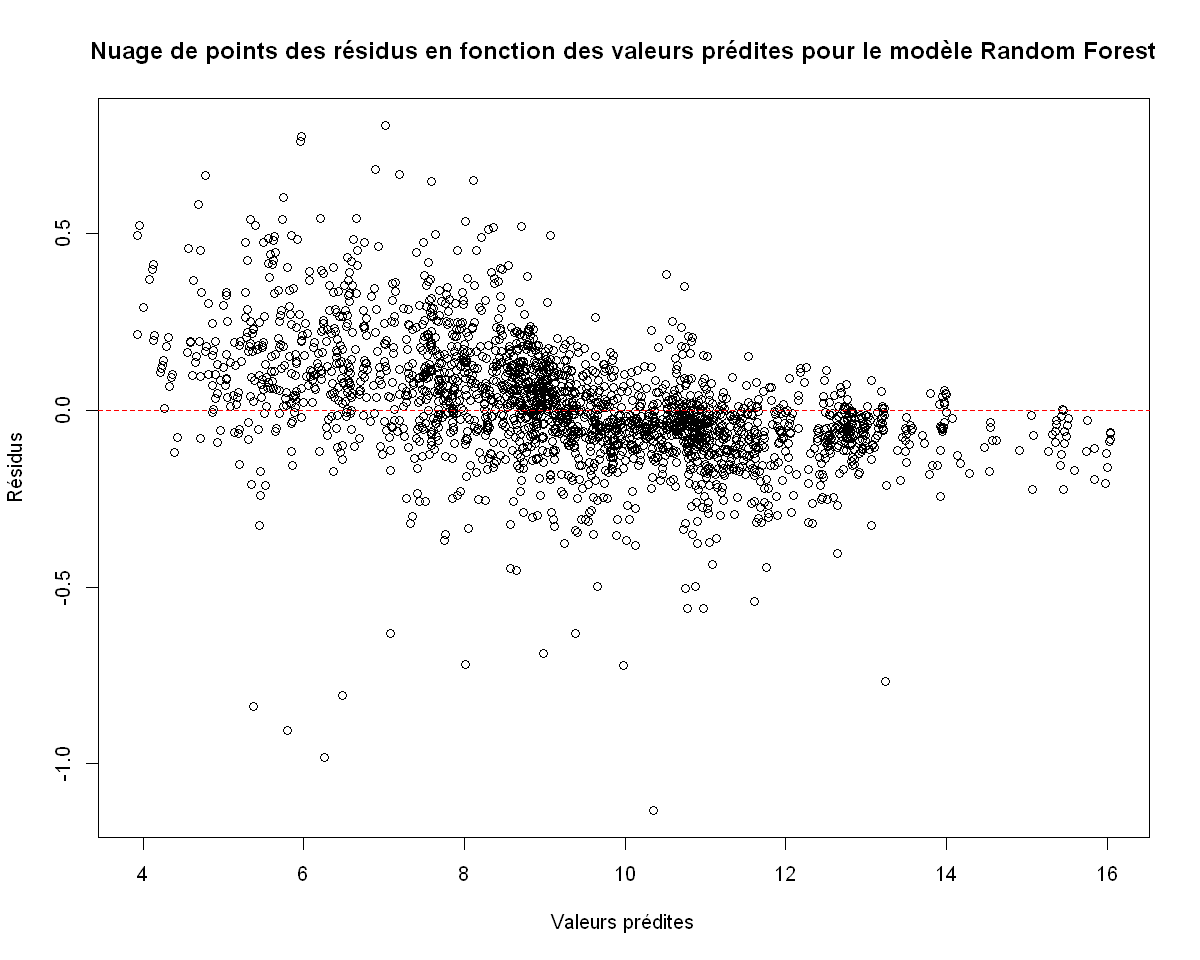

In [74]:
# Prédire les valeurs ajustées pour le modèle Random Forest
fitted_values_rf <- rf.reg$predicted

# Calculer les résidus
residuals_rf <- rf.reg$predicted - datappr1[,"Value_co2_emissions_kt_by_country"]

# Tracer le graphique des résidus en fonction des valeurs prédites
plot(fitted_values_rf, residuals_rf,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour le modèle Random Forest")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés


### 11.1 Prévision de l'échantillon test

In [75]:
# Forêts aléatoires
pred.rfr=rf.reg$test$predicted
# Erreur quadratique moyenne de prévision`
mse_rf = sum((pred.rfr-datestr1[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr1)
mse_rf

[1] 0.02598076

In [76]:
table(pred.rfr>moyenne_co2,datestr1[,"Value_co2_emissions_kt_by_country"]>moyenne_co2)

       
        FALSE TRUE
  FALSE   281    3
  TRUE      2  288

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



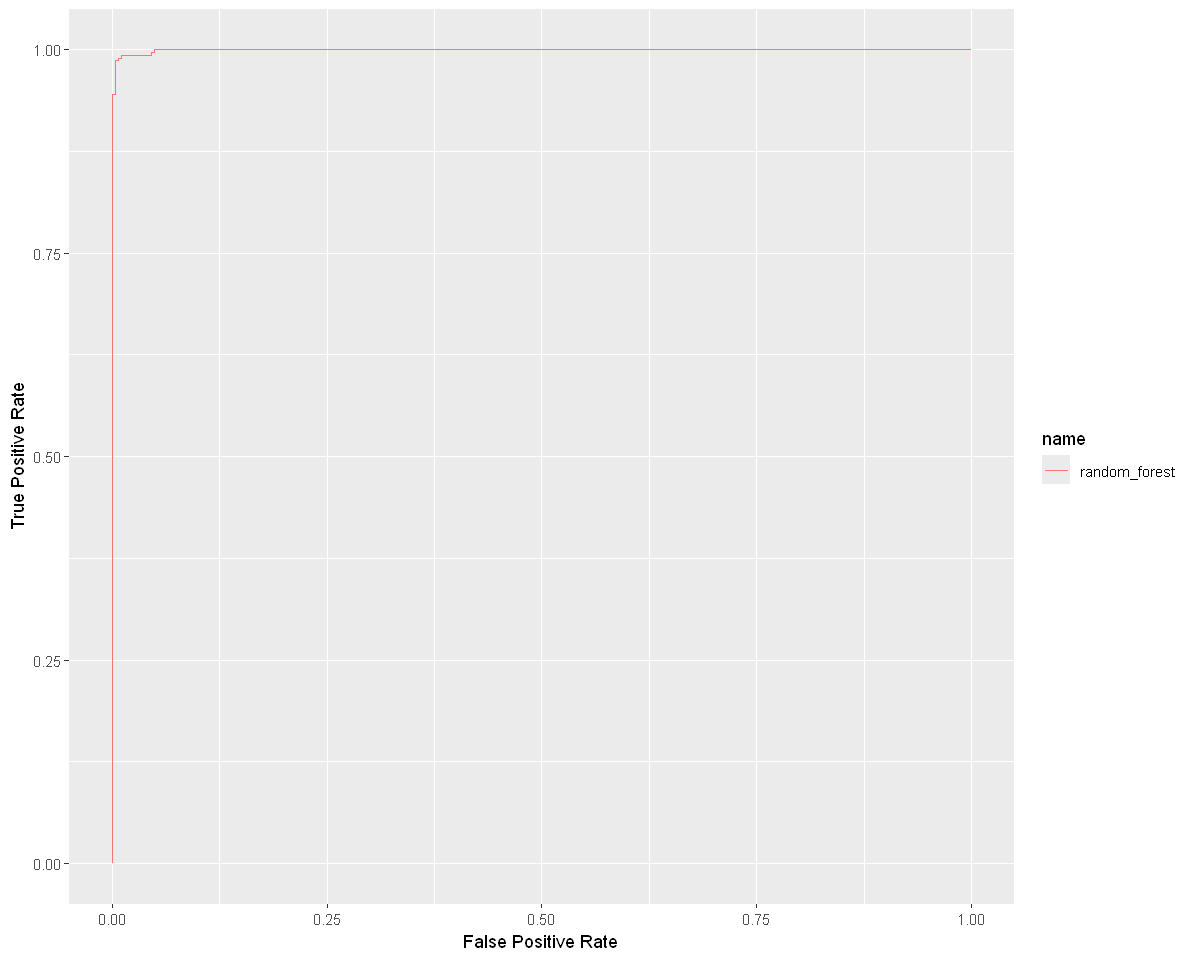

In [77]:
library(pROC)

# Supposons que pred.boostr soit la sortie de votre modèle de prédiction
# datestr["Value_co2_emissions_kt_by_country"] est la variable que vous prédisez

# Définir les prédictions binaires en fonction de la valeur moyenne du CO2
pred_binary <- pred.rfr > moyenne_co2
actual_binary <- datestr[,"Value_co2_emissions_kt_by_country"] > moyenne_co2

# Créer la courbe ROC pour chaque modèle en utilisant les prédictions binaires
rocobj <- list()
rocobj$random_forest <- roc(actual_binary, pred.rfr)


# Tracer la courbe ROC
options(repr.plot.width = 10, repr.plot.height = 8)
ggroc(rocobj, legacy.axes = TRUE) +
  xlab("False Positive Rate") +
  ylab("True Positive Rate")


## 12. Boosting

Le boosting est une technique d'apprentissage automatique qui combine plusieurs modèles d'apprentissage faibles pour créer un modèle plus puissant. Il fonctionne en entraînant itérativement des modèles sur les données, en mettant davantage l'accent sur les exemples mal classés par les modèles précédents. À chaque itération, de nouveaux modèles sont ajoutés à l'ensemble, chacun se concentrant sur les erreurs des modèles précédents. En fin de compte, les prédictions des modèles faibles sont pondérées et combinées pour former une prédiction finale. Cette approche séquentielle permet au modèle global de s'améliorer progressivement, aboutissant souvent à des performances prédictives supérieures.

In [78]:
library(gbm)

Loaded gbm 2.1.9

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



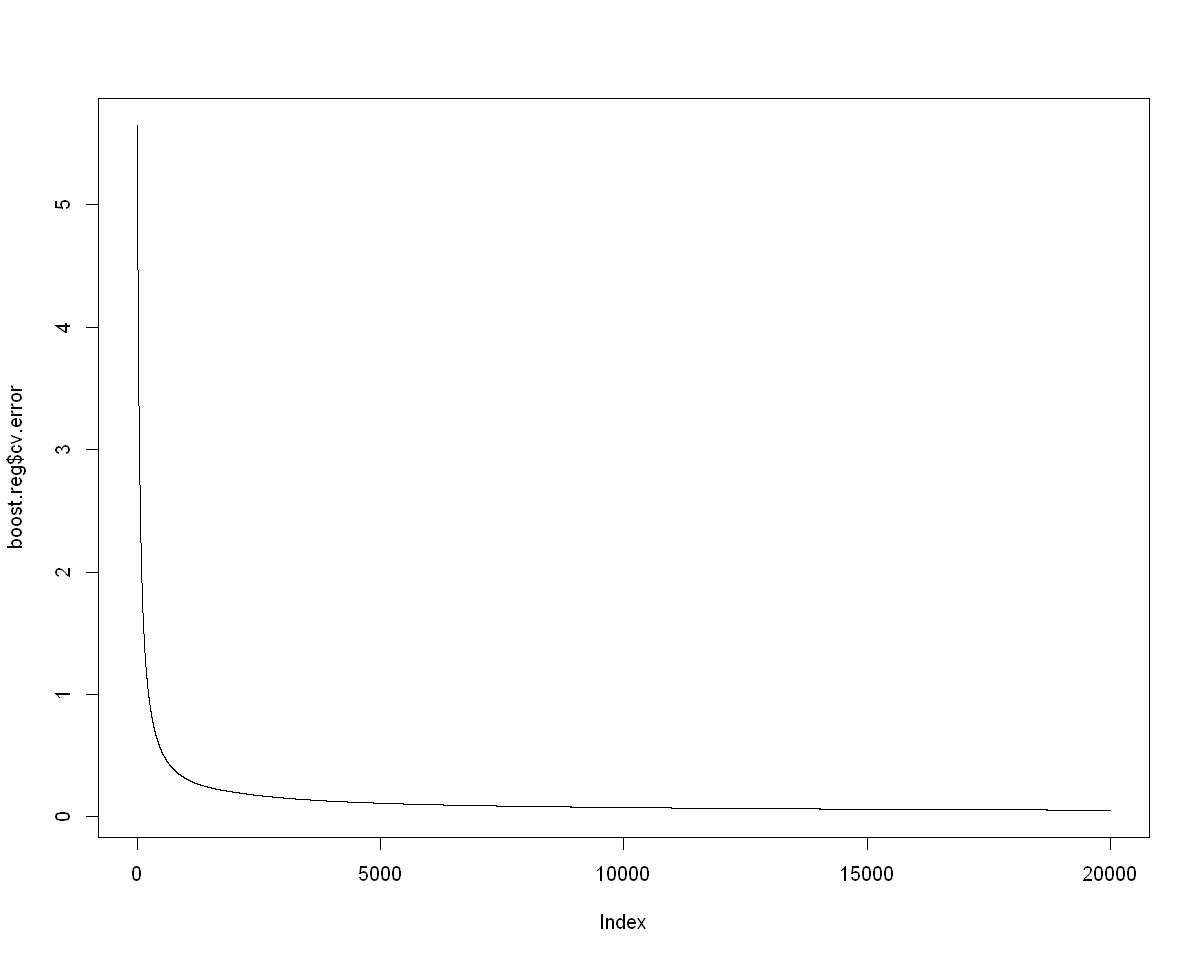

In [79]:
boost.reg = gbm(Value_co2_emissions_kt_by_country ~ ., data = datappr1, distribution = "gaussian", n.trees = 20000, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)
# fixer verbose à FALSE pour éviter trop de sorties
plot(boost.reg$cv.error, type = "l")

Déterminons le nombre optimal d'itérations : 

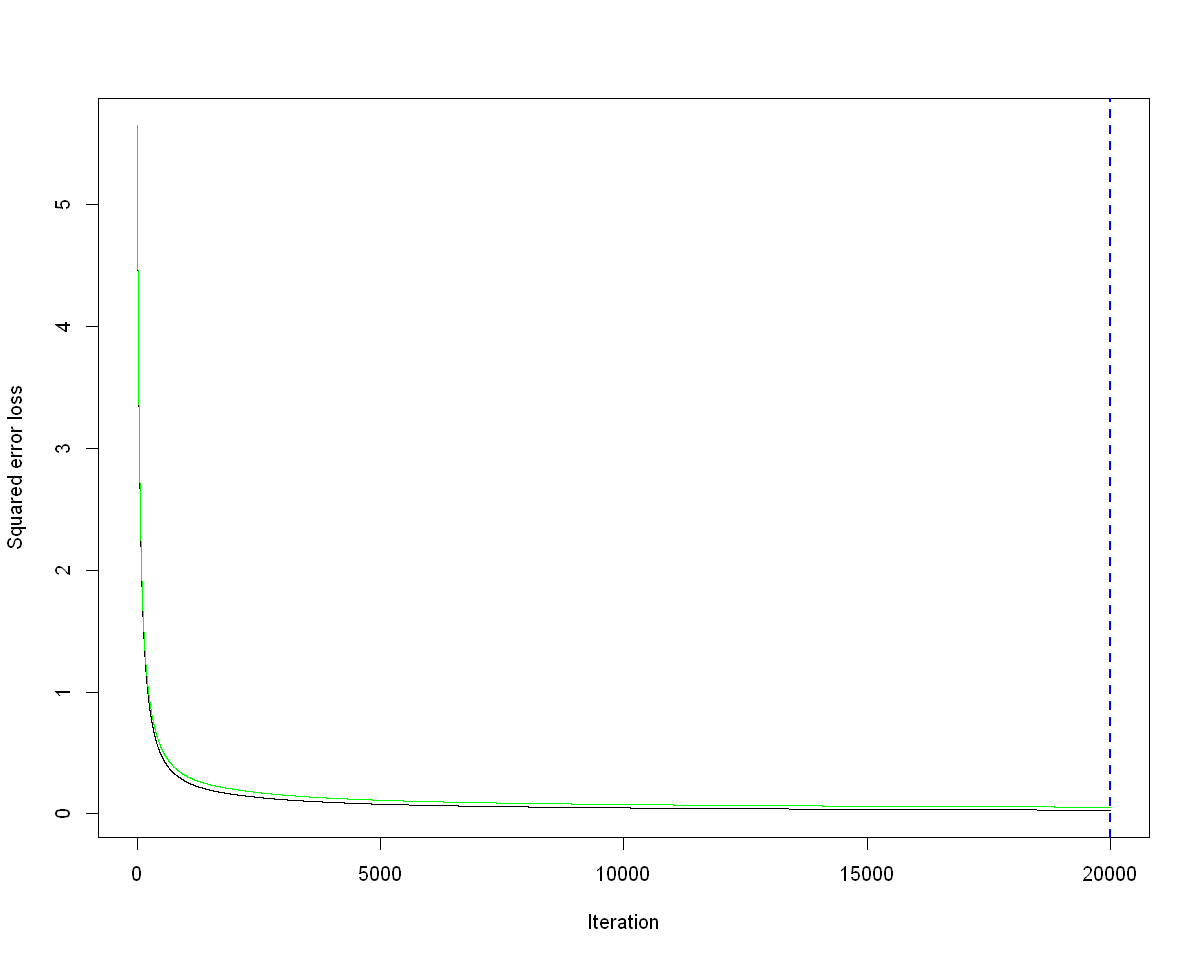

In [80]:
best.iter=gbm.perf(boost.reg,method="cv")

Traçon le graphe des résidus en fonction des valeurs prédites : 

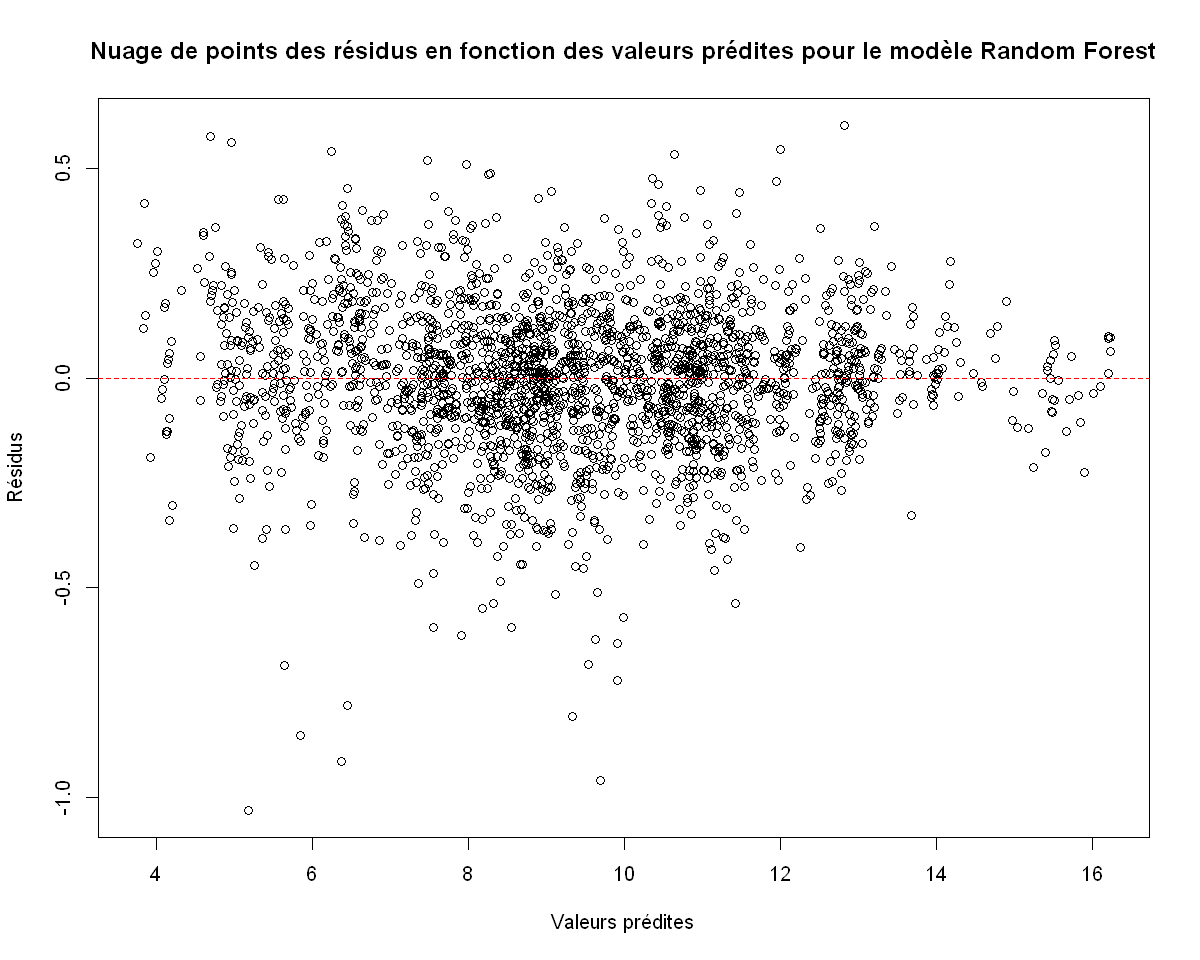

In [81]:
fit.boostr=boost.reg$fit
res.boostr=fit.boostr-datappr1[,"Value_co2_emissions_kt_by_country"]


plot(fit.boostr, res.boostr,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour le modèle Random Forest")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés

### 11.2 Prévision de l'échantillon test

On peut regarder le MSE : 

In [82]:
 pred.boostr=predict(boost.reg,newdata=datestr1,n.trees=best.iter)
# Erreur quadratique moyenne de prévision
mse_boost = sum((pred.boostr-datestr1[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr1)
mse_boost

[1] 0.06423801

Regardons la matrice de confusion :

In [83]:
table(pred.boostr>moyenne_co2,datestr[,"Value_co2_emissions_kt_by_country"]>moyenne_co2)

       
        FALSE TRUE
  FALSE   276    5
  TRUE      7  286

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases



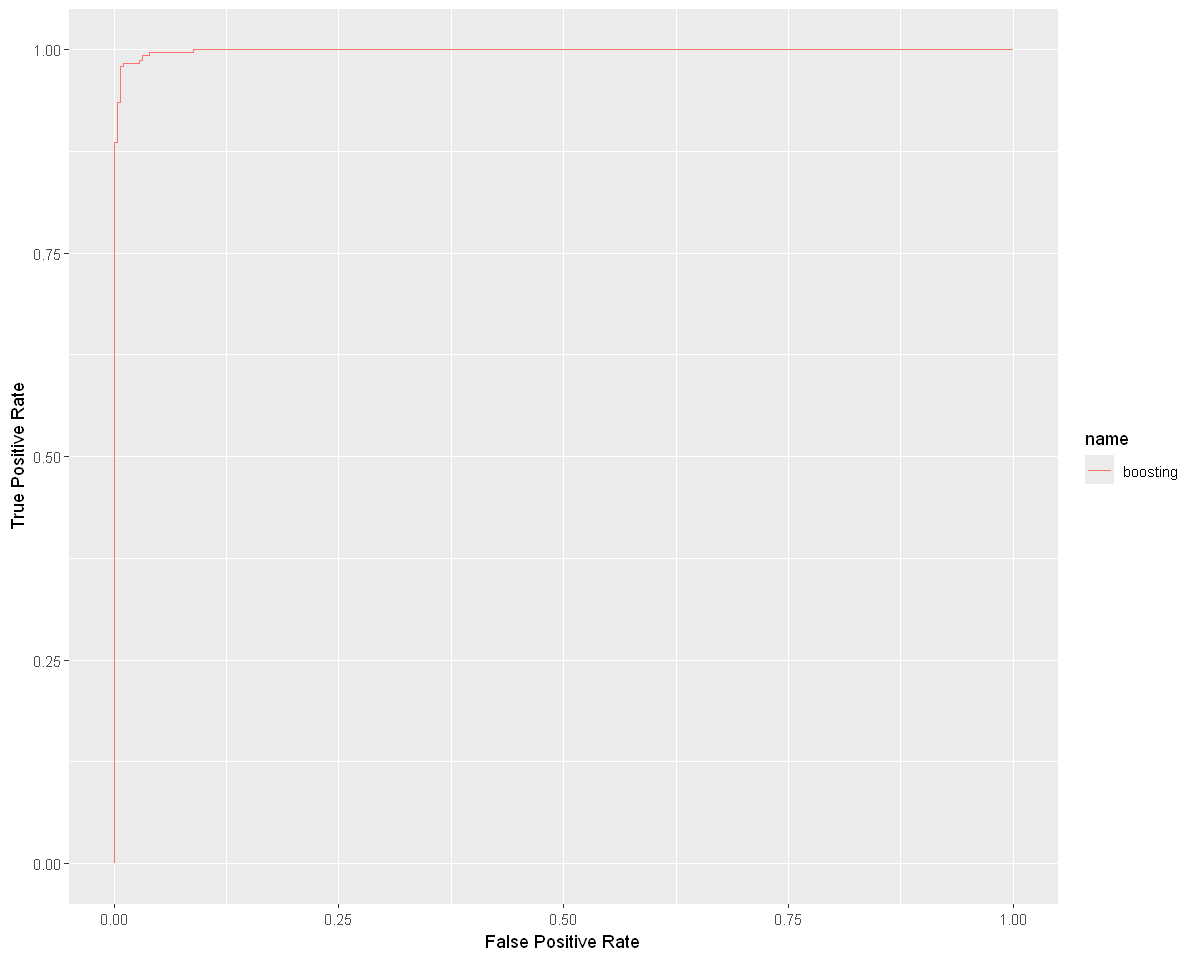

In [84]:
library(pROC)

# Supposons que pred.boostr soit la sortie de votre modèle de prédiction
# datestr["Value_co2_emissions_kt_by_country"] est la variable que vous prédisez

# Définir les prédictions binaires en fonction de la valeur moyenne du CO2
pred_binary <- pred.boostr > moyenne_co2
actual_binary <- datestr[,"Value_co2_emissions_kt_by_country"] > moyenne_co2

# Créer la courbe ROC pour chaque modèle en utilisant les prédictions binaires
rocobj <- list()
rocobj$boosting <- roc(actual_binary, pred.boostr)


# Tracer la courbe ROC
options(repr.plot.width = 10, repr.plot.height = 8)
ggroc(rocobj, legacy.axes = TRUE) +
  xlab("False Positive Rate") +
  ylab("True Positive Rate")




## 12. Réseau de neurones

Les réseaux de neurones sont des modèles d'apprentissage automatique inspirés du fonctionnement du cerveau humain. Ils sont composés de couches de neurones interconnectés, chaque neurone étant une unité de calcul qui traite l'information et passe ses résultats à la couche suivante. L'apprentissage se produit par l'ajustement des poids des connexions entre les neurones, ce qui permet au réseau de capturer des modèles complexes dans les données. Grâce à des algorithmes d'optimisation tels que la rétropropagation du gradient, le réseau de neurones est entraîné à minimiser une fonction de perte, ce qui améliore ses performances prédictives au fil du temps. Les réseaux de neurones sont utilisés dans une variété de tâches, allant de la classification d'images à la prédiction de séries temporelles, en passant par la traduction automatique.

In [85]:
library(MASS)
library(nnet)


Attachement du package : 'MASS'


L'objet suivant est masqué depuis 'package:plotly':

    select


L'objet suivant est masqué depuis 'package:dplyr':

    select




In [86]:
datappr1 <- datappr[, !(names(datappr) %in% c("Entity", "Electricity.from.fossil.fuels..TWh.","Year"))]


datestr1 <- datestr[, !(names(datappr) %in% c("Entity", "Electricity.from.fossil.fuels..TWh.","Year"))]


head(datappr1)

,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,Low.carbon.electricity....electricity.,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,20.06497,10.90,3.811982,0,0.56,7.995083,5.324137,0.7884574,6.938284,1.4141180,5.358387,4.110874,13.38815,33.93911,67.70995
6,25.39089,12.20,3.551914,0,0.59,8.027506,5.533663,0.8796267,7.346655,11.2297148,5.493190,4.110874,13.38815,33.93911,67.70995
7,30.71869,13.85,3.493169,0,0.64,8.785811,5.721691,0.9162907,7.473637,5.3574033,5.578724,4.110874,13.38815,33.93911,67.70995
8,36.05101,15.30,3.393837,0,0.75,8.941329,5.872906,0.9282193,7.479300,13.8263195,5.888028,4.110874,13.38815,33.93911,67.70995
11,42.70000,20.00,2.781920,0,0.75,8.988172,7.076563,1.2412686,8.869398,14.3624415,6.299513,4.110874,13.38815,33.93911,67.70995
12,43.22202,21.80,2.610805,0,0.60,8.827406,7.270392,1.4422020,9.097284,0.4263548,6.383828,4.110874,13.38815,33.93911,67.70995


In [87]:
nnet.reg=nnet(Value_co2_emissions_kt_by_country~.,data=datappr1,size=2,decay=2,linout=TRUE,maxit=500) 
summary(nnet.reg)

# weights:  33
initial  value 216337.337356 
iter  10 value 13281.942552
iter  20 value 10726.765906
iter  30 value 9688.256572
iter  40 value 9582.693573
iter  50 value 8654.277637
iter  60 value 8055.880814
iter  70 value 7698.732367
iter  80 value 6412.433409
iter  90 value 5275.369679
iter 100 value 4766.915928
iter 110 value 4160.567677
iter 120 value 3186.404086
iter 130 value 2503.242760
iter 140 value 2327.762786
iter 150 value 2307.932968
iter 160 value 2241.579728
iter 170 value 2181.632518
iter 180 value 2165.860240
iter 190 value 2103.963664
iter 200 value 2017.710260
iter 210 value 1793.116822
iter 220 value 1506.222373
iter 230 value 1381.398092
iter 240 value 1359.056433
iter 250 value 1337.114422
iter 260 value 1307.216831
iter 270 value 1142.896791
iter 280 value 1132.001478
iter 290 value 1130.102068
iter 300 value 1127.332301
iter 310 value 1127.101168
iter 320 value 1126.807045
iter 330 value 1126.499579
final  value 1126.497293 
converged


a 14-2-1 network with 33 weights
options were - linear output units  decay=2
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
  -4.66    0.01   -0.02   -0.26   -0.04    0.00   -0.07    0.47   -0.19    0.01 
i10->h1 i11->h1 i12->h1 i13->h1 i14->h1 
   0.00   -0.13    0.24    0.01    0.00 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   7.18    0.02   -0.04   -0.30   -0.09    0.00   -0.09    0.59   -0.47    0.03 
i10->h2 i11->h2 i12->h2 i13->h2 i14->h2 
  -0.15   -1.00   -0.35    0.02    0.00 
 b->o h1->o h2->o 
 5.91 10.87 -5.71 

Nous allons optimiser le paramètre "decay" (le taux de régularisation) par validation croisée : 

In [88]:
library(e1071)
#nnettune = tune.nnet(Value_co2_emissions_kt_by_country~.,data=datappr1,size=c(1,2,3,4),decay=c(0.3,2,4,5),maxit=200,linout=TRUE)
#plot(nnettune)

#nnettune$best.parameters

Nous pouvons tracer le graphe des résidus en fonction des valeurs prédites :

In [89]:
#nnet.reg=nnet(Value_co2_emissions_kt_by_country~.,data=datappr1,size=3,decay=4,linout=TRUE,maxit=500) 

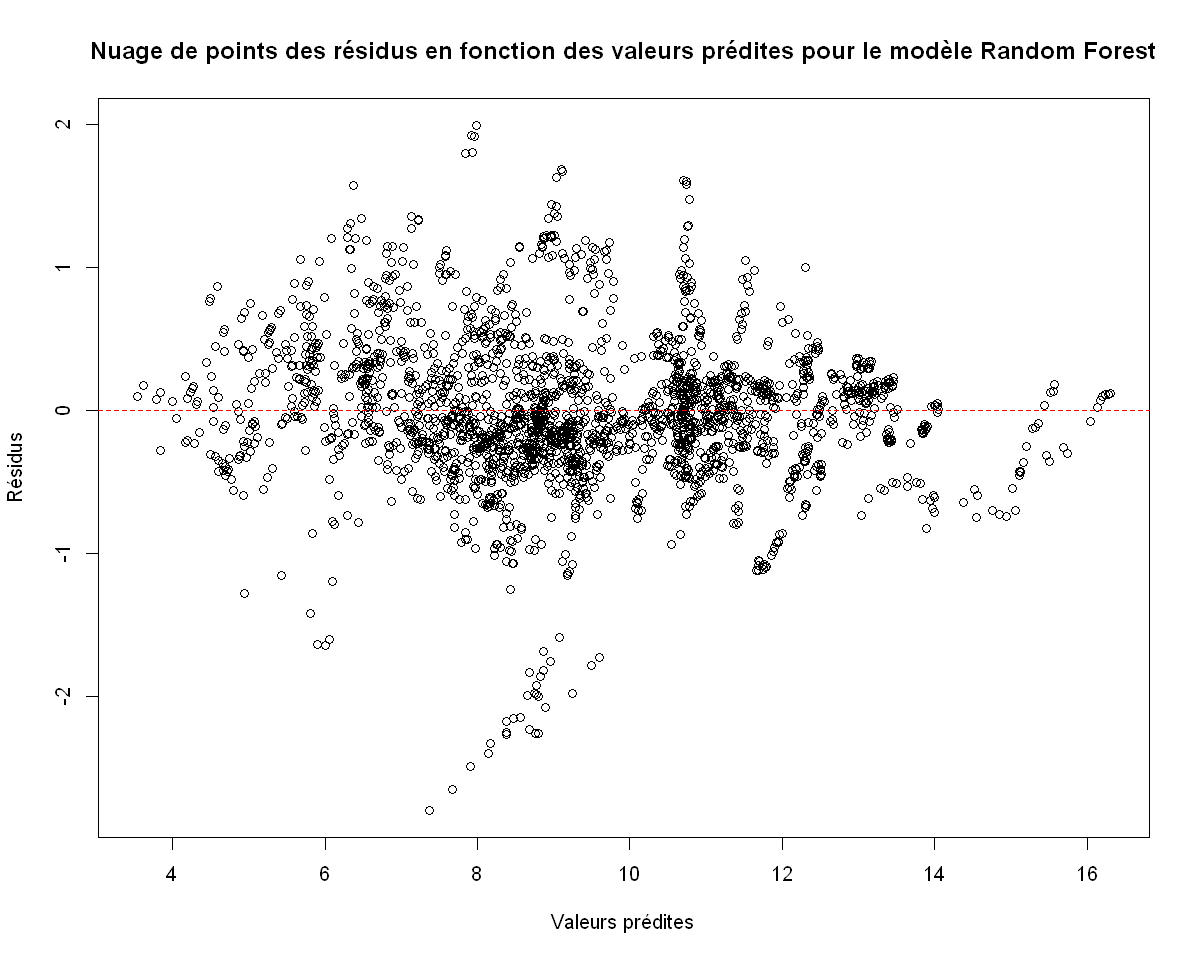

In [90]:
fit.nnetr=predict(nnet.reg,data=datappr1)
res.nnetr=fit.nnetr-datappr1[,"Value_co2_emissions_kt_by_country"]

plot(fit.nnetr, res.nnetr,
     xlab = "Valeurs prédites", ylab = "Résidus",
     main = "Nuage de points des résidus en fonction des valeurs prédites pour le modèle Random Forest")
abline(h = 0, lty = 2, col = "red")  # Ajouter la ligne y = 0 en rouge en pointillés

### 12.1 Prévision de l'échantillon test

On peut calculer le MSE : 

In [91]:
# Calcul des prévisions
pred.nnetr=predict(nnet.reg,newdata=datestr1)

# Erreur quadratique moyenne de prévision
mse_nn = sum((pred.nnetr-datestr1[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr1)
mse_nn

[1] 0.3028003

On peut aussi observer la matrice de confusion:

In [92]:
table(pred.nnetr>moyenne_co2,datestr[,"Value_co2_emissions_kt_by_country"]>moyenne_co2)

       
        FALSE TRUE
  FALSE   273   32
  TRUE     10  259

## 13. Comparaison des méthodes

On affiche la courbe ROC : 

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases

Setting levels: control = FALSE, case = TRUE

Warning message in roc.default(actual_binary, pred.nnetr):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases

Setting levels: control = FALSE, case = TRUE

Setting direction: controls < cases

Setting levels: control = FALSE, case = TRUE

Warning message in roc.default(actual_binary, pred.glm_lasso_min):
"Deprecated use a matrix as predictor. Unexpected results may be produced, please pass a numeric vector."
Setting direction: controls < cases

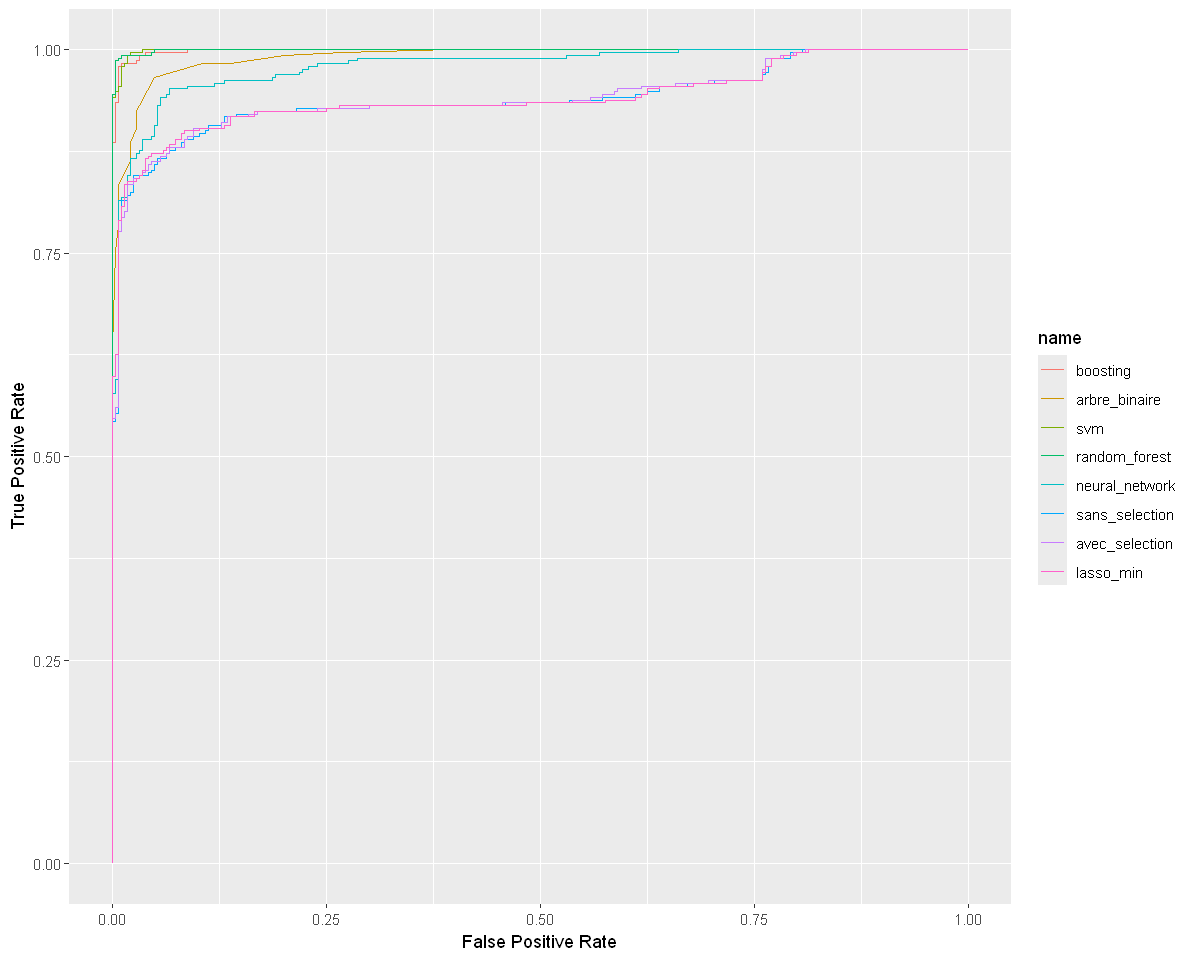

In [93]:
library(pROC)

# Supposons que pred.boostr soit la sortie de votre modèle de prédiction
# datestr["Value_co2_emissions_kt_by_country"] est la variable que vous prédisez

# Définir les prédictions binaires en fonction de la valeur moyenne du CO2
pred_binary <- pred.boostr > moyenne_co2
actual_binary <- datestr[,"Value_co2_emissions_kt_by_country"] > moyenne_co2

pred_binary <- pred.treer > moyenne_co2
pred_binary <- pred.svmr > moyenne_co2
pred_binary <- pred.rfr > moyenne_co2
pred_binary <- pred.boostr > moyenne_co2
pred_binary <- pred.nnetr > moyenne_co2
pred_binary_sans <- as.numeric(pred.glm_sans_selection > moyenne_co2)
pred_binary_avec <- as.numeric(pred.glm_avec_selection > moyenne_co2)
pred_binary_lasso_min <- as.numeric(pred.glm_lasso_min > moyenne_co2)

# Créer la courbe ROC pour chaque modèle en utilisant les prédictions binaires
rocobj <- list()
rocobj$boosting <- roc(actual_binary, pred.boostr)
rocobj$arbre_binaire <- roc(actual_binary, pred.treer)
rocobj$svm <- roc(actual_binary, pred.svmr)
rocobj$random_forest <- roc(actual_binary, pred.rfr)
rocobj$neural_network <- roc(actual_binary, pred.nnetr)
rocobj$sans_selection <- roc(actual_binary, pred.glm_sans_selection)
rocobj$avec_selection <- roc(actual_binary, pred.glm_avec_selection)
rocobj$lasso_min <- roc(actual_binary, pred.glm_lasso_min)



# Tracer la courbe ROC
options(repr.plot.width = 10, repr.plot.height = 8)
ggroc(rocobj, legacy.axes = TRUE) +
  xlab("False Positive Rate") +
  ylab("True Positive Rate")


Comparaison des MSE : 

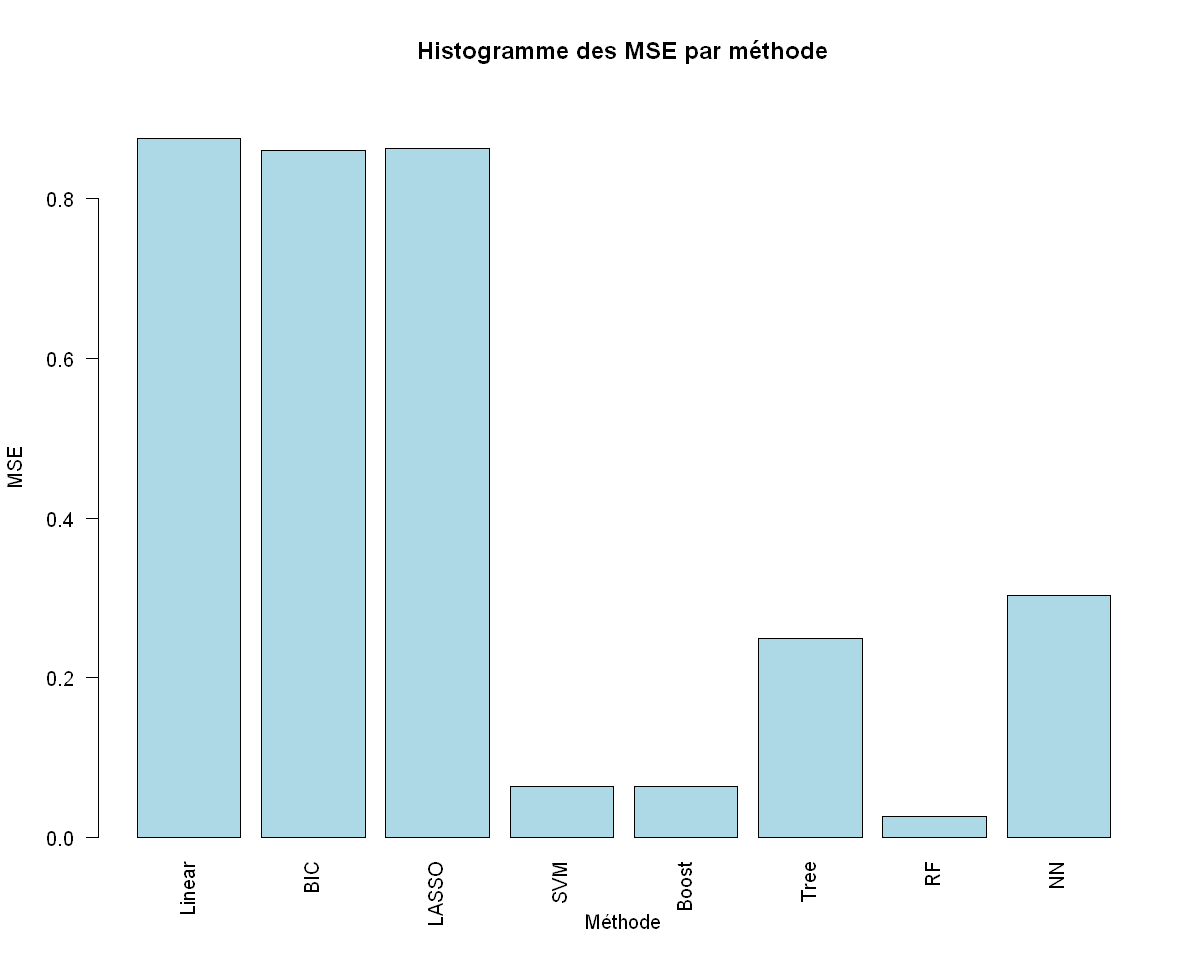

In [94]:
all_mse <- c(mse_lin, mse_bic, mse_lasso, mse_svm, mse_boost, mse_tree, mse_rf, mse_nn)

# Données des MSE
mse_values <- c(mse_lin, mse_bic, mse_lasso, mse_svm, mse_boost, mse_tree, mse_rf, mse_nn)

# Noms des méthodes
method_names <- c("Linear", "BIC", "LASSO", "SVM", "Boost", "Tree", "RF", "NN")

# Création de l'histogramme
barplot(mse_values, 
        names.arg = method_names,
        main="Histogramme des MSE par méthode",
        xlab="Méthode",
        ylab="MSE",
        col="lightblue",
        border="black",
        ylim=c(0, max(mse_values)+0.05),
        las=2  # Tournez les étiquettes de l'axe x de 90 degrés
)

# Ajouter les valeurs sur les barres
#text(x = barplot(mse_values) + 0.25, y = mse_values, labels = mse_values, cex=0.7, col="black", pos=3)


Bilan : Les méthodes qui semblent le plus performantes sont Random Forest, SVM et , suivies des arbres binaires, des réseaux de neurones puis les méthodes les moins performantes sont les méthodes de regression linéaire.

## 14 Importance variables

On affiche le corrplot afin d'avoir une idée des variables qui auraient du poids ou non.

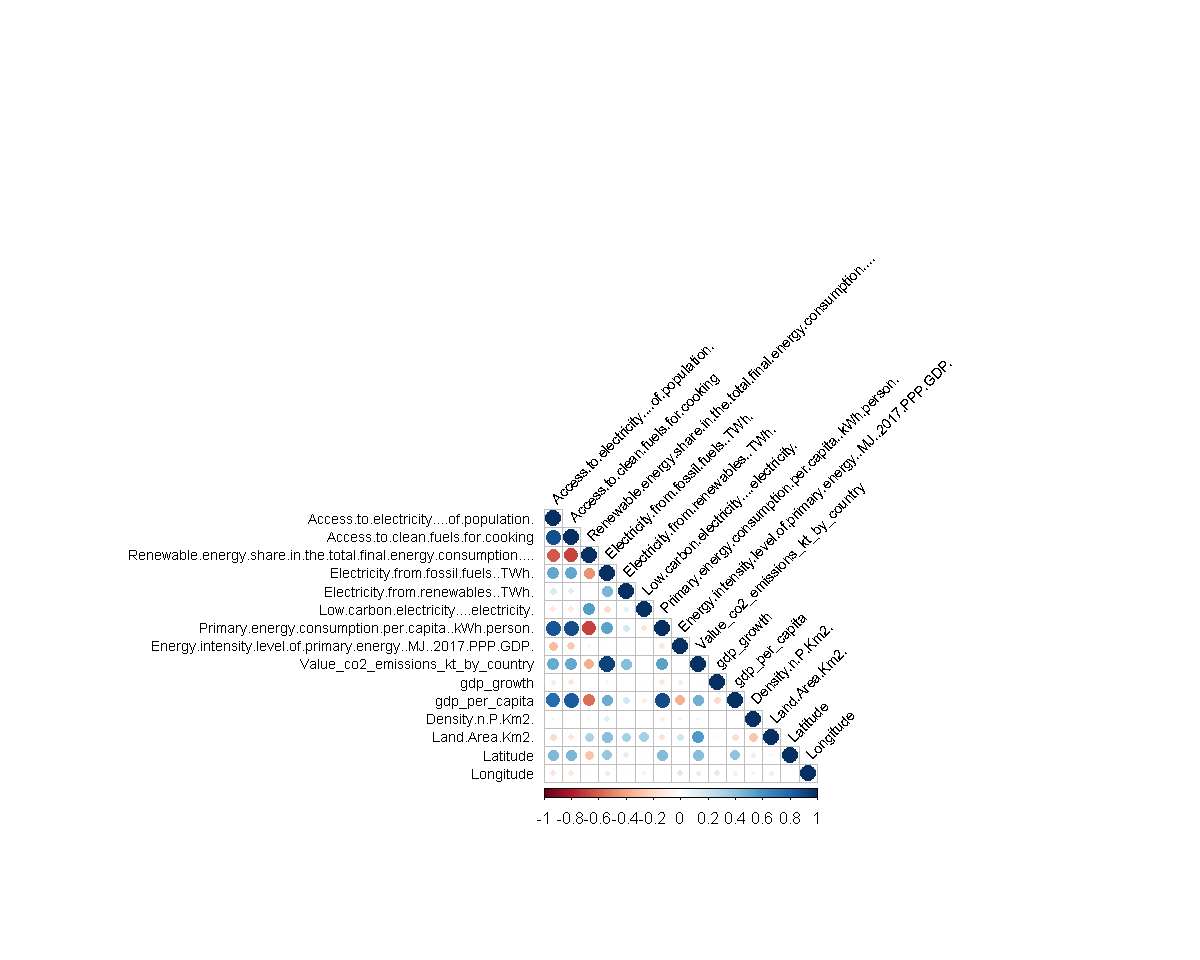

In [102]:
corrplot(correlation_matrix, method = "circle", type = "lower", tl.col = "black", tl.srt = 45, tl.cex = 0.7)

Les variables les plus corrélées à Value_co2_emissions_kt_by_country sont Acces to Electricity et Primary energy consumption per capital et Access to clean fuels to cooking.

Affichons l'histogramme des MSE avec random forest en enlevant chacune de ces 2 variables.

In [95]:
str(datappr1)

'data.frame':	2294 obs. of  15 variables:
 $ Access.to.electricity....of.population.                         : num  20.1 25.4 30.7 36.1 42.7 ...
 $ Access.to.clean.fuels.for.cooking                               : num  10.9 12.2 13.8 15.3 20 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  3.81 3.55 3.49 3.39 2.78 ...
 $ Electricity.from.nuclear..TWh.                                  : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  0.56 0.59 0.64 0.75 0.75 0.6 0.89 1 1.03 1.06 ...
 $ Low.carbon.electricity....electricity.                          : num  8 8.03 8.79 8.94 8.99 ...
 $ Primary.energy.consumption.per.capita..kWh.person.              : num  5.32 5.53 5.72 5.87 7.08 ...
 $ Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.     : num  0.788 0.88 0.916 0.928 1.241 ...
 $ Value_co2_emissions_kt_by_country                               : num  6.94 7.35 7.47 7.48 8.87 ...
 $ gdp_growth   

In [96]:
str(datestr1)

'data.frame':	574 obs. of  15 variables:
 $ Access.to.electricity....of.population.                         : num  100 50 50.8 92.3 100 ...
 $ Access.to.clean.fuels.for.cooking                               : num  100 8.6 49.8 64.6 100 100 100 86.9 62 92.7 ...
 $ Renewable.energy.share.in.the.total.final.energy.consumption....: num  2.74 4.33 4.12 3.04 0 ...
 $ Electricity.from.nuclear..TWh.                                  : num  4.53 0 0 0 0 ...
 $ Electricity.from.renewables..TWh.                               : num  188.79 0.21 9.77 7.63 0 ...
 $ Low.carbon.electricity....electricity.                          : num  6.69 6.15 8.07 2.74 1 ...
 $ Primary.energy.consumption.per.capita..kWh.person.              : num  10.74 7.13 7.88 9.63 10.38 ...
 $ Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.     : num  1.41 2.25 1.7 1.83 1.42 ...
 $ Value_co2_emissions_kt_by_country                               : num  13.52 7.75 9.95 12.26 6.09 ...
 $ gdp_growth                     

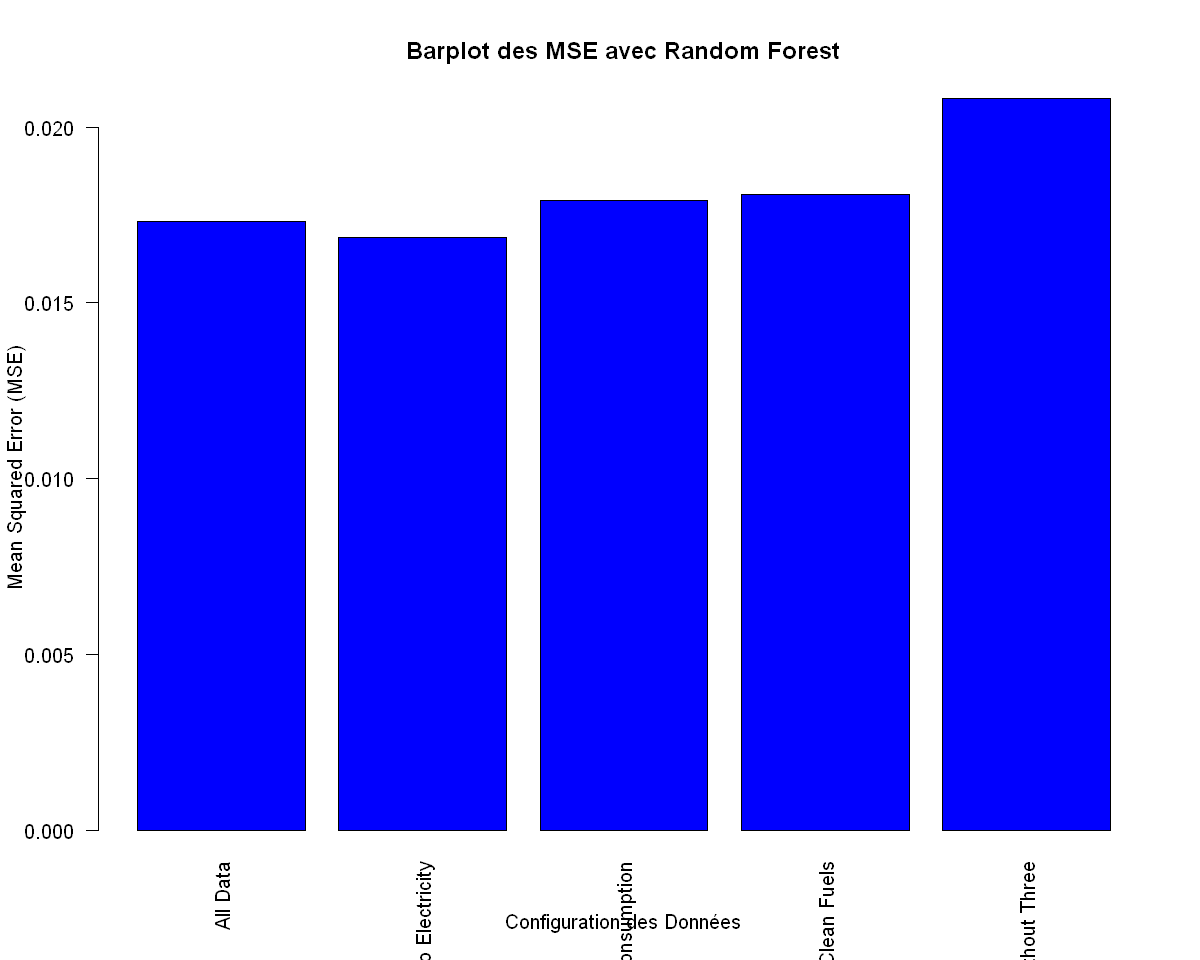

In [97]:
# Charger les packages nécessaires
library(randomForest)

# Définir une fonction pour calculer la MSE avec random forest
calculate_mse <- function(formula, train_data, test_data) {
  set.seed(123)  # Pour la reproductibilité
  
  rf_model <- randomForest(formula, data = train_data)
  predictions <- predict(rf_model, test_data)
  
  mse <- mean((predictions - test_data$Value_co2_emissions_kt_by_country)^2)
  return(mse)
}

# Calculer les MSE pour les différentes configurations
mse_all_data <- calculate_mse(Value_co2_emissions_kt_by_country ~ ., datappr1, datestr1)
mse_without_access_to_electricity <- calculate_mse(Value_co2_emissions_kt_by_country ~ . - Access.to.electricity....of.population., datappr1, datestr1)
mse_without_primary_energy_consumption <- calculate_mse(Value_co2_emissions_kt_by_country ~ . - Primary.energy.consumption.per.capita..kWh.person., datappr1, datestr1)
mse_without_access_to_clean_fuels <- calculate_mse(Value_co2_emissions_kt_by_country ~ . - Access.to.clean.fuels.for.cooking, datappr1, datestr1)

mse_without_three <- calculate_mse(Value_co2_emissions_kt_by_country ~ . - Access.to.electricity....of.population. - Primary.energy.consumption.per.capita..kWh.person. - Access.to.clean.fuels.for.cooking, datappr1, datestr1)

# Créer un dataframe pour les résultats
mse_results <- data.frame(
  Configuration = c("All Data", "Without Access to Electricity", "Without Primary Energy Consumption", "Without Access to Clean Fuels", "Without Three"),
  MSE = c(mse_all_data, mse_without_access_to_electricity, mse_without_primary_energy_consumption, mse_without_access_to_clean_fuels, mse_without_three)
)

# Afficher le barplot des MSE
barplot(mse_results$MSE,
        names.arg = mse_results$Configuration,
        main = "Barplot des MSE avec Random Forest",
        xlab = "Configuration des Données",
        ylab = "Mean Squared Error (MSE)",
        col = "blue",
        las = 2) # las = 2 pour les étiquettes de l'axe x verticales


On remarque que l'erreur est plus grande lorsque l'on retire les 3 variables les plus corrélées à Value CO2 ce qui confirme l'analyse descriptive.

Maintenant, étudions l'impact des variables les moins corrélées à Value CO2, à savoir Low Carbon electricity et Energy intensity level

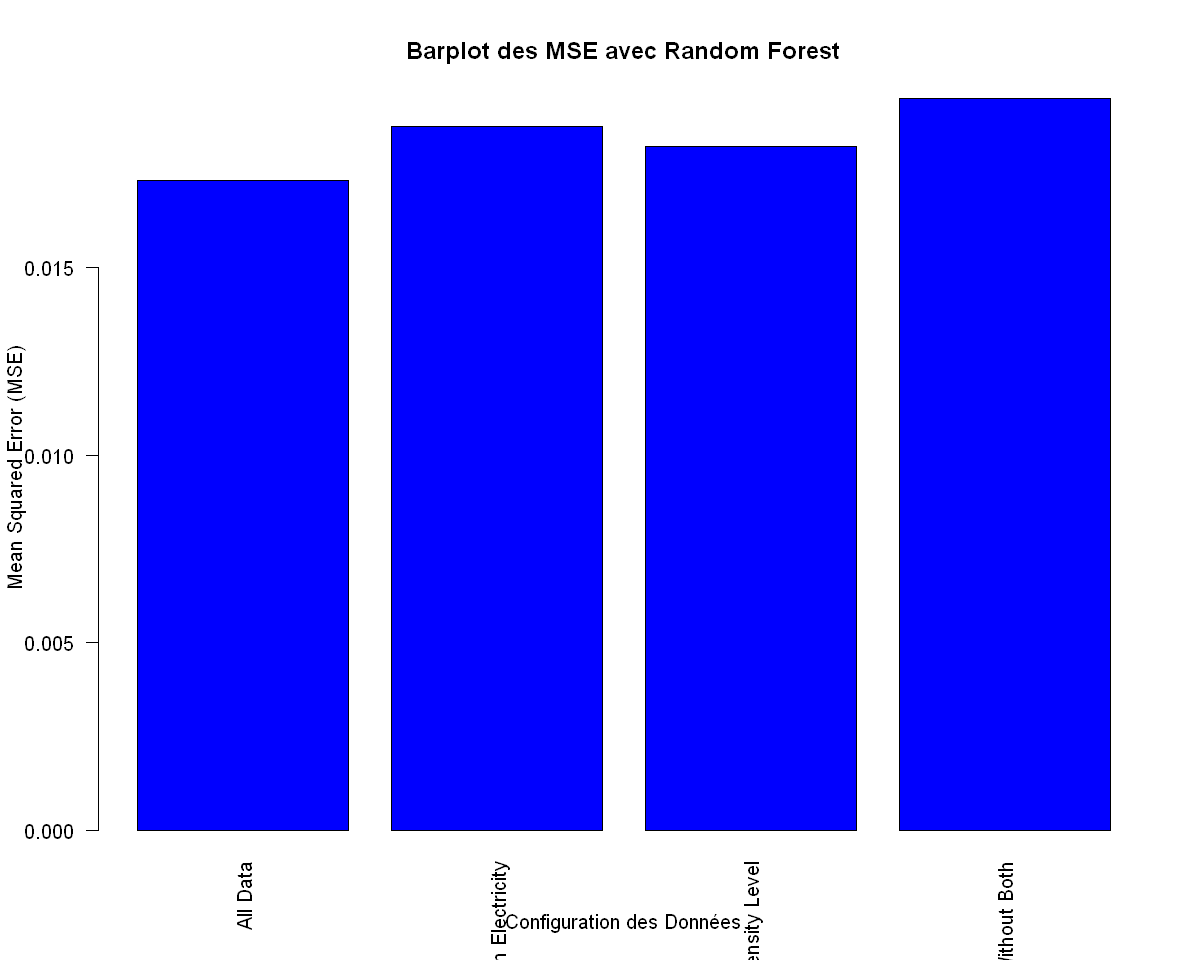

In [98]:
# Charger les packages nécessaires
library(randomForest)

# Définir une fonction pour calculer la MSE avec random forest
calculate_mse <- function(formula, train_data, test_data) {
  set.seed(123)  # Pour la reproductibilité
  
  rf_model <- randomForest(formula, data = train_data)
  predictions <- predict(rf_model, test_data)
  
  mse <- mean((predictions - test_data$Value_co2_emissions_kt_by_country)^2)
  return(mse)
}

# Calculer les MSE pour les différentes configurations
mse_all_data <- calculate_mse(Value_co2_emissions_kt_by_country ~ ., datappr1, datestr1)
mse_without_low_carbon_electricity <- calculate_mse(Value_co2_emissions_kt_by_country ~ . - Low.carbon.electricity....electricity., datappr1, datestr1)
mse_without_energy_intensity <- calculate_mse(Value_co2_emissions_kt_by_country ~ . - Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP., datappr1, datestr1)
mse_without_both <- calculate_mse(Value_co2_emissions_kt_by_country ~ . - Low.carbon.electricity....electricity. - Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP., datappr1, datestr1)

# Créer un dataframe pour les résultats
mse_results <- data.frame(
  Configuration = c("All Data", "Without Low Carbon Electricity", "Without Energy Intensity Level", "Without Both"),
  MSE = c(mse_all_data, mse_without_low_carbon_electricity, mse_without_energy_intensity, mse_without_both)
)

# Afficher le barplot des MSE
barplot(mse_results$MSE,
        names.arg = mse_results$Configuration,
        main = "Barplot des MSE avec Random Forest",
        xlab = "Configuration des Données",
        ylab = "Mean Squared Error (MSE)",
        col = "blue",
        las = 2) # las = 2 pour les étiquettes de l'axe x verticales



Les différences de MSE sont moins significatives comme on aurait pu s'attendre (ces variables ne sont pas du tout corrélées à Value Co2).

## 15. Complétion des données : miss-forest

`missForest` est une méthode d'imputation non paramétrique des données manquantes utilisant des forêts aléatoires (random forests). Elle fonctionne bien pour différents types de données, qu'elles soient continues ou catégorielles, et elle peut gérer des interactions complexes entre les variables sans nécessiter de spécification de modèle. Cette méthode est particulièrement utile car elle préserve les structures non linéaires et les interactions présentes dans les données, offrant ainsi une solution robuste pour le traitement des valeurs manquantes.

In [146]:
head(data)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,Low.carbon.electricity....electricity.,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,Afghanistan,2003,14.73851,9.50,3.628599,0.2700271,0,0.63,8.247501,5.442280,0.8754687,7.107425,8.832278,5.255847,4.110874,13.38815,33.93911,67.70995
5,Afghanistan,2004,20.06497,10.90,3.811982,0.2851789,0,0.56,7.995083,5.324137,0.7884574,6.938284,1.414118,5.358387,4.110874,13.38815,33.93911,67.70995
6,Afghanistan,2005,25.39089,12.20,3.551914,0.2926696,0,0.59,8.027506,5.533663,0.8796267,7.346655,11.229715,5.493190,4.110874,13.38815,33.93911,67.70995
7,Afghanistan,2006,30.71869,13.85,3.493169,0.1823216,0,0.64,8.785811,5.721691,0.9162907,7.473637,5.357403,5.578724,4.110874,13.38815,33.93911,67.70995
8,Afghanistan,2007,36.05101,15.30,3.393837,0.1823216,0,0.75,8.941329,5.872906,0.9282193,7.479300,13.826320,5.888028,4.110874,13.38815,33.93911,67.70995
9,Afghanistan,2008,42.40000,16.70,3.098740,0.1739533,0,0.54,8.658672,6.411545,1.0784096,8.177797,3.924984,5.901714,4.110874,13.38815,33.93911,67.70995


In [147]:
data1 <- data1[, -which(names(data1) %in% c("Entity", "Electricity.from.fossil.fuels..TWh."))]


In [148]:
library(missForest)
# Imputer les données manquantes avec missForest
set.seed(123) # Pour la reproductibilité
imputed_data <- missForest(data1)
data1_imputed <- imputed_data$ximp

On regarde s'il reste des données manquantes

In [149]:


# Vérifier s'il reste des valeurs manquantes
anyNA(data1_imputed)

[1] FALSE

Nous n'avons plus de données manquantes.

On transforme les variables commme précèdemment:

In [150]:

data1_imputed$Electricity.from.nuclear..TWh. = log(data1_imputed$Electricity.from.nuclear..TWh. + 1)
data1_imputed$Renewable.energy.share.in.the.total.final.energy.consumption.... = log(data1_imputed$Renewable.energy.share.in.the.total.final.energy.consumption.... +1)
data1_imputed$Low.carbon.electricity....electricity. = sqrt(data1_imputed$Low.carbon.electricity....electricity. + 1)
data1_imputed$Primary.energy.consumption.per.capita..kWh.person.	 = log(data1_imputed$Primary.energy.consumption.per.capita..kWh.person. + 1)
data1_imputed$Value_co2_emissions_kt_by_country = log(data1_imputed$Value_co2_emissions_kt_by_country + 1)
data1_imputed$Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. = log(data1_imputed$Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. + 1)
data1_imputed$gdp_per_capita = log(data1_imputed$gdp_per_capita + 1)
data1_imputed$Density.n.P.Km2. = log(data1_imputed$Density.n.P.Km2. +  1)
data1_imputed$Land.Area.Km2. = log(data1_imputed$Land.Area.Km2. + 1)


On regénère le datatrain et datatest:

In [151]:
##GENERE LES INDICES DES LIGNES ALEATOIREMENT POUR CHAQUE DATASET

set.seed(132) # initialisation du générateur
# Extraction des échantillons
test.ratio <- .2   # part de l'échantillon test
npop <- nrow(data) # nombre de lignes dans les données
nvar <- ncol(data) # nombre de colonnes
# taille de l'échantillon test
ntest <- ceiling(npop * test.ratio) 
# indices de l'échantillon test
testi <- sample(1:npop, ntest)
# indices de l'échantillon d'apprentissage
appri <- setdiff(1:npop, testi) 


In [152]:
##CONSTRUIT LES DATASET À PARTIR DES INDICES PRECEDENTS

# construction de l'échantillon d'apprentissage
datappr <- data1_imputed[appri,-19] 
# construction de l'échantillon test
datestr <- data1_imputed[testi,-19]  #-19 pour prendre toutes les colonnes (toutes les variables) (prend tous sauf la colonne 19)
# vérification
#str(datappr)
#str(datestr)
#summary(datappr) 


#data1=datappr[,-1]
#head(data1)


### 14.1 Random-Forest

On refait un random forest dessus : 

In [264]:

rf.reg=randomForest(Value_co2_emissions_kt_by_country~., data=datappr,xtest=datestr[,-10],ytest=datestr[,"Value_co2_emissions_kt_by_country"],
   ntree=500,do.trace=50,importance=TRUE)
attributes(rf.reg)
rf.reg$mtry

     |      Out-of-bag   |       Test set    |
Tree |      MSE  %Var(y) |      MSE  %Var(y) |
  50 |  0.06726     1.29 |  0.08652     1.64 |
 100 |  0.06119     1.17 |  0.08368     1.59 |
 150 |  0.05849     1.12 |  0.08432     1.60 |
 200 |   0.0574     1.10 |  0.08246     1.57 |
 250 |  0.05758     1.10 |  0.08369     1.59 |
 300 |  0.05686     1.09 |    0.082     1.56 |
 350 |  0.05729     1.10 |  0.08261     1.57 |
 400 |  0.05701     1.09 |  0.08222     1.56 |
 450 |  0.05733     1.10 |  0.08236     1.56 |
 500 |  0.05719     1.10 |   0.0818     1.55 |


$names
 [1] "call"            "type"            "predicted"       "mse"            
 [5] "rsq"             "oob.times"       "importance"      "importanceSD"   
 [9] "localImportance" "proximity"       "ntree"           "mtry"           
[13] "forest"          "coefs"           "y"               "test"           
[17] "inbag"           "terms"          

$class
[1] "randomForest.formula" "randomForest"

[1] 5

On affiche le MSE :

In [265]:
# Forêts aléatoires
pred.rfr=rf.reg$test$predicted
# Erreur quadratique moyenne de prévision`
mse_rf_complete = sum((pred.rfr-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr)
mse_rf_complete

[1] 0.08179519

In [266]:
mse_rf

[1] 0.02796753

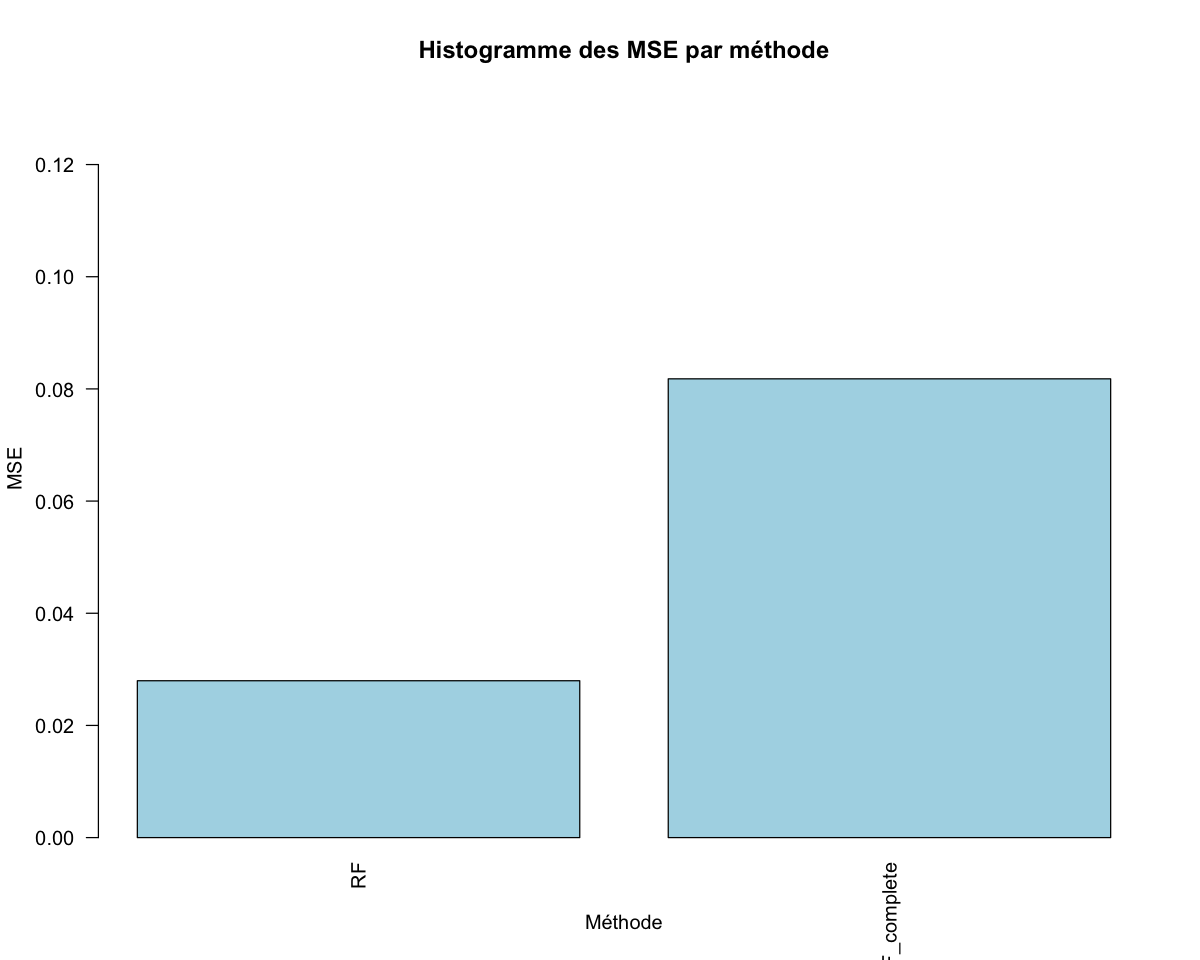

In [267]:
all_mse <- c(mse_rf, mse_rf_complete)

# Données des MSE
mse_values <- c(mse_rf, mse_rf_complete)

# Noms des méthodes
method_names <- c( "RF", "RF_complete")

# Création de l'histogramme
barplot(mse_values, 
        names.arg = method_names,
        main="Histogramme des MSE par méthode",
        xlab="Méthode",
        ylab="MSE",
        col="lightblue",
        border="black",
        ylim=c(0, max(mse_values)+0.05),
        las=2  # Tournez les étiquettes de l'axe x de 90 degrés
)

# Ajouter les valeurs sur les barres
#text(x = barplot(mse_values) + 0.25, y = mse_values, labels = mse_values, cex=0.7, col="black", pos=3)


### 14.2 SVM

On refait la SVM:

In [269]:
#svm.reg.tune = tune.svm(Value_co2_emissions_kt_by_country ~ ., data = datappr, cost = seq(30, 50, by = 0.5),
#gamma = seq(0.01, 0.05, by = 0.02))
#plot(svm.reg.tune)


In [270]:
svm.reg = svm(Value_co2_emissions_kt_by_country ~ ., data = datappr, cost = svm.reg.tune$best.parameters$cost,
	gamma = svm.reg.tune$best.parameters$gamma)



In [271]:
pred.svmr=predict(svm.reg,newdata=datestr)
# Erreur quadratique moyenne de prévision
mse_svm_complete = sum((pred.svmr-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr)
mse_svm_complete

[1] 0.118531

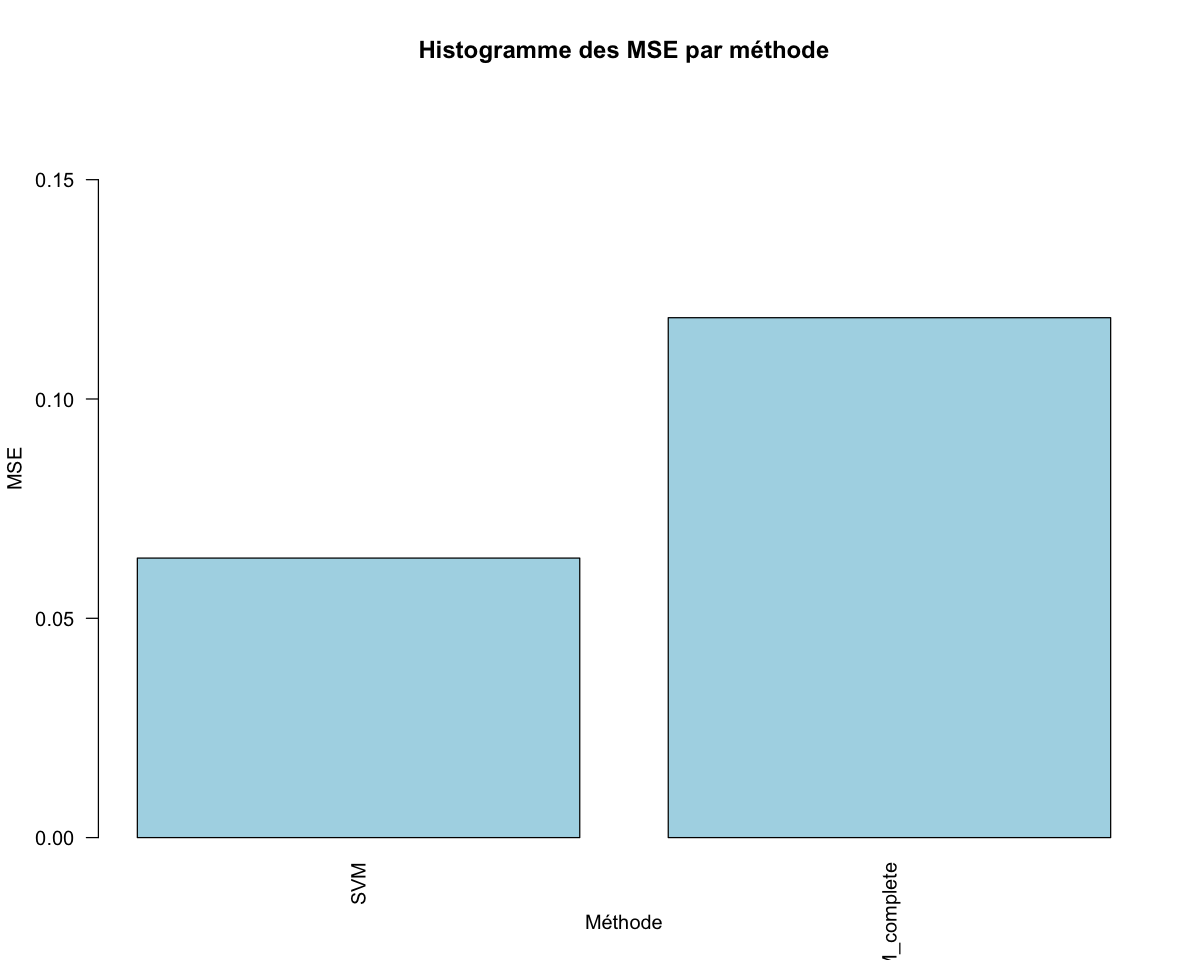

In [272]:
all_mse <- c(mse_svm, mse_svm_complete)

# Données des MSE
mse_values <- c(mse_svm, mse_svm_complete)

# Noms des méthodes
method_names <- c( "SVM", "SVM_complete")

# Création de l'histogramme
barplot(mse_values, 
        names.arg = method_names,
        main="Histogramme des MSE par méthode",
        xlab="Méthode",
        ylab="MSE",
        col="lightblue",
        border="black",
        ylim=c(0, max(mse_values)+0.05),
        las=2  # Tournez les étiquettes de l'axe x de 90 degrés
)

# Ajouter les valeurs sur les barres
#text(x = barplot(mse_values) + 0.25, y = mse_values, labels = mse_values, cex=0.7, col="black", pos=3)


### 14.3 Boosting

On refait le boosting:

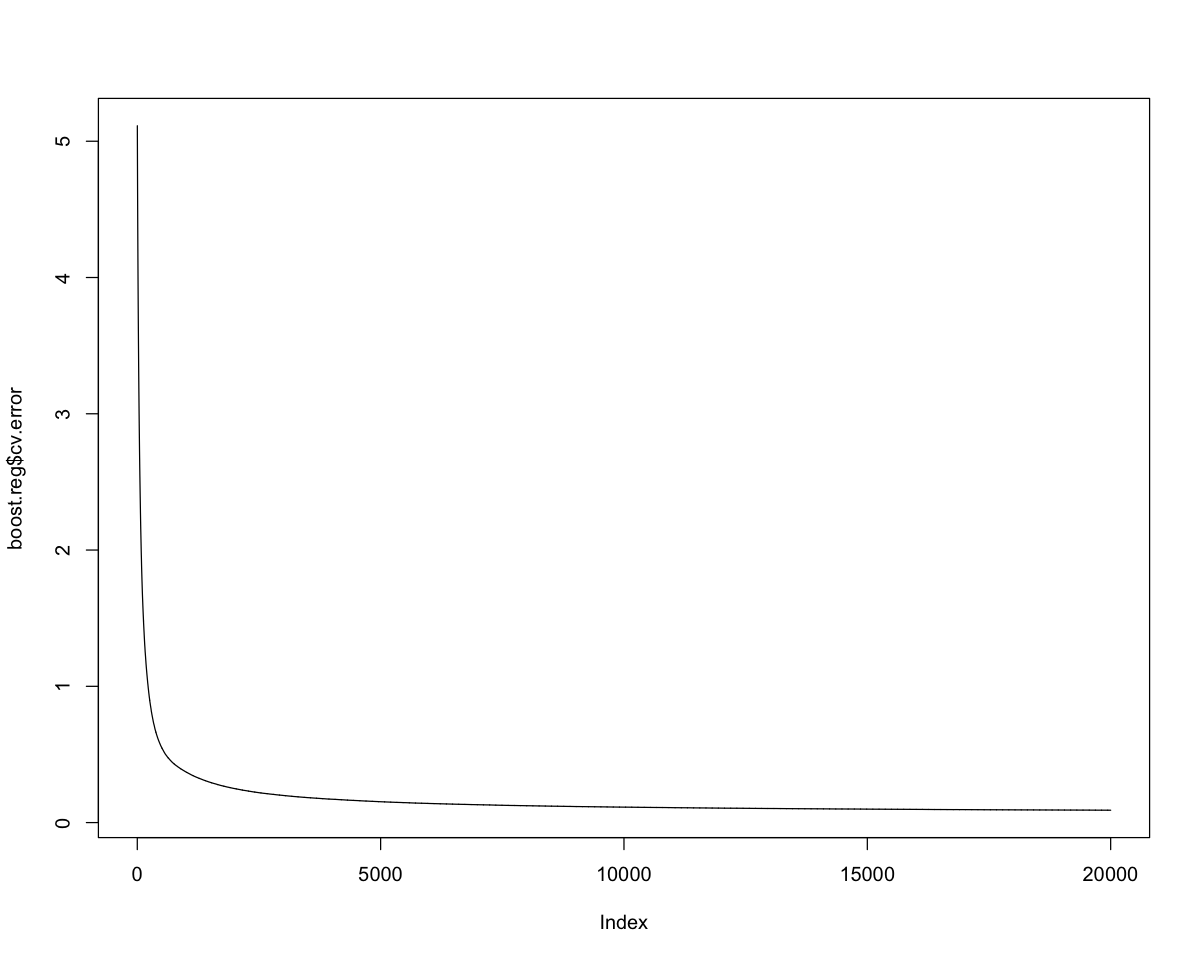

In [273]:
boost.reg = gbm(Value_co2_emissions_kt_by_country ~ ., data = datappr, distribution = "gaussian", n.trees = 20000, 
    cv.folds = 10, n.minobsinnode = 5, shrinkage = 0.03, verbose = FALSE)
# fixer verbose à FALSE pour éviter trop de sorties
plot(boost.reg$cv.error, type = "l")

In [274]:
 pred.boostr=predict(boost.reg,newdata=datestr,n.trees=best.iter)
# Erreur quadratique moyenne de prévision
mse_boost = sum((pred.boostr-datestr[,"Value_co2_emissions_kt_by_country"])^2)/nrow(datestr)
mse_boost

[1] 0.1075607

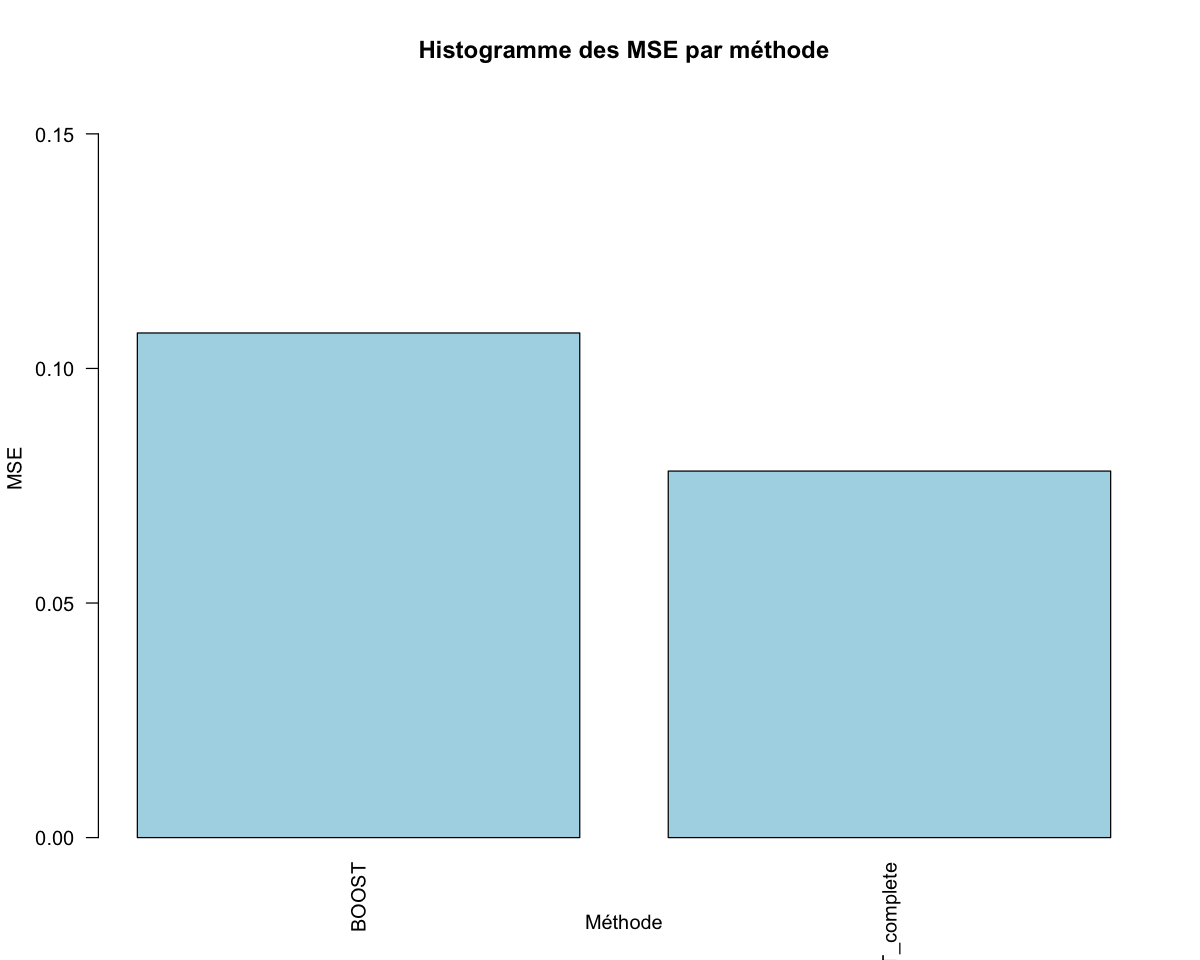

In [275]:
all_mse <- c(mse_rf, mse_rf_complete)

# Données des MSE
mse_values <- c(mse_boost, mse_boost_complete)

# Noms des méthodes
method_names <- c( "BOOST", "BOOST_complete")

# Création de l'histogramme
barplot(mse_values, 
        names.arg = method_names,
        main="Histogramme des MSE par méthode",
        xlab="Méthode",
        ylab="MSE",
        col="lightblue",
        border="black",
        ylim=c(0, max(mse_values)+0.05),
        las=2  # Tournez les étiquettes de l'axe x de 90 degrés
)

# Ajouter les valeurs sur les barres
#text(x = barplot(mse_values) + 0.25, y = mse_values, labels = mse_values, cex=0.7, col="black", pos=3)


On n'oberve pas de changement significatifs de MSE lorsque les données sont complétées. On peut en déduire que les données étaient déjà suffisantes pour bien modéliser Value Co2.